# 1) Lựa chọn dataset và chuẩn bị

link dataset: https://archive.ics.uci.edu/ml/datasets/heart+Disease

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, zscore, shapiro, kstest, anderson, chi2_contingency, fisher_exact, stats
from typing import List, Dict, Optional, Tuple, Any

## Tải và gộp dữ liệu

Chọn 4 tập data: (tổng dòng và cột của 4 tập này lần lượt là 920 và 14, đáp ứng với trong đề)
- processed.cleveland.data
- processed.hungarian.data
- processed.switzerland.data
- processed.va.data

In [138]:
# Đường dẫn đến các tệp dữ liệu
cleveland_path = '/content/processed.cleveland.data'
hungarian_path = '/content/processed.hungarian.data'
switzerland_path = '/content/processed.switzerland.data'
va_path = '/content/processed.va.data'

# Định nghĩa danh sách tên cột
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Đọc từng tệp với tên cột
cleveland = pd.read_csv(cleveland_path, header=None, names=column_names)
hungarian = pd.read_csv(hungarian_path, header=None, names=column_names)
switzerland = pd.read_csv(switzerland_path, header=None, names=column_names)
va = pd.read_csv(va_path, header=None, names=column_names)

# Gộp dữ liệu
full_data = pd.concat([cleveland, hungarian, switzerland, va], ignore_index=True)

# Kiểm tra số dòng và cột
print(full_data.shape)

# Lưu thành tệp CSV mới
full_data.to_csv('/content/full_data.csv', index=False, encoding='utf-8')

full_data

(920, 14)


age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0    63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
1    67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
2    67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
3    37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
4    41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   
..    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
915  54.0  0.0  4.0      127    333    1       1     154     0       0     ?   
916  62.0  1.0  1.0        ?    139    0       1       ?     ?       ?     ?   
917  55.0  1.0  4.0      122    223    1       1     100     0       0     ?   
918  58.0  1.0  4.0        ?    385    1       2       ?     ?       ?     ?   
919  62.0  1.0  2.0      120    254    0       2      93     1       0     ?   

      ca thal  num  
0    0.0  6.0    0  
1    3.0  3.0    2  
2    2.0  7.0    1  
3    0.0  3.0    0  
4    0.0  3.0    0  
..   ...  ...  ...  
915    ?    ?    1  
916    ?    ?    0  
917    ?    6    2  
918    ?    ?    0  
919    ?    ?    1  

[920 rows x 14 columns]

In [139]:
data: pd.DataFrame = pd.read_csv('/content/full_data.csv', encoding='utf-8')

# 2) Khám phá dữ liệu (Exploratory Data Analysis - EDA)

## a) Tóm tắt thông tin dữ liệu

### Mô tả các thuộc tính

- age: Tuổi của bệnh nhân (tính bằng năm).

- sex: Giới tính (1 = Nam / male; 0 = Nữ / female).

- cp: Loại đau ngực (Chest pain type)

    - 1: Đau thắt ngực điển hình (Typical angina)

    - 2: Đau thắt ngực không điển hình (Atypical angina)

    - 3: Đau không do thắt ngực (Non-anginal pain)

    - 4: Không có triệu chứng (Asymptomatic)

- trestbps: Huyết áp lúc nghỉ (Resting blood pressure) (đơn vị mmHg, đo khi nhập viện).

- chol: Cholesterol huyết thanh (Serum cholestoral) (đơn vị mg/dl).

- fbs: Đường huyết lúc đói > 120 mg/dl (Fasting blood sugar > 120 mg/dl) (1 = Đúng / true; 0 = Sai / false).

- restecg: Kết quả điện tâm đồ lúc nghỉ (Resting electrocardiographic results)

    - 0: Bình thường (Normal)

    - 1: Có bất thường sóng ST-T (ST-T wave abnormality) (đảo ngược sóng T và/hoặc ST chênh lên/xuống > 0.05 mV).

    - 2: Cho thấy phì đại thất trái có thể hoặc xác định (Probable or definite left ventricular hypertrophy) theo tiêu chuẩn Estes.

- thalach: Nhịp tim tối đa đạt được (Maximum heart rate achieved).

- exang: Đau thắt ngực do gắng sức (Exercise induced angina) (1 = Có / yes; 0 = Không / no).

- oldpeak: Độ chênh ST xuống do gắng sức so với lúc nghỉ (ST depression induced by exercise relative to rest).

- slope: Độ dốc của đoạn ST đỉnh lúc gắng sức (Slope of the peak exercise ST segment)

    - 1: Dốc lên (Upsloping)

    - 2: Đi ngang (Flat)

    - 3: Dốc xuống (Downsloping)

- ca: Số lượng mạch máu chính (0-3) bị nhuộm màu qua nội soi huỳnh quang (Number of major vessels colored by flourosopy).

- thal: Tình trạng Thalassemia (kết quả xạ hình tưới máu cơ tim)

    - 3: Bình thường (Normal)

    - 6: Khuyết tật cố định (Fixed defect)

    - 7: Khuyết tật có thể hồi phục (Reversible defect)

- num: Chẩn đoán bệnh tim (Tình trạng bệnh theo chụp động mạch vành - Angiographic disease status)

    - 0: Hẹp đường kính < 50% (Diameter narrowing < 50%)
    
    - 1: Hẹp đường kính > 50% (Diameter narrowing > 50%)

### Kiểm tra số lượng bản ghi, số lượng biến số, kiểu dữ liệu

In [140]:
# Kiểm tra lại kích thước dữ liệu
print(data.shape)

(920, 14)


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


In [142]:
data.head()

age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
1  67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
2  67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
3  37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
4  41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    2  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0    0

In [143]:
data.tail()

age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope ca  \
915  54.0  0.0  4.0      127  333   1       1     154     0       0     ?  ?   
916  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?  ?   
917  55.0  1.0  4.0      122  223   1       1     100     0       0     ?  ?   
918  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?  ?   
919  62.0  1.0  2.0      120  254   0       2      93     1       0     ?  ?   

    thal  num  
915    ?    1  
916    ?    0  
917    6    2  
918    ?    0  
919    ?    1

In [144]:
data.shape

(920, 14)

### Kiểm tra và xử lý dữ liệu thiếu

In [145]:
# Thay thế dấu "?" bằng NaN
data.replace("?", np.nan, inplace=True)

In [146]:
data.tail()

age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope  \
915  54.0  0.0  4.0      127  333   1       1     154     0       0   NaN   
916  62.0  1.0  1.0      NaN  139   0       1     NaN   NaN     NaN   NaN   
917  55.0  1.0  4.0      122  223   1       1     100     0       0   NaN   
918  58.0  1.0  4.0      NaN  385   1       2     NaN   NaN     NaN   NaN   
919  62.0  1.0  2.0      120  254   0       2      93     1       0   NaN   

      ca thal  num  
915  NaN  NaN    1  
916  NaN  NaN    0  
917  NaN    6    2  
918  NaN  NaN    0  
919  NaN  NaN    1

In [147]:
print(data["oldpeak"].dtype)


object


In [148]:
print("\n Các giá trị duy nhất trong oldpeak:")
print(data["oldpeak"].unique())


 Các giá trị duy nhất trong oldpeak:
['2.3' '1.5' '2.6' '3.5' '1.4' '0.8' '3.6' '0.6' '3.1' '0.4' '1.3' '0.0'
 '0.5' '1.6' '1.0' '1.2' '0.2' '1.8' '3.2' '2.4' '2.0' '2.5' '2.2' '2.8'
 '3.0' '3.4' '6.2' '4.0' '5.6' '2.9' '0.1' '2.1' '1.9' '4.2' '0.9' '1.1'
 '3.8' '0.7' '0.3' '4.4' '5.0' '.7' '.2' nan '1' '0' '-1.1' '-1.5' '2'
 '.5' '-.1' '-2.6' '-.7' '3' '.1' '.3' '-2' '-1' '.9' '.4' '1.7' '-.8'
 '-.5' '-.9' '3.7' '-0.5' '4']


In [149]:
# Định nghĩa các cột theo kiểu dữ liệu
numeric_features: List[str] = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features: List[str] = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "num", "ca"]

data["oldpeak"] = pd.to_numeric(data["oldpeak"], errors="coerce")
data["oldpeak"] = data["oldpeak"].apply(lambda x: round(x) if not pd.isna(x) else np.nan).astype("Int64")

for col in numeric_features:  # col: str
    # if col == "oldpeak":
    #     data[col] = pd.to_numeric(data[col], errors="coerce")
    # else:
        data[col] = pd.to_numeric(data[col], errors="coerce").astype("Int64") # Chuyển số và dùng Int64

# Chuyển các cột phân loại
for col in categorical_features:  # col: str
    data[col] = pd.to_numeric(data[col], errors="coerce").astype("category")

print(data.dtypes)

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak        Int64
slope       category
ca          category
thal        category
num         category
dtype: object


In [150]:
print("\n Các giá trị duy nhất trong oldpeak:")
print(data["oldpeak"].unique())


 Các giá trị duy nhất trong oldpeak:
<IntegerArray>
[2, 3, 4, 1, 0, 6, 5, <NA>, -1, -2, -3]
Length: 11, dtype: Int64


In [151]:
data["chol"] = pd.to_numeric(data["chol"], errors="coerce")  # Xử lý lỗi thành NaN
data["chol"] = data["chol"].apply(lambda x: round(x) if not pd.isna(x) else np.nan).astype("Int64")

# Kiểm tra lại kết quả
print(data[['chol']].head())


   chol
0   233
1   286
2   229
3   250
4   204


In [152]:
print(data.dtypes)

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak        Int64
slope       category
ca          category
thal        category
num         category
dtype: object


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    Int64   
 1   sex       920 non-null    category
 2   cp        920 non-null    category
 3   trestbps  861 non-null    Int64   
 4   chol      890 non-null    Int64   
 5   fbs       830 non-null    category
 6   restecg   918 non-null    category
 7   thalach   865 non-null    Int64   
 8   exang     865 non-null    category
 9   oldpeak   858 non-null    Int64   
 10  slope     611 non-null    category
 11  ca        309 non-null    category
 12  thal      434 non-null    category
 13  num       920 non-null    category
dtypes: Int64(5), category(9)
memory usage: 50.0 KB


In [154]:
# Kiểm tra dữ liệu thiếu
missing_data: pd.Series = data.isnull().sum()
print("Dữ liệu thiếu:\n", missing_data)

Dữ liệu thiếu:
 age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [155]:
# checking the percentage of missing values
missing_percentage: pd.Series = (data.isnull().sum() / len(data) * 100).round(2).sort_values(ascending=False)
print("Phần trăm dữ liệu thiếu:\n", missing_percentage)


Phần trăm dữ liệu thiếu:
 ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalach      5.98
exang        5.98
chol         3.26
restecg      0.22
cp           0.00
sex          0.00
age          0.00
num          0.00
dtype: float64


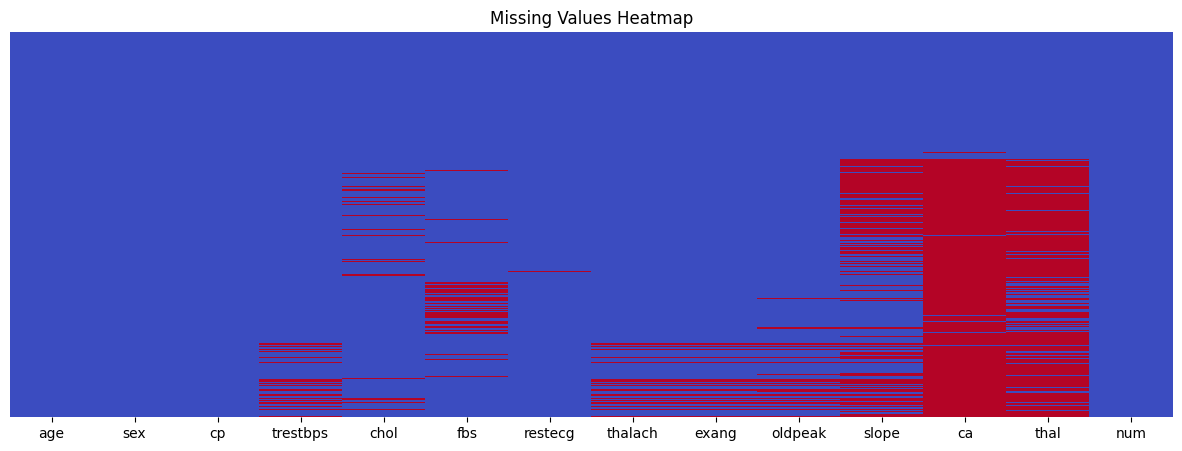

In [156]:
# heatmap of the missing values
plt.figure(figsize=(15 , 5))
sns.heatmap(data.isna(), cbar=False , yticklabels=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

#### Giải thích

Độ lệch (Skewness) là gì?

- Skewness (độ lệch) là một chỉ số thống kê dùng để đo mức độ bất đối xứng của phân phối dữ liệu so với phân phối chuẩn (phân phối đối xứng).

  - Nếu Skewness = 0: Dữ liệu phân phối chuẩn (đối xứng).

  - Nếu Skewness > 0: Dữ liệu lệch phải (đuôi dài về bên phải, ví dụ: thu nhập).

  - Nếu Skewness < 0: Dữ liệu lệch trái (đuôi dài về bên trái).

Do đó, Skewness giúp ta hiểu rõ hơn về hình dạng phân phối của dữ liệu và quyết định xem có cần biến đổi dữ liệu hay không (ví dụ: log-transform để xử lý lệch phải).

Tại sao không bỏ đi những mẫu có dữ liệu thiếu mà lại dùng mean hoặc median để điền giá trị khuyết cho biến liên tục?


- Lý do không nên xóa mẫu có dữ liệu thiếu:

  - Mất dữ liệu: Xóa những mẫu có giá trị thiếu có thể làm giảm kích thước bộ dữ liệu, đặc biệt nếu có nhiều mẫu bị thiếu ⇒ gây mất mát thông tin, giảm độ chính xác của mô hình.

  - Thiên lệch mẫu: Nếu dữ liệu thiếu không ngẫu nhiên, việc xóa có thể gây thiên lệch mẫu (sampling bias), làm sai lệch kết luận.

- Lý do dùng Mean/Median để điền (impute):

  - Biến liên tục (continuous) như chiều cao, cân nặng, điểm số thường có giá trị phân bố quanh trung bình (mean) hoặc trung vị (median).

  - Mean phù hợp khi dữ liệu phân phối chuẩn (đối xứng).

  - Median phù hợp khi dữ liệu bị lệch (skewed) vì nó không bị ảnh hưởng bởi các giá trị ngoại lai (outliers).

Đây là cách đơn giản, nhanh và hiệu quả để giữ lại toàn bộ dữ liệu mà vẫn có thể xử lý được các giá trị thiếu.

Tại sao lại dùng Mode để điền giá trị khuyết cho biến phân loại (categorical)?

- Biến phân loại (categorical) là những biến như giới tính (nam/nữ), tình trạng hôn nhân (độc thân/kết hôn), màu sắc,...

- Mode là giá trị xuất hiện nhiều nhất trong cột đó.

- Vì không thể tính trung bình hay trung vị cho dữ liệu dạng chữ (categorical), nên dùng mode là cách hợp lý để:

- Giữ lại toàn bộ dữ liệu.

- Điền bằng giá trị phổ biến nhất → hạn chế tạo ra sự sai lệch lớn.

Đây là một phương pháp đơn giản giúp tránh mất dữ liệu mà vẫn phản ánh được phân phối thực tế của biến phân loại.

#### Xử lý biến số liên tục (Numerical)

In [157]:
print("\nĐiền giá trị thiếu cho các biến số:")

# Lấy danh sách tên các cột có kiểu dữ liệu là số nguyên (Int64) hoặc số thực (float64)
num_cols: pd.Index = data.select_dtypes(include=['Int64', 'float64']).columns
print(f"Các cột số sẽ được kiểm tra NaN: {num_cols.tolist()}")

# Duyệt qua từng cột số để kiểm tra và điền giá trị thiếu
for col in num_cols: # col: str - Tên của cột đang xử lý
    # Kiểm tra xem cột hiện tại có giá trị thiếu (NaN) hay không
    num_missing: int = data[col].isnull().sum()
    if num_missing > 0:
        print(f"- Cột '{col}' có {num_missing} giá trị thiếu.")
        # Tính độ lệch (skewness) của cột (loại bỏ NaN trước khi tính)
        # Độ lệch giúp quyết định nên dùng Trung bình (Mean) hay Trung vị (Median) để điền khuyết
        skewness_val: float = data[col].dropna().skew()

        # Khai báo biến để lưu giá trị điền khuyết và phương pháp sử dụng
        fill_value: int # Giá trị điền khuyết sẽ là số nguyên sau khi làm tròn
        fill_method: str # Tên phương pháp ('Mean' hoặc 'Median')

        # Chọn phương pháp dựa trên độ lệch tuyệt đối
        if abs(skewness_val) < 0.5:
            # Nếu phân phối gần đối xứng (|skew| < 0.5), sử dụng Mean
            fill_value = int(round(data[col].mean())) # Tính mean, làm tròn thành số nguyên
            fill_method = "Mean"
        else:
            # Nếu phân phối bị lệch (|skew| >= 0.5), sử dụng Median (ít bị ảnh hưởng bởi outliers)
            fill_value = int(round(data[col].median())) # Tính median, làm tròn thành số nguyên
            fill_method = "Median"

        # Thực hiện điền giá trị thiếu vào cột hiện tại trong DataFrame 'data'
        data[col].fillna(fill_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame

        # In ra thông báo về việc đã điền khuyết
        print(f"  -> Đã thay NaN trong '{col}' (Skew={skewness_val:.2f}) bằng {fill_method} (Giá trị làm tròn: {fill_value})")
    # else: # Bỏ comment nếu muốn thông báo cho cả cột không có NaN
    #     print(f"- Cột '{col}': Không có giá trị thiếu.")


Điền giá trị thiếu cho các biến số:
Các cột số sẽ được kiểm tra NaN: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
- Cột 'trestbps' có 59 giá trị thiếu.
  -> Đã thay NaN trong 'trestbps' (Skew=0.21) bằng Mean (Giá trị làm tròn: 132)
- Cột 'chol' có 30 giá trị thiếu.
  -> Đã thay NaN trong 'chol' (Skew=-0.61) bằng Median (Giá trị làm tròn: 223)
- Cột 'thalach' có 55 giá trị thiếu.
  -> Đã thay NaN trong 'thalach' (Skew=-0.21) bằng Mean (Giá trị làm tròn: 138)
- Cột 'oldpeak' có 62 giá trị thiếu.
  -> Đã thay NaN trong 'oldpeak' (Skew=0.96) bằng Median (Giá trị làm tròn: 0)


<ipython-input-157-ce9bc6fb5d24>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(fill_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame
<ipython-input-157-ce9bc6fb5d24>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

#### Xử lý biến phân loại (Categorical)

In [158]:
print("\nĐiền giá trị thiếu cho các biến phân loại:")

# Lấy danh sách tên các cột có kiểu dữ liệu là 'category'
# Chuyển Index thành List để type hint là List[str]
cat_cols: List[str] = data.select_dtypes(include=['category']).columns.tolist()
print(f"Các cột phân loại sẽ được kiểm tra NaN: {cat_cols}")

# Duyệt qua từng cột phân loại để kiểm tra và điền giá trị thiếu
for col in cat_cols: # col: str - Tên của cột phân loại đang xử lý
    # Kiểm tra xem cột hiện tại có giá trị thiếu (NaN) hay không
    num_missing_cat: int = data[col].isnull().sum()
    if num_missing_cat > 0:
        print(f"- Cột '{col}' có {num_missing_cat} giá trị thiếu.")
        # Tìm giá trị xuất hiện nhiều nhất (Mode) trong cột này
        # .mode() trả về một Series, lấy phần tử đầu tiên [0] trong trường hợp chỉ có một mode
        # hoặc trường hợp có nhiều mode bằng tần suất (lấy mode đầu tiên)
        mode_value: Any = data[col].mode()[0] # Kiểu dữ liệu của mode có thể khác nhau tùy cột

        # Thực hiện điền giá trị thiếu bằng giá trị Mode đã tìm được
        data[col].fillna(mode_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame

        # In ra thông báo về việc đã điền khuyết
        print(f"  -> Đã thay NaN trong '{col}' bằng Mode ({mode_value})")




Điền giá trị thiếu cho các biến phân loại:
Các cột phân loại sẽ được kiểm tra NaN: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
- Cột 'fbs' có 90 giá trị thiếu.
  -> Đã thay NaN trong 'fbs' bằng Mode (0.0)
- Cột 'restecg' có 2 giá trị thiếu.
  -> Đã thay NaN trong 'restecg' bằng Mode (0.0)
- Cột 'exang' có 55 giá trị thiếu.
  -> Đã thay NaN trong 'exang' bằng Mode (0.0)
- Cột 'slope' có 309 giá trị thiếu.
  -> Đã thay NaN trong 'slope' bằng Mode (2.0)
- Cột 'ca' có 611 giá trị thiếu.
  -> Đã thay NaN trong 'ca' bằng Mode (0.0)
- Cột 'thal' có 486 giá trị thiếu.
  -> Đã thay NaN trong 'thal' bằng Mode (3.0)


<ipython-input-158-589bcf4729e1>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True) # inplace=True: thay đổi trực tiếp DataFrame


In [159]:
print(data.isnull().sum().sum())  # Xem còn tổng số NaN không


0


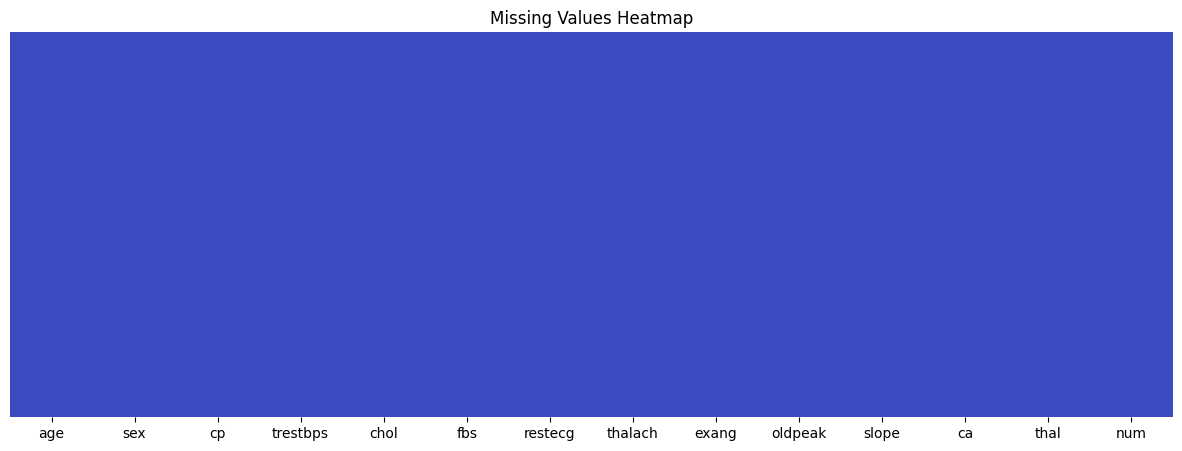

In [160]:
# heatmap of the missing values
plt.figure(figsize=(15 , 5))
sns.heatmap(data.isna(), cbar=False , yticklabels=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

In [161]:
print(f"Số lượng bản ghi: {data.shape[0]}")  # Ví dụ: 920
print(f"Số lượng biến số: {data.shape[1]}")  # Ví dụ: 14

# Kiểu dữ liệu của từng biến
print(data.dtypes)


Số lượng bản ghi: 920
Số lượng biến số: 14
age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak        Int64
slope       category
ca          category
thal        category
num         category
dtype: object


### Kiểm tra và loại bỏ dữ liệu trùng lặp

In [162]:
# Kiểm tra dữ liệu trùng lặp
duplicates: int = data.duplicated().sum()
print(f"Số bản ghi trùng lặp: {duplicates}")

Số bản ghi trùng lặp: 2


In [163]:
# # Loại bỏ các bản ghi trùng lặp
# data = data.drop_duplicates()
# print(f"Số lượng bản ghi sau khi loại trùng lặp: {data.shape[0]}")

## b) Phân tích thống kê mô tả

In [ ]:
print(data.describe())

            age    trestbps        chol     thalach   oldpeak
count     920.0       920.0       920.0       920.0     920.0
mean   53.51087  132.123913  199.908696  137.572826  0.827174
std    9.424685   18.443924  109.040171   25.138725   1.11451
min        28.0         0.0         0.0        60.0      -3.0
25%        47.0       120.0      177.75       120.0       0.0
50%        54.0       130.0       223.0       138.0       0.0
75%        60.0       140.0       267.0       156.0       2.0
max        77.0       200.0       603.0       202.0       6.0


**1. Công thức tính Trung bình cộng (Mean):**

$\Large \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

  - Trong đó:
    
    - $\bar{x} $: là giá trị trung bình cộng của mẫu.

    - $x_i$: là giá trị của quan sát thứ i.

    - n: là tổng số quan sát trong mẫu.


**2. Công thức tính Độ lệch chuẩn mẫu (Sample Standard Deviation):**

$\Large s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$

  - Trong đó:

    - s: là độ lệch chuẩn của mẫu (đo lường mức độ phân tán của dữ liệu quanh trung bình).

    - $x_i$: là giá trị của quan sát thứ i.

    - $\bar{x} $: là giá trị trung bình cộng của mẫu.

    - n: là tổng số quan sát trong mẫu.

**3. Cách xác định Trung vị (Median):**

- Median là giá trị nằm ở vị trí chính giữa của tập dữ liệu sau khi đã được sắp xếp theo thứ tự từ nhỏ đến lớn.

  1. Sắp xếp dữ liệu: $ x_{(1)}, x_{(2)}, ..., x_{(i)} $

  2. Nếu n (số lượng quan sát) là **số lẻ**, Median là giá trị ở vị trí thứ $\frac{n+1}{2}$

  3. Nếu n là **số chẵn**, Median là trung bình cộng của hai giá trị ở vị trí thứ $\frac{n}{2} và \frac{n}{2} + 1$


### Trực quan hóa dữ liệu (Cần ít nhất 3 loại biểu đồ)

#### Biểu đồ Boxplot (Phát hiện ngoại lai)

Boxplot: Dùng để phát hiện giá trị ngoại lai và xem phân bố tổng quát của biến số.



--- Thống kê mô tả cho cột số: age ---
count       920.0
mean     53.51087
std      9.424685
min          28.0
25%          47.0
50%          54.0
75%          60.0
max          77.0
Name: age, dtype: Float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số: trestbps ---
count         920.0
mean     132.123913
std       18.443924
min             0.0
25%           120.0
50%           130.0
75%           140.0
max           200.0
Name: trestbps, dtype: Float64
Outliers (theo IQR):
Số lượng outliers: 28

--- Thống kê mô tả cho cột số: chol ---
count         920.0
mean     199.908696
std      109.040171
min             0.0
25%          177.75
50%           223.0
75%           267.0
max           603.0
Name: chol, dtype: Float64
Outliers (theo IQR):
Số lượng outliers: 185

--- Thống kê mô tả cho cột số: thalach ---
count         920.0
mean     137.572826
std       25.138725
min            60.0
25%           120.0
50%           138.0
75%           156.0
max          

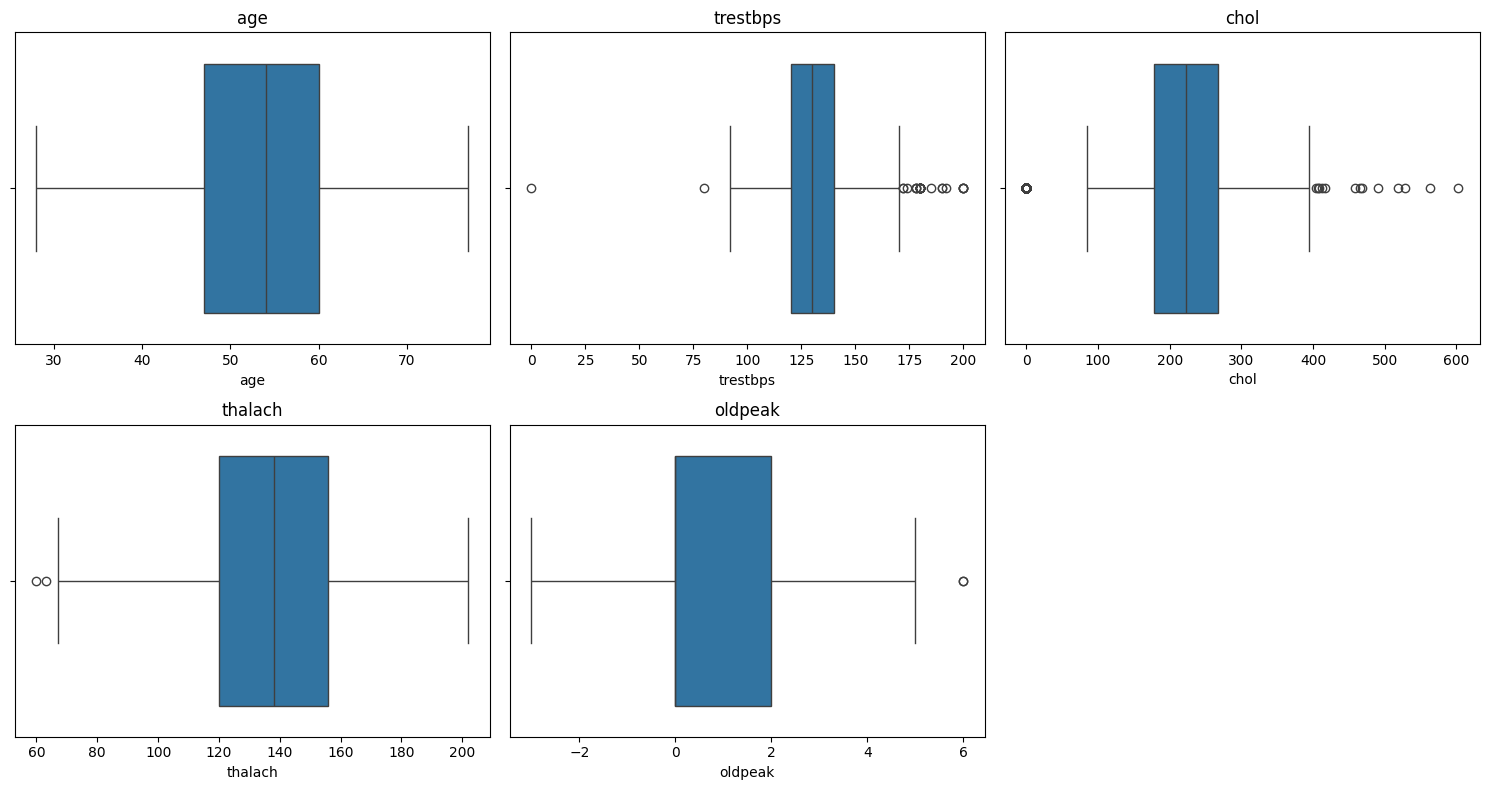

In [165]:
num_cols_plot: pd.Index = data.select_dtypes('number').columns
num_plots: int = len(num_cols_plot)

for col in num_cols_plot:
    desc = data[col].describe()
    print(f"\n--- Thống kê mô tả cho cột số: {col} ---")
    print(desc)
    print(f"Outliers (theo IQR):")
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"Số lượng outliers: {len(outliers)}")

rows = int(np.ceil(num_plots / 3))
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()



1. Vì sao chọn biểu đồ Boxplot?
Boxplot (biểu đồ hộp) được chọn vì nó là công cụ trực quan mạnh mẽ để:

- Hiển thị phân bố dữ liệu: Cho thấy median (trung vị), phần giữa (IQR), và phạm vi của dữ liệu.

- Nhận diện outliers (giá trị ngoại lai): Dễ dàng thấy các điểm nằm ngoài “râu” của boxplot.

- So sánh nhiều biến liên tục cùng lúc: Giúp nhanh chóng nhìn ra biến nào phân bố lệch, biến nào có outliers nhiều, v.v.

Đây là lý do boxplot rất phổ biến trong phân tích dữ liệu khám phá (EDA - Exploratory Data Analysis).

2. Nhận xét và nhận diện xu hướng dữ liệu từ biểu đồ

- age:

  - Phân bố khá chuẩn và đối xứng, không có outlier rõ rệt.

  - Trung vị nằm gần giữa box ⇒ dữ liệu khá cân đối.

- trestbps (huyết áp lúc nghỉ):
Có nhiều outliers ở phía cao (đuôi phải dài).

  - Trung vị lệch nhẹ về trái ⇒ có xu hướng lệch phải (skewed right).

- chol (cholesterol):

  - Có nhiều outliers ở cả phía thấp và phía cao, đặc biệt là phía cao.

  - Trung vị nằm giữa ⇒ dữ liệu hơi lệch phải nhưng chưa quá nghiêm trọng.

- thalach (nhịp tim tối đa):

  - Có outlier phía thấp, nhưng nhìn chung phân bố khá chuẩn.

  - Trung vị hơi lệch nhẹ về phải.

- oldpeak (độ chênh ST):

  - Có ít outlier ở phía cao.

  - Trung vị hơi lệch trái ⇒ có thể hơi lệch trái (skewed left).

#### Biểu đồ Pairplot (Phân tích quan hệ giữa các biến số)

Pairplot: Kết hợp scatterplot để xem mối quan hệ giữa các biến và histogram để xem phân bố từng biến.


--- Ma trận tương quan giữa các cột số ---
           age  trestbps  chol  thalach  oldpeak
age       1.00      0.23 -0.09    -0.35     0.20
trestbps  0.23      1.00  0.09    -0.10     0.15
chol     -0.09      0.09  1.00     0.23     0.05
thalach  -0.35     -0.10  0.23     1.00    -0.14
oldpeak   0.20      0.15  0.05    -0.14     1.00


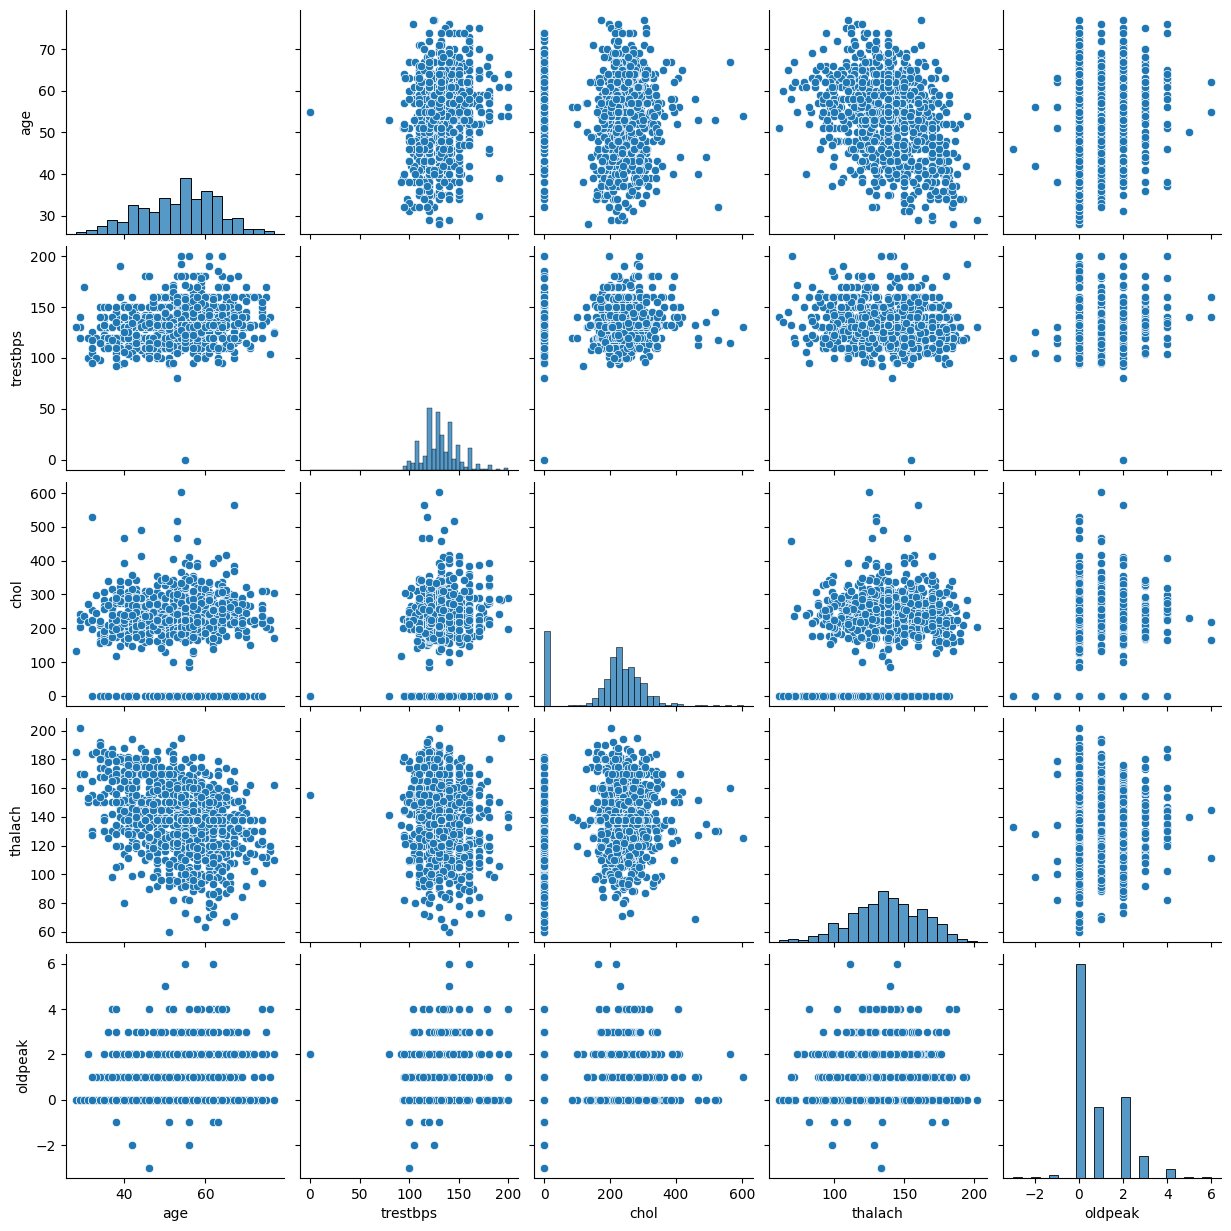

In [166]:
num_cols = data.select_dtypes('number').columns

print("\n--- Ma trận tương quan giữa các cột số ---")
corr = data[num_cols].corr()
print(corr.round(2))

sns.pairplot(data)
plt.show()


--- Giá trị trung bình của các cột số theo nhóm trong 'num' ---
       age  trestbps    chol  thalach  oldpeak
num                                           
0    50.55    130.01  227.68   148.27      0.4
1    53.53    132.82  195.99   131.38     0.96
2    57.58     133.5  145.31   129.27     1.26
3    59.21    135.57  160.31   122.63     1.35
4    59.21     138.0  193.25   128.57     2.14


<ipython-input-167-3e2149aa40f5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('num')[num_cols].mean().round(2))


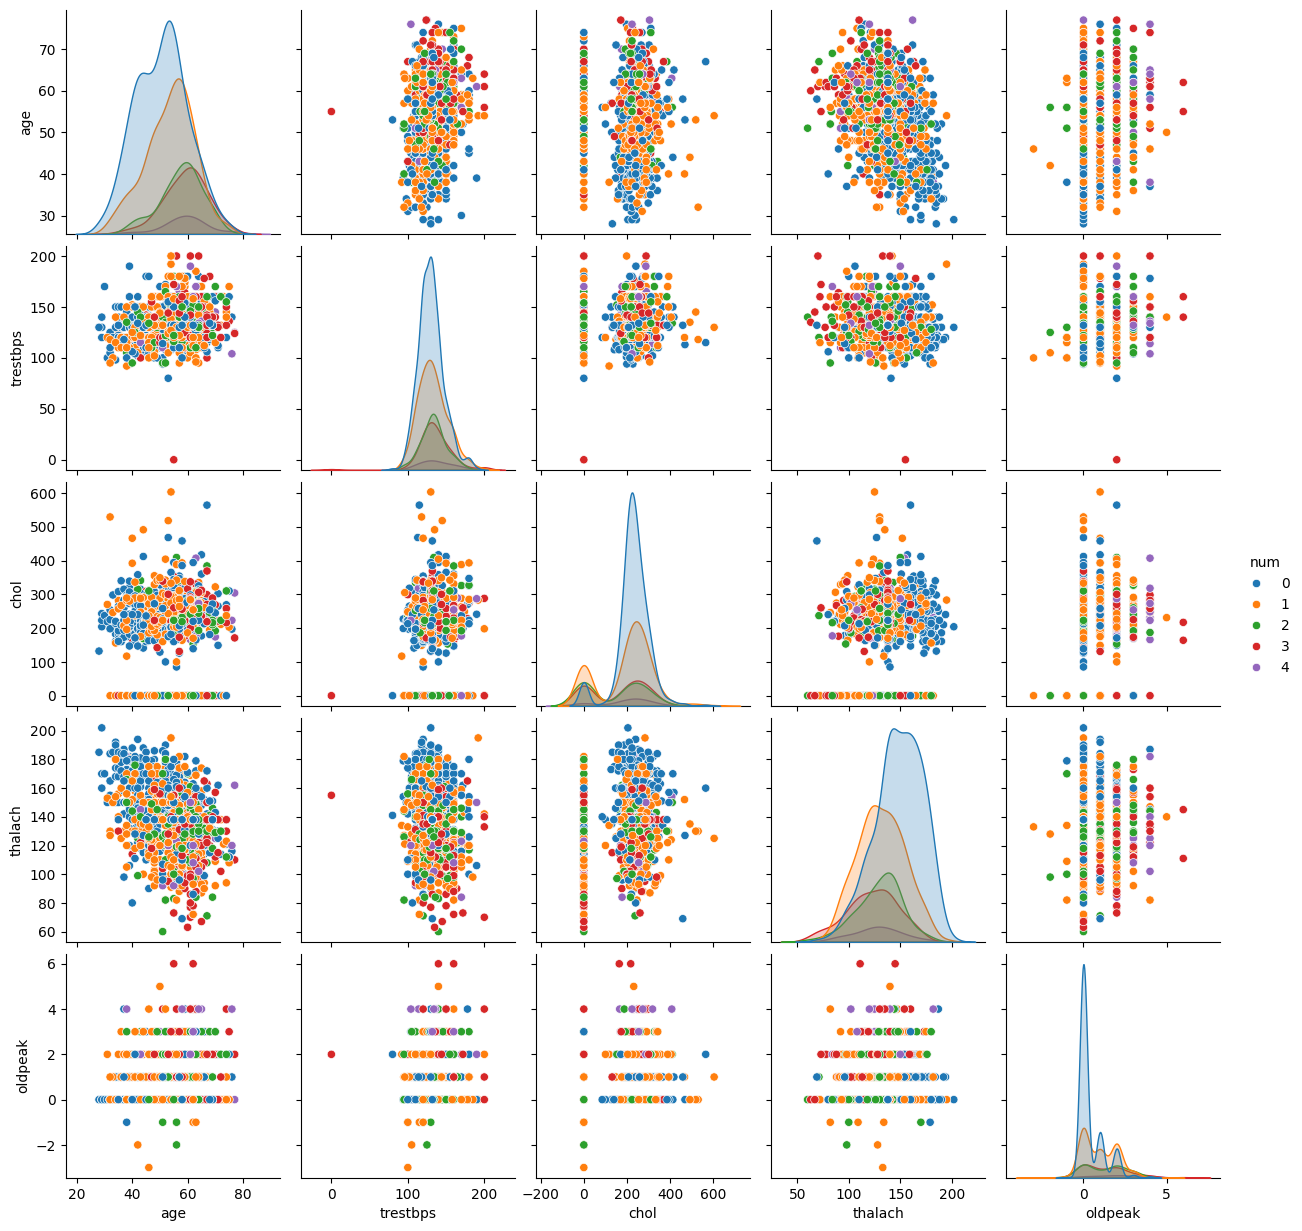

In [167]:
num_cols = data.select_dtypes('number').columns
if 'num' in data.columns:
    print("\n--- Giá trị trung bình của các cột số theo nhóm trong 'num' ---")
    print(data.groupby('num')[num_cols].mean().round(2))
else:
    print("Cột 'num' không tồn tại trong dữ liệu.")

sns.pairplot(data, hue='num')
plt.show()

Nhận xét Pairplot:

**1. Biến Mục tiêu num:**

- Biểu đồ pairplot này sử dụng 5 giá trị gốc của biến num (0, 1, 2, 3, 4) để tô màu các điểm dữ liệu (hue). Điều này tạo ra nhiều màu sắc, làm cho việc nhận diện các xu hướng hoặc sự khác biệt giữa các nhóm trở nên phức tạp và khó tập trung vào câu hỏi chính: có bệnh hay không có bệnh đáng kể.

**2. Xử lý Outliers và Phạm vi Dữ liệu:**

- Các biểu đồ phân bố (trên đường chéo) và scatter plot (ngoài đường chéo) cho thấy sự hiện diện của các giá trị ngoại lai rõ rệt, đặc biệt ở các biến trestbps, chol, và oldpeak. Phạm vi trục của chol thậm chí có thể lên đến gần 600. Những outlier này kéo dãn các trục và có thể che khuất các mẫu hình thực sự trong phần lớn dữ liệu.

**3. Hình dạng Phân bố:**

- Phân bố của chol và oldpeak rất lệch và có đuôi dài do outliers.

**4. Kết luận từ Pairplot**

- Phức tạp do nhiều nhóm num: Việc có 5 màu sắc khác nhau (hue theo num 0-4) làm cho việc phân biệt các mẫu hình hoặc sự khác biệt giữa các nhóm trở nên khó khăn và rối mắt. Đặc biệt, việc nhận diện xu hướng riêng biệt cho từng nhóm num từ 1 đến 4 là rất phức tạp trên hầu hết các biểu đồ.

- Ảnh hưởng của Outliers: Sự hiện diện rõ ràng của các giá trị ngoại lai, đặc biệt trong chol, trestbps và oldpeak, làm giãn các trục tọa độ và khiến các đám mây điểm trong scatter plot bị phân tán rộng. Điều này che khuất các mối quan hệ tiềm ẩn trong phần lớn dữ liệu và làm mờ đi sự khác biệt có thể có giữa các nhóm num.

- Khó nhận diện sự khác biệt: Mặc dù có thể lờ mờ thấy một số xu hướng (ví dụ: thalach có vẻ thấp hơn ở các nhóm có giá trị num cao hơn; oldpeak có vẻ phân tán hơn ở nhóm num cao hơn), nhưng sự khác biệt này không rõ ràng và dứt khoát như trong biểu đồ **sau khi đã xử lý**. Sự chồng chéo giữa các nhóm màu là rất lớn, và ảnh hưởng của outliers càng làm khó phân biệt. Các biến như trestbps và chol gần như không thể hiện sự khác biệt đáng kể nào giữa các nhóm num trên biểu đồ này.

- Tính hữu dụng hạn chế: Do sự phức tạp về màu sắc và ảnh hưởng của dữ liệu chưa được xử lý, pairplot "trước" chủ yếu chỉ cho thấy sự tồn tại của dữ liệu và các giá trị ngoại lai. Nó ít hữu ích trong việc đưa ra các kết luận chắc chắn về mối quan hệ giữa các biến hoặc sự khác biệt đáng kể giữa các nhóm bệnh nhân khác nhau.

- Sự cần thiết của Tiền xử lý: Biểu đồ này nhấn mạnh tầm quan trọng của việc làm sạch dữ liệu (xử lý outliers, giá trị thiếu, giá trị không hợp lệ) và chuẩn hóa biến mục tiêu (nếu cần thiết cho mục đích phân tích) trước khi thực hiện các khám phá sâu hơn. Việc này là cần thiết để có được những hiểu biết trực quan đáng tin cậy và chính xác hơn từ dữ liệu.



#### Histogram cho biến Numerical


--- Phân phối giá trị cho cột age ---
age
(27.951, 32.9]     12
(32.9, 37.8]       37
(37.8, 42.7]       86
(42.7, 47.6]      104
(47.6, 52.5]      149
(52.5, 57.4]      201
(57.4, 62.3]      176
(62.3, 67.2]      101
(67.2, 72.1]       39
(72.1, 77.0]       15
Name: count, dtype: int64

--- Phân phối giá trị cho cột trestbps ---
trestbps
(-0.2, 20.0]        1
(20.0, 40.0]        0
(40.0, 60.0]        0
(60.0, 80.0]        1
(80.0, 100.0]      26
(100.0, 120.0]    265
(120.0, 140.0]    418
(140.0, 160.0]    166
(160.0, 180.0]     35
(180.0, 200.0]      8
Name: count, dtype: int64

--- Phân phối giá trị cho cột chol ---
chol
(-0.603, 60.3]    172
(60.3, 120.6]       4
(120.6, 180.9]     60
(180.9, 241.2]    336
(241.2, 301.5]    245
(301.5, 361.8]     81
(361.8, 422.1]     14
(422.1, 482.4]      3
(482.4, 542.7]      3
(542.7, 603.0]      2
Name: count, dtype: int64

--- Phân phối giá trị cho cột thalach ---
thalach
(59.858, 74.2]      9
(74.2, 88.4]       18
(88.4, 102.6]      62
(102

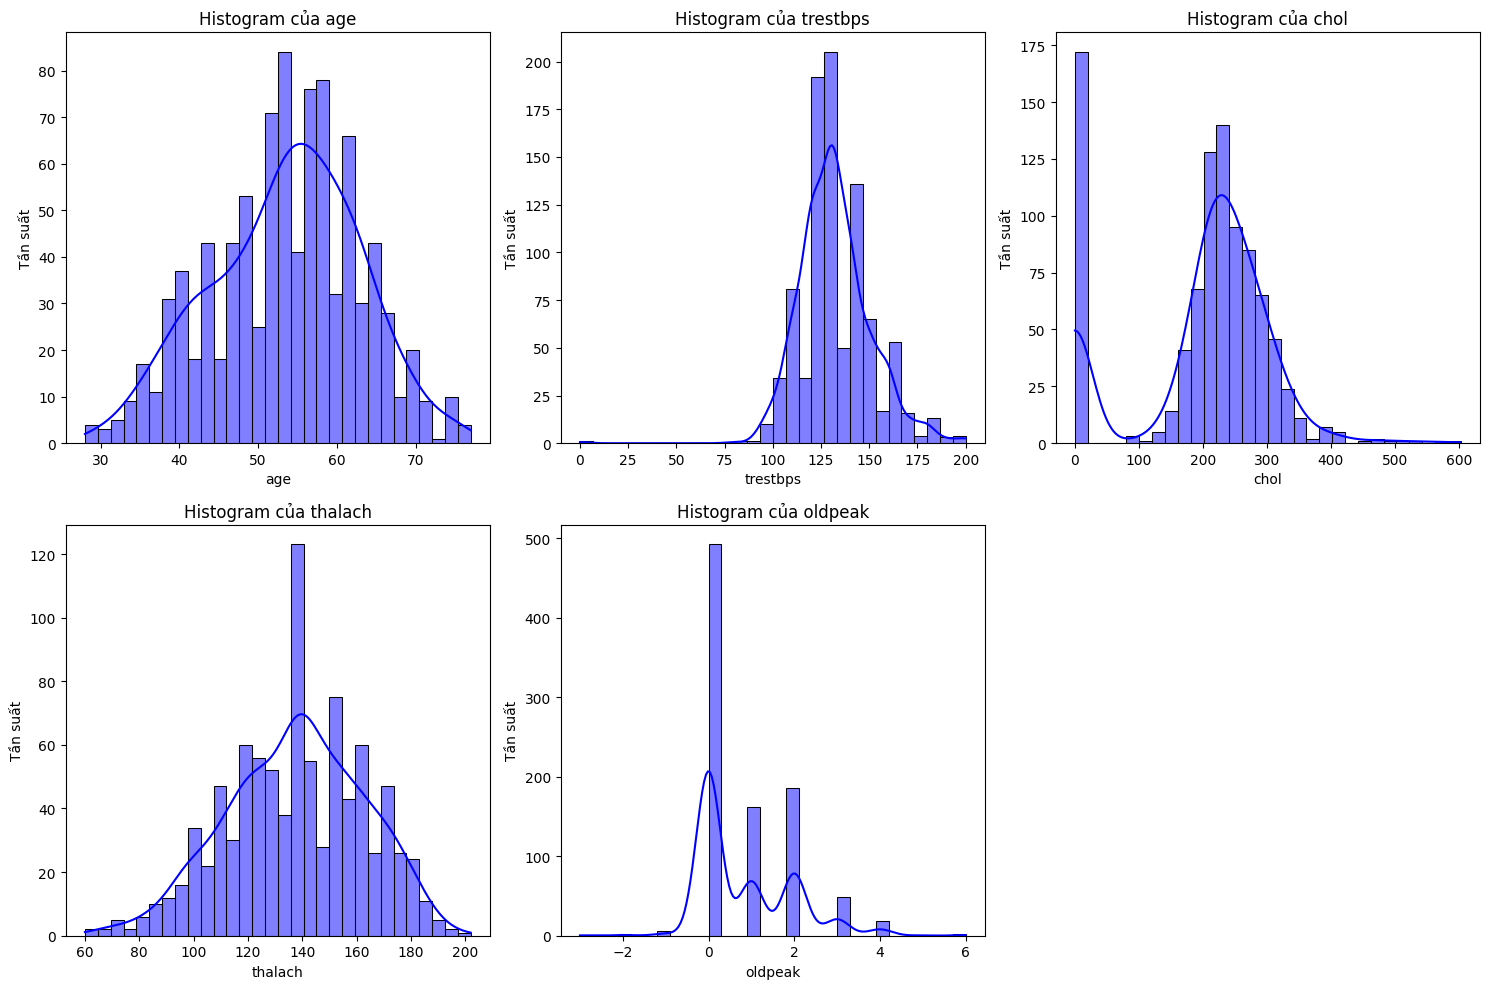

In [168]:
# Chọn các cột số
num_cols: pd.Index = data.select_dtypes(include=['number']).columns

for col in num_cols:
    print(f"\n--- Phân phối giá trị cho cột {col} ---")
    value_counts = pd.cut(data[col], bins=10).value_counts().sort_index()
    print(value_counts)

# Thiết lập kích thước
plt.figure(figsize=(15, 10))

# Duyệt qua từng cột số để vẽ histogram
for i, col in enumerate(num_cols, 1): # i: int, col: str
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # Sắp xếp 3 cột trên mỗi hàng
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # Vẽ histogram có KDE
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()

1. Tại sao dùng biểu đồ Histogram?
Histogram (biểu đồ tần suất) được dùng để:

  - Thể hiện phân bố xác suất (distribution) của biến số liên tục.

  - Dễ dàng nhận biết hình dạng phân phối: chuẩn, lệch trái, lệch phải, phân bố nhiều đỉnh...

  - Kết hợp đường KDE (đường xanh) giúp trực quan hóa xu hướng tổng thể của dữ liệu.

Rất hữu ích để đánh giá xem có cần biến đổi dữ liệu (log, sqrt,...) hay không.

2. Nhận xét và xu hướng dữ liệu từ biểu đồ Histogram

  - age

Dữ liệu tuổi có phân bố khá đều và đối xứng, tập trung nhiều nhất trong khoảng từ 50 đến 60 tuổi. Đường KDE cho thấy có dạng gần giống phân phối chuẩn, không có độ lệch rõ rệt. Đây là biến có phân bố ổn định, không cần xử lý gì đặc biệt.

  - trestbps

Biểu đồ có hình dạng lệch phải nhẹ, với phần lớn giá trị nằm trong khoảng 110 đến 140 mmHg. Tuy nhiên, có một số giá trị cao kéo dài ra phía bên phải làm đuôi bị kéo lệch. Dữ liệu không chuẩn hoàn toàn nhưng cũng không quá méo. Cần để ý đến vài giá trị cao bất thường.

  - chol

Đây là biến có độ lệch phải rất rõ. Dữ liệu dồn nhiều về phía dưới (khoảng 200 mg/dL trở xuống), và đuôi bên phải kéo dài cho thấy có những người có chỉ số cholesterol cực cao - có thể là outliers hoặc giá trị thực nhưng hiếm. Với những dữ liệu như thế này, thường cần chuẩn hóa hoặc biến đổi log để giảm ảnh hưởng của các giá trị lớn.

  - thalach

Phân bố khá cân đối, hơi giống phân phối chuẩn, tuy nhiên có một cột rất cao ở giữa (khoảng 140 bpm), thể hiện có rất nhiều người có nhịp tim tối đa ở mức này. Nhìn chung dữ liệu không bị lệch mạnh và có thể giữ nguyên khi đưa vào mô hình.

  - oldpeak

Biến này có phân bố rất đặc biệt: có cực kỳ nhiều giá trị bằng 0, cho thấy phần lớn người tham gia không có dấu hiệu chênh ST. Các giá trị còn lại phân bố rải rác, tạo ra đuôi dài về bên phải → đây là phân bố rất lệch phải và không chuẩn, đồng thời có nhiều đỉnh nhỏ (multimodal). Biến này nên được biến đổi để giảm lệch hoặc chuẩn hóa nếu dùng trong mô hình tuyến tính.

#### Biểu đồ Cột cho biến Categorical


--- Tần suất các giá trị trong cột 'sex' ---
sex
1.0    726
0.0    194
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'cp' ---
cp
4.0    496
3.0    204
2.0    174
1.0     46
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'fbs' ---
fbs
0.0    782
1.0    138
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'restecg' ---
restecg
0.0    553
2.0    188
1.0    179
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'exang' ---
exang
0.0    583
1.0    337
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'slope' ---
slope
2.0    654
1.0    203
3.0     63
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'ca' ---
ca
0.0    792
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'thal' ---
thal
3.0    682
7.0    192
6.0     46
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'num' ---
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


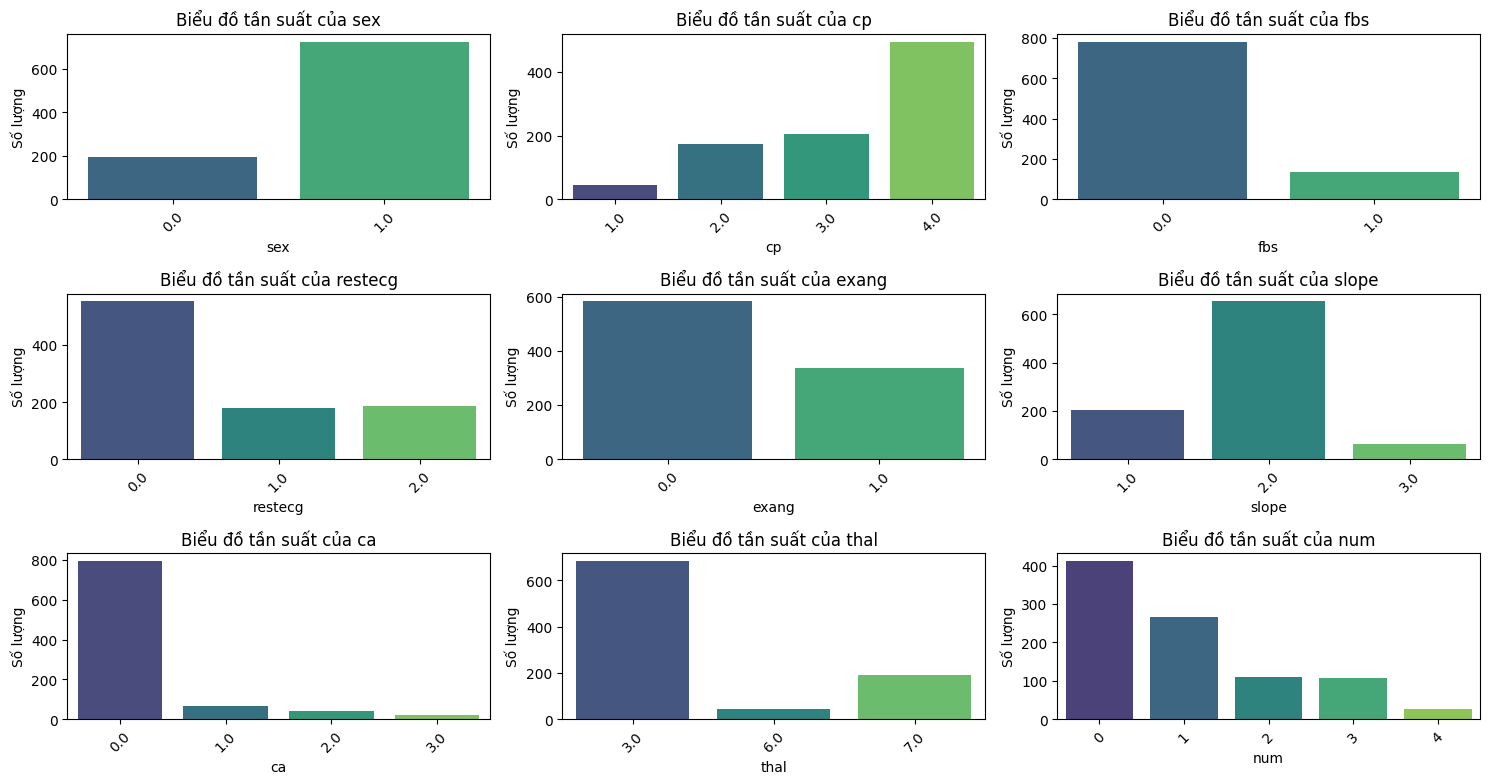

In [169]:
cat_cols_count: pd.Index = data.select_dtypes(include=['category']).columns

for col in cat_cols_count:
    print(f"\n--- Tần suất các giá trị trong cột '{col}' ---")
    print(data[col].value_counts())

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols_count, 1): # i: int, col: str
    plt.subplot(len(cat_cols_count) // 3 + 1, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette="viridis", legend=False)  # Sửa lỗi
    plt.title(f"Biểu đồ tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45)  # Xoay nhãn trục X nếu cần

plt.tight_layout()
plt.show()

Nhận xét và xu hướng dữ liệu từ biểu đồ Histogram

  - sex

Số lượng mẫu nam (giá trị 1) chiếm đa số so với nữ (giá trị 0). Điều này cho thấy dữ liệu bị mất cân bằng giới tính, và có thể cần được lưu ý nếu phân tích theo giới tính.

  - cp

Kiểu đau ngực số 4 (có thể là "không điển hình") chiếm tần suất cao nhất, tiếp theo là loại 3 và 2. Loại 1 rất hiếm. Phân bố này không đều, có thể ảnh hưởng đến mô hình nếu không xử lý tốt.

  - fbs

Phần lớn bệnh nhân có giá trị fbs = 0 (tức là đường huyết bình thường). Chỉ một số ít người có đường huyết cao. Điều này cho thấy đa số người bệnh tim không đi kèm với tiểu đường hoặc tăng đường huyết.

  - restecg

Phần lớn có giá trị bằng 0 (bình thường), hai loại còn lại chiếm số lượng tương đương nhau nhưng ít hơn. Biến này phân bố lệch và có thể mode = 0 sẽ là giá trị hợp lý để điền nếu có thiếu.

  - exang

Phần lớn bệnh nhân không bị đau ngực khi gắng sức (giá trị = 0). Có sự chênh lệch rõ giữa hai nhóm. Cũng là một biến có phân bố mất cân bằng.

  - slope

Giá trị 2 chiếm đa số, cho thấy đây là kiểu dốc phổ biến nhất. Các giá trị khác ít gặp hơn, trong đó 3 là hiếm nhất.

  - ca

Giá trị 0 chiếm áp đảo, chứng tỏ phần lớn người không có mạch bị tắc rõ ràng. Các mức độ nặng hơn (1, 2, 3) hiếm gặp hơn → có thể ảnh hưởng đến phân tích nếu không cân bằng lại nhóm.

  - thal

Chủ yếu là nhóm có giá trị 3 (có thể là "bình thường"), trong khi các giá trị còn lại ít hơn rõ rệt. Đây là biến cần được mã hóa cẩn thận nếu đưa vào mô hình học máy.

  - num

Có vẻ như đây là biến mục tiêu:

Nhóm 0 (không mắc bệnh tim) là nhóm chiếm tỷ lệ cao nhất.

Các mức độ bệnh tăng dần (1 đến 4) thì tần suất giảm dần.
Điều này cho thấy dữ liệu bị mất cân bằng nhãn, và nếu dùng cho bài toán phân loại thì cần áp dụng các kỹ thuật như oversampling (SMOTE) hoặc dùng các thước đo phù hợp như F1-score thay vì accuracy.

## c) Xử lý dữ liệu thiếu

In [170]:
# Loại bỏ các bản ghi trùng lặp
data = data.drop_duplicates()
print(f"Số lượng bản ghi sau khi loại trùng lặp: {data.shape[0]}")

Số lượng bản ghi sau khi loại trùng lặp: 918


## d) Phát hiện dữ liệu ngoại lai (outliers)

- **Phương pháp**: Dựa trên skewness để chọn Z-score (cho phân phối gần chuẩn) hoặc IQR (cho phân phối lệch).
- **Xử lý đề xuất**: Thay thế outliers bằng giá trị trung bình (Mean) hoặc trung vị (Median) tương ứng.

**Công thức tính Khoảng tứ phân vị (IQR) và Ngưỡng xác định Outlier:**

  1. Xác định Tứ phân vị thứ nhất (Q1 - giá trị mà 25% dữ liệu nhỏ hơn nó) và Tứ phân vị thứ ba (Q3 - giá trị mà 75% dữ liệu nhỏ hơn nó).

  2. Tính Khoảng tứ phân vị:

  $\Large IQR = Q3 - Q1$

  3. Xác định Ngưỡng dưới (Lower Bound):

  $\Large L = Q1 - 1.5 \times IQR$

  4. Xác định Ngưỡng trên (Upper Bound):

  $\Large U = Q3 + 1.5 \times IQR$

- Một giá trị được xem là ngoại lai (outlier) nếu nó nhỏ hơn Ngưỡng dưới (L) hoặc lớn hơn Ngưỡng trên (U).

**Công thức tính Z-score (cho dữ liệu mẫu):**

- Z-score cho biết một giá trị cụ thể cách trung bình bao nhiêu lần độ lệch chuẩn.

$\Large Z = \frac{x - \bar{x}}{s}$

Trong đó:

  - Z: là giá trị Z-score.

  - x: là giá trị của một quan sát cụ thể.

  - $\bar{x}$: là trung bình cộng của mẫu.

  - s: là độ lệch chuẩn của mẫu.

In [171]:
# Lặp qua các cột số để phát hiện và xử lý outliers

for col in numeric_features:  # col: str
    skewness = skew(data[col])  # Loại bỏ NaN trước khi tính skewness

    if abs(skewness) < 0.5:  # Phân phối gần chuẩn → Dùng Z-score
        z_scores = zscore(data[col])
        outliers = data[abs(z_scores) > 3]
        print(f"{col}: {len(outliers)} ngoại lai (Xác định bằng Z-score)")

        # Loại bỏ hoặc thay thế giá trị ngoại lai
        # data.loc[abs(z_scores) > 3, col] = round(data[col].mean())  # Thay bằng Mean

        data.loc[abs(z_scores) > 3, col] = round(data[col].median())  # Thay bằng Median

    else:  # Phân phối lệch → Dùng IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col}: {len(outliers)} ngoại lai (Xác định bằng IQR)")

        # Thay thế giá trị ngoại lai bằng Median
        data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = data[col].median()

age: 0 ngoại lai (Xác định bằng Z-score)
trestbps: 8 ngoại lai (Xác định bằng Z-score)
chol: 185 ngoại lai (Xác định bằng IQR)
thalach: 1 ngoại lai (Xác định bằng Z-score)
oldpeak: 2 ngoại lai (Xác định bằng IQR)


In [172]:
# Các cột cần kiểm tra
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Xử lý giá trị 0 trong cholesterol trước khi tìm outlier
data["chol"] = data["chol"].replace(0, np.nan)  # Thay thế 0 bằng NaN
data["chol"] = data["chol"].fillna(int(round(data["chol"].median())))  # Điền median đã làm tròn

# Xác định ngoại lai bằng IQR
def detect_outliers_iqr(df: pd.DataFrame, col: str) -> int:
    """Đếm outliers bằng IQR."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

# Xác định ngoại lai bằng Z-score
def detect_outliers_zscore(df: pd.DataFrame, col: str, threshold: int = 3) -> int:
    """Đếm outliers bằng Z-score."""
    return (np.abs(zscore(data[col])) > threshold).sum()

# Kiểm tra lại số lượng ngoại lai
outliers_after: Dict[str, int] = {}
for col in numeric_features:  # col: str
    if col in ["chol", "oldpeak"]:  # Dùng IQR
        outliers_after[col] = detect_outliers_iqr(data, col)
    else:  # Dùng Z-score
        outliers_after[col] = detect_outliers_zscore(data, col)

print("Số lượng ngoại lai còn lại sau xử lý:", outliers_after)


Số lượng ngoại lai còn lại sau xử lý: {'age': np.int64(0), 'trestbps': np.int64(2), 'chol': np.int64(45), 'thalach': np.int64(0), 'oldpeak': np.int64(0)}


<ipython-input-172-c1b12f651d93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["chol"] = data["chol"].replace(0, np.nan)  # Thay thế 0 bằng NaN
<ipython-input-172-c1b12f651d93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["chol"] = data["chol"].fillna(int(round(data["chol"].median())))  # Điền median đã làm tròn


In [173]:
# Áp dụng Winsorization cho cột 'chol'
Q1 = data["chol"].quantile(0.25)
Q3 = data["chol"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["chol"] = np.where(data["chol"] < lower_bound, lower_bound, data["chol"])
data["chol"] = np.where(data["chol"] > upper_bound, upper_bound, data["chol"])


In [174]:
# Áp dụng Winsorization cho cột 'chol'
Q1 = data["trestbps"].quantile(0.25)
Q3 = data["trestbps"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data["trestbps"] = np.where(data["trestbps"] < lower_bound, lower_bound, data["trestbps"])
data["trestbps"] = np.where(data["trestbps"] > upper_bound, upper_bound, data["trestbps"])


In [175]:
# Kiểm tra lại số lượng ngoại lai sau khi xử lý

# Các cột cần kiểm tra
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
outliers_after = {}
for col in numeric_features:  # col: str
    if col in ["chol", "oldpeak"]:  # Dùng IQR
        outliers_after[col] = detect_outliers_iqr(data, col)
    else:  # Dùng Z-score
        outliers_after[col] = detect_outliers_zscore(data, col)

print("Số lượng ngoại lai còn lại sau xử lý:", outliers_after)


Số lượng ngoại lai còn lại sau xử lý: {'age': np.int64(0), 'trestbps': np.int64(0), 'chol': np.int64(0), 'thalach': np.int64(0), 'oldpeak': np.int64(0)}


In [176]:
# In ra các giá trị ngoại lai còn lại
print("Các giá trị ngoại lai của trestbps:")
print(data.loc[np.abs(zscore(data["trestbps"])) > 3, "trestbps"])

print("\nCác giá trị ngoại lai của chol:")
Q1 = data["chol"].quantile(0.25)
Q3 = data["chol"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(data.loc[(data["chol"] < lower_bound) | (data["chol"] > upper_bound), "chol"])


Các giá trị ngoại lai của trestbps:
Series([], Name: trestbps, dtype: float64)

Các giá trị ngoại lai của chol:
Series([], Name: chol, dtype: float64)


In [177]:
median_oldpeak = data[data['oldpeak'] >= 0]['oldpeak'].median().round(0).astype(int)

# Thay thế các giá trị âm bằng trung vị đã làm tròn
data.loc[data['oldpeak'] < 0, 'oldpeak'] = median_oldpeak

print(data['oldpeak'].unique())

<IntegerArray>
[2, 3, 4, 1, 0, 5]
Length: 6, dtype: Int64


In [178]:
data['num'] = data['num'].astype(int)  # Chuyển về kiểu số nguyên
data.loc[data['num'] > 1, 'num'] = 1   # Cập nhật giá trị
data['num'] = data['num'].astype("category")


In [179]:
print(data.dtypes)

age            Int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak        Int64
slope       category
ca          category
thal        category
num         category
dtype: object


In [180]:
print(data["num"].unique())  # Xem các giá trị thực tế sau khi xử lý


[0, 1]
Categories (2, int64): [0, 1]


In [181]:
# --- Đếm số lượng giá trị 0 và 1 trong cột 'num' sau khi xử lý ---

# Sử dụng value_counts() để đếm số lần xuất hiện của mỗi giá trị duy nhất
num_value_counts: pd.Series = data['num'].value_counts()

print("\nSố lượng bản ghi cho mỗi giá trị 'num':")
print(num_value_counts)

# Lấy số lượng cụ thể cho từng giá trị (0 và 1)
# Sử dụng .get(key, 0) để tránh lỗi nếu một giá trị không tồn tại
count_0: int = num_value_counts.get(0, 0)
count_1: int = num_value_counts.get(1, 0)

print(f"\nSố lượng bản ghi với num = 0 (Không bệnh): {count_0}")
print(f"Số lượng bản ghi với num = 1 (Có bệnh):   {count_1}")

    # Tính và in tỷ lệ phần trăm
print("\nTỷ lệ phần trăm:")
num_proportions: pd.Series = data['num'].value_counts(normalize=True) * 100
print(num_proportions.round(2)) # Làm tròn 2 chữ số thập phân


Số lượng bản ghi cho mỗi giá trị 'num':
num
1    508
0    410
Name: count, dtype: int64

Số lượng bản ghi với num = 0 (Không bệnh): 410
Số lượng bản ghi với num = 1 (Có bệnh):   508

Tỷ lệ phần trăm:
num
1    55.34
0    44.66
Name: proportion, dtype: float64


Trực quan hóa dữ liệu SAU KHI xử lý outliers

In [182]:
print(data.describe())

             age    trestbps        chol     thalach   oldpeak
count      918.0  918.000000  918.000000       918.0     918.0
mean   53.510893  131.595861  237.668437  137.654684  0.830065
std     9.432617   16.517763   41.417812   25.015972  1.066742
min         28.0   90.000000  147.125000        63.0       0.0
25%         47.0  120.000000  217.250000       120.0       0.0
50%         54.0  130.000000  223.000000       138.0       0.0
75%         60.0  140.000000  264.000000      155.75       2.0
max         77.0  170.000000  334.125000       202.0       5.0



--- Thống kê mô tả cho cột số sau khi xử lý outlier: age ---
count        918.0
mean     53.510893
std       9.432617
min           28.0
25%           47.0
50%           54.0
75%           60.0
max           77.0
Name: age, dtype: Float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: trestbps ---
count    918.000000
mean     131.595861
std       16.517763
min       90.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: chol ---
count    918.000000
mean     237.668437
std       41.417812
min      147.125000
25%      217.250000
50%      223.000000
75%      264.000000
max      334.125000
Name: chol, dtype: float64
Outliers (theo IQR):
Số lượng outliers: 0

--- Thống kê mô tả cho cột số sau khi xử lý outlier: thalach ---
count         918.0
mean     137.654684
std       25.015972


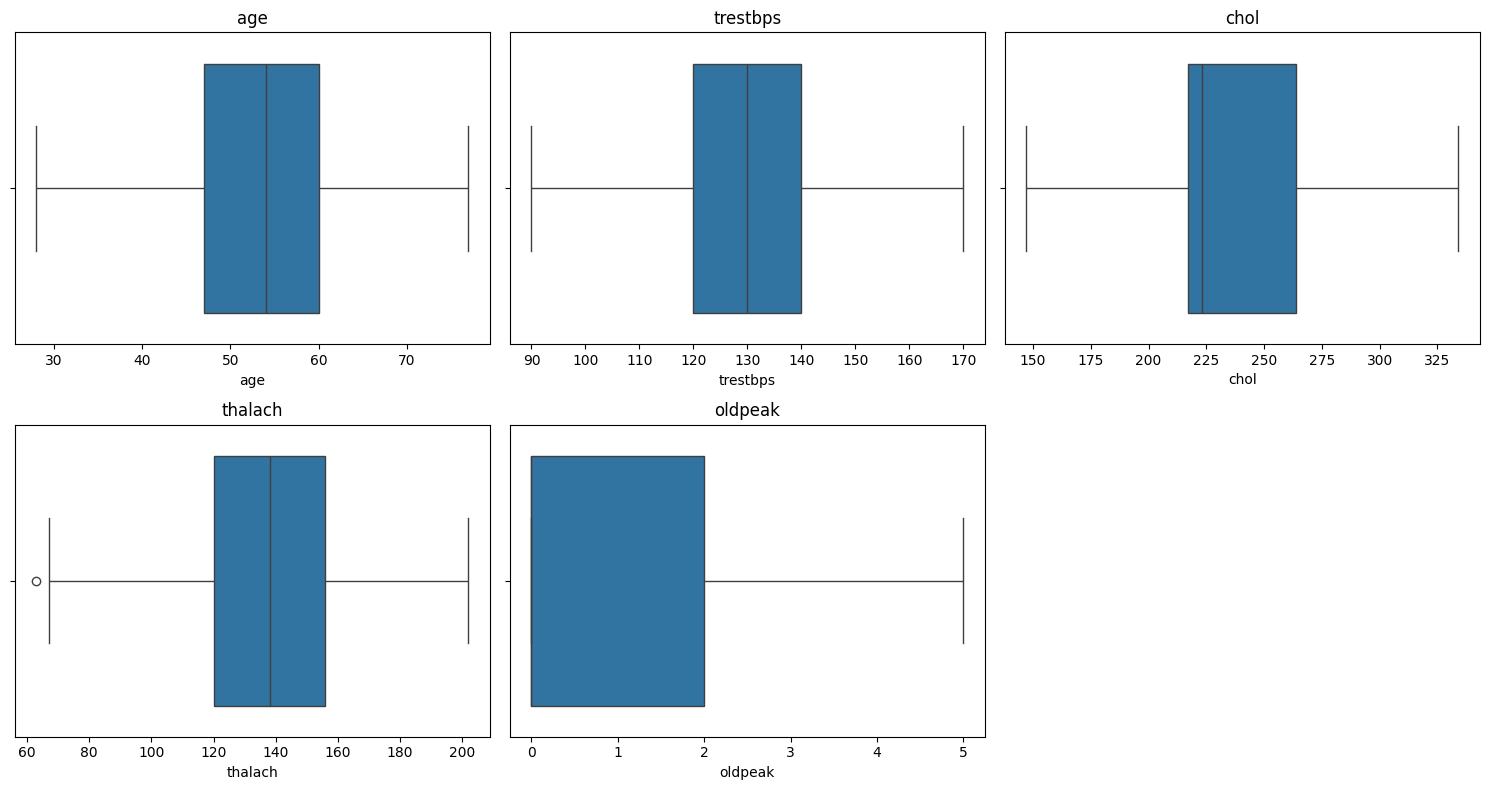

In [183]:
num_cols: List[str] = data.select_dtypes("number").columns.tolist()
num_plots = len(num_cols)

for col in num_cols_plot:
    desc = data[col].describe()
    print(f"\n--- Thống kê mô tả cho cột số sau khi xử lý outlier: {col} ---")
    print(desc)
    print(f"Outliers (theo IQR):")
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"Số lượng outliers: {len(outliers)}")

rows = int(np.ceil(num_plots / 3))
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


--- Ma trận tương quan giữa các cột số sau khi xử lý outlier ---
           age  trestbps  chol  thalach  oldpeak
age       1.00      0.25  0.07    -0.36     0.20
trestbps  0.25      1.00  0.08    -0.10     0.14
chol      0.07      0.08  1.00     0.02     0.07
thalach  -0.36     -0.10  0.02     1.00    -0.15
oldpeak   0.20      0.14  0.07    -0.15     1.00


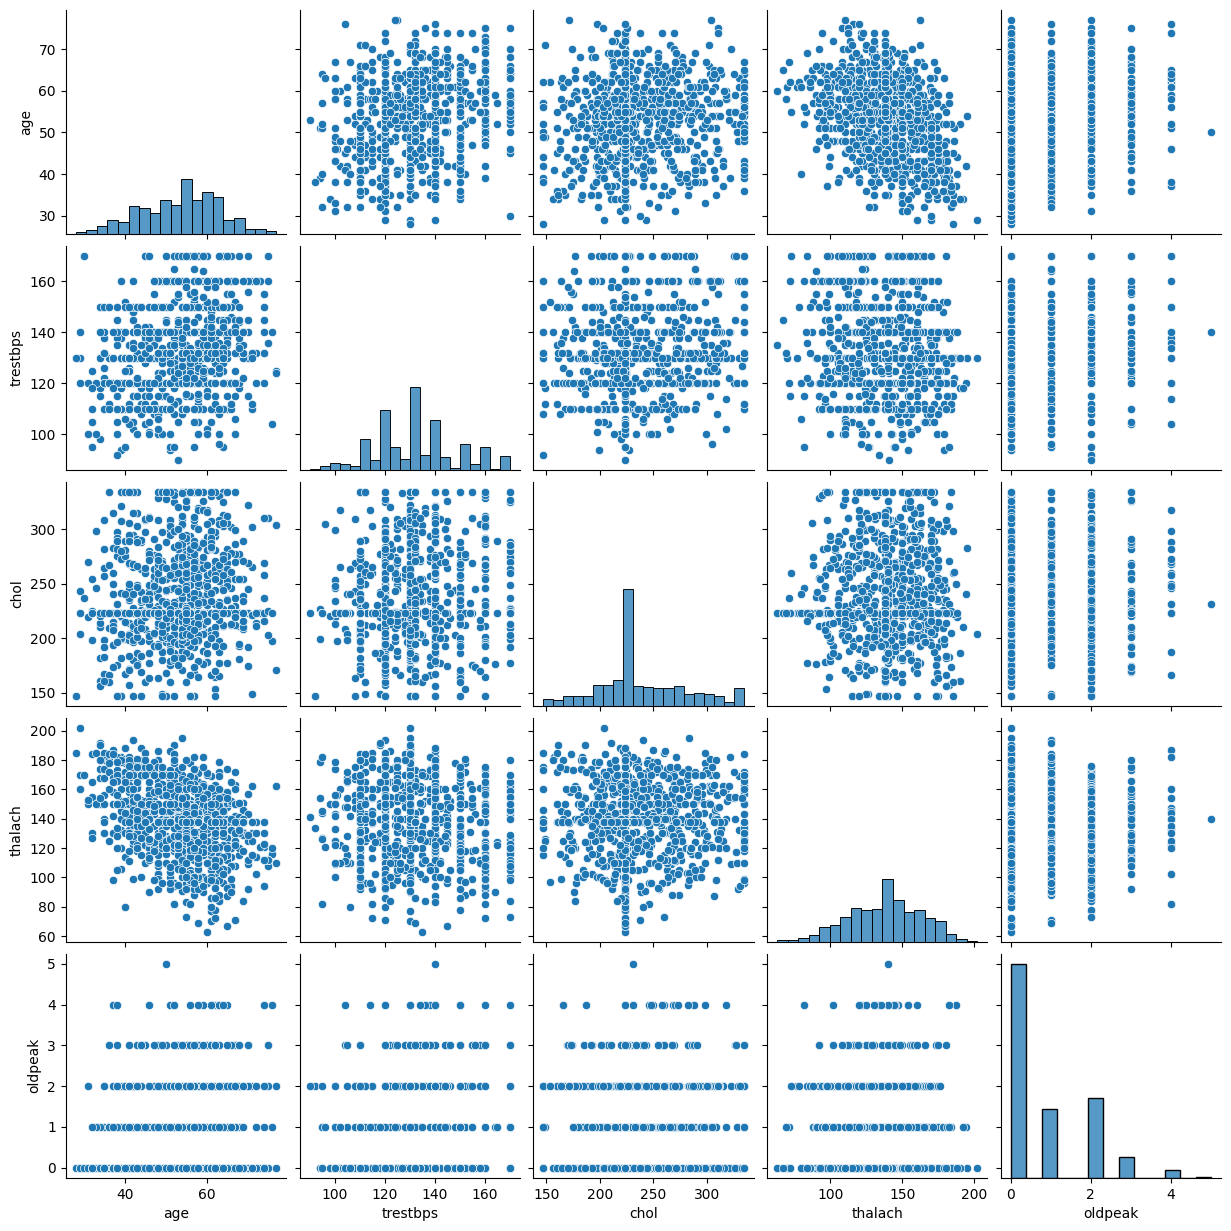

In [184]:
num_cols = data.select_dtypes('number').columns

print("\n--- Ma trận tương quan giữa các cột số sau khi xử lý outlier ---")
corr = data[num_cols].corr()
print(corr.round(2))

sns.pairplot(data)
plt.show()


--- Giá trị trung bình của các cột số theo nhóm trong 'num' sau khi xử lý outlier
       age  trestbps    chol  thalach  oldpeak
num                                           
0    50.55    129.77  235.29   148.25      0.4
1     55.9    133.07  239.59   129.11     1.17


<ipython-input-185-a3d6891af777>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('num')[num_cols].mean().round(2))


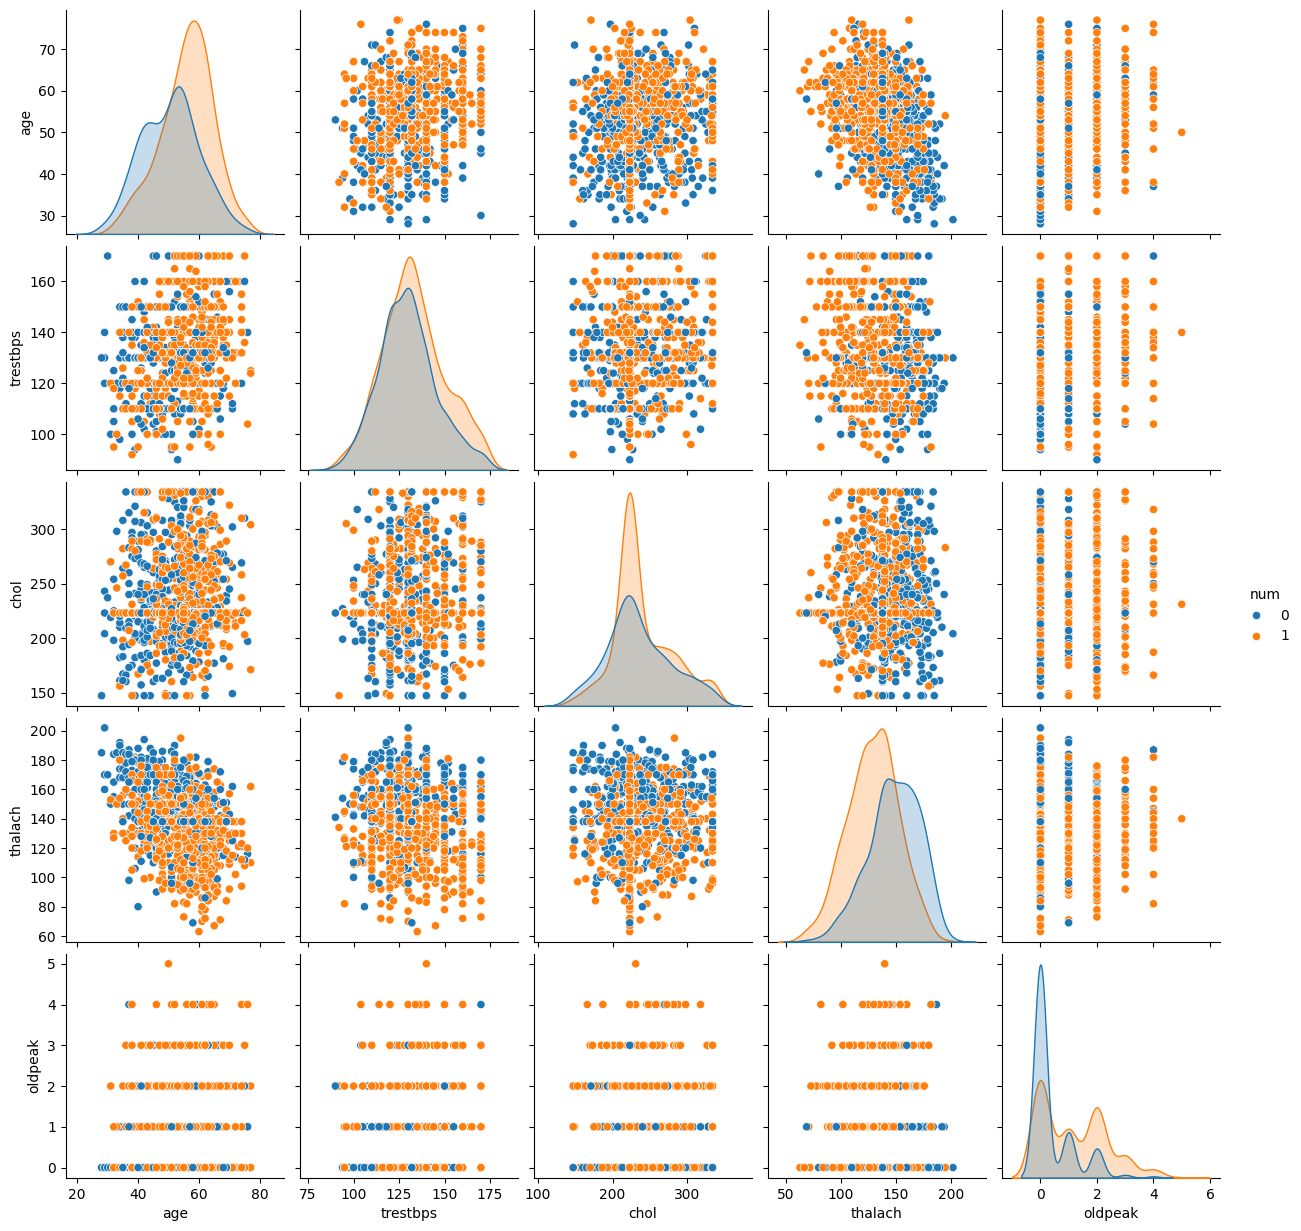

In [185]:
num_cols = data.select_dtypes('number').columns
if 'num' in data.columns:
    print("\n--- Giá trị trung bình của các cột số theo nhóm trong 'num' sau khi xử lý outlier")
    print(data.groupby('num')[num_cols].mean().round(2))
else:
    print("Cột 'num' không tồn tại trong dữ liệu.")

sns.pairplot(data, hue='num')
plt.show()

**Nhận xét pairplot**:

**1. Phân bố theo Nhóm Bệnh (Quan sát trên Đường chéo):**

- **age (Tuổi)**: Phân bố của nhóm num=1 (Có bệnh) có xu hướng hơi dịch chuyển về phía **tuổi cao hơn** so với nhóm num=0 (Không bệnh), mặc dù có sự chồng chéo đáng kể. Đỉnh phân bố của nhóm có bệnh dường như nằm ở độ tuổi lớn hơn một chút.

- **trestbps (Huyết áp nghỉ)**: Phân bố huyết áp giữa hai nhóm num=0 và num=1 **trông khá tương đồng**, không có sự khác biệt rõ rệt về vị trí trung tâm hay độ trải rộng được thể hiện trên biểu đồ này.

- **chol (Cholesterol)**: Tương tự như trestbps, phân bố cholesterol giữa nhóm có bệnh và không bệnh **không cho thấy sự khác biệt lớn** trên pairplot. Cả hai nhóm đều có phân bố tương đối rộng và hơi lệch phải.

- **thalach (Nhịp tim tối đa)**: Đây là một trong những khác biệt rõ ràng nhất. Phân bố của thalach cho nhóm num=1 (Có bệnh) dịch chuyển rõ rệt về phía các giá trị thấp hơn so với nhóm num=0. Điều này cho thấy những người mắc bệnh tim có xu hướng đạt được nhịp tim tối đa thấp hơn.

- **oldpeak (Độ chênh ST)**: Phân bố oldpeak của nhóm num=0 tập trung rất mạnh ở giá trị 0. Ngược lại, phân bố của nhóm num=1 **trải rộng hơn đáng kể và có xu hướng dịch chuyển về các giá trị cao hơn** (độ chênh ST xuống lớn hơn), mặc dù vẫn có nhiều người bệnh có oldpeak bằng 0.

**2. Mối quan hệ Cặp biến theo Nhóm Bệnh (Quan sát ngoài Đường chéo):**

- **thalach và age**: Biểu đồ scatter plot này cho thấy một xu hướng rõ ràng: các điểm của nhóm num=1 (màu cam) có xu hướng tập trung ở vùng *thalach* **thấp hơn** và *age* **cao hơn** so với các điểm của nhóm num=0 (màu xanh). Sự phân tách giữa hai nhóm khá rõ ràng trong không gian này.

- **thalach và oldpeak**: Các điểm num=1 có xu hướng nằm ở vùng *thalach* **thấp** và *oldpeak* **cao**, trong khi các điểm num=0 chủ yếu tập trung ở vùng thalach cao và oldpeak thấp (gần 0).

- **age và oldpeak**: Có vẻ như các điểm num=1 với oldpeak cao hơn cũng có xu hướng thuộc về nhóm tuổi lớn hơn.

- **Các cặp biến khác:** Mối quan hệ giữa các cặp biến như (age, trestbps), (age, chol), (trestbps, chol) không cho thấy sự phân tách rõ ràng giữa hai nhóm num trên các scatter plot này. Các điểm của hai nhóm có vẻ xen kẽ lẫn nhau khá nhiều.

**3. Kết luận từ Pairplot:**

- Pairplot này xác nhận rằng các biến như thalach, oldpeak, và age thể hiện sự khác biệt trực quan rõ ràng nhất trong phân bố giữa nhóm có bệnh và không có bệnh.

- Sự kết hợp của các biến, đặc biệt là thalach với age hoặc oldpeak, cho thấy tiềm năng phân tách tốt giữa hai nhóm.

- Các biến như trestbps và chol, khi được xem xét riêng lẻ hoặc trong mối quan hệ với nhau trên pairplot này, dường như ít có khả năng phân biệt trực quan giữa hai nhóm num.

- Những quan sát này củng cố kết quả từ phân tích tương quan và kiểm định giả thuyết, đồng thời cung cấp gợi ý về các biến quan trọng tiềm năng cho các mô hình dự đoán sau này.




--- Phân phối giá trị cho cột age sau khi xử lý outlier
age
(27.951, 32.9]     12
(32.9, 37.8]       37
(37.8, 42.7]       86
(42.7, 47.6]      104
(47.6, 52.5]      148
(52.5, 57.4]      201
(57.4, 62.3]      175
(62.3, 67.2]      101
(67.2, 72.1]       39
(72.1, 77.0]       15
Name: count, dtype: int64

--- Phân phối giá trị cho cột trestbps sau khi xử lý outlier
trestbps
(89.92, 98.0]      12
(98.0, 106.0]      34
(106.0, 114.0]     82
(114.0, 122.0]    175
(122.0, 130.0]    191
(130.0, 138.0]    121
(138.0, 146.0]    136
(146.0, 154.0]     67
(154.0, 162.0]     64
(162.0, 170.0]     36
Name: count, dtype: int64

--- Phân phối giá trị cho cột chol sau khi xử lý outlier
chol
(146.938, 165.825]     30
(165.825, 184.525]     45
(184.525, 203.225]     73
(203.225, 221.925]    111
(221.925, 240.625]    321
(240.625, 259.325]     87
(259.325, 278.025]     90
(278.025, 296.725]     58
(296.725, 315.425]     51
(315.425, 334.125]     52
Name: count, dtype: int64

--- Phân phối giá trị cho 

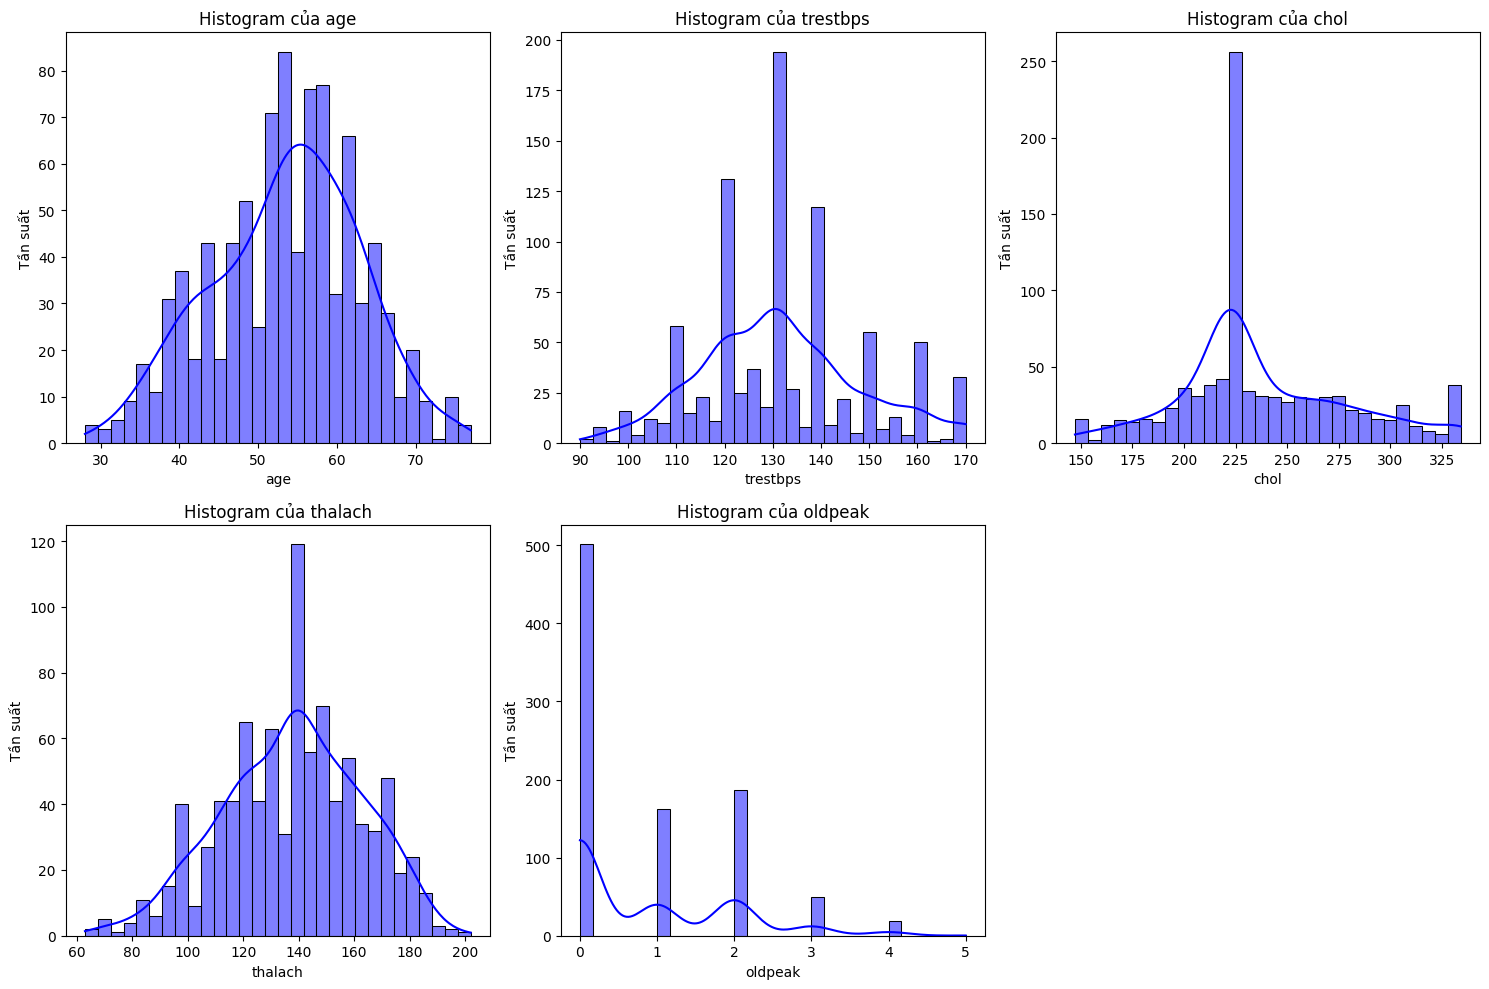

In [186]:
# Chọn các cột số
num_cols: List[str] = data.select_dtypes("number").columns.tolist()

for col in num_cols:
    print(f"\n--- Phân phối giá trị cho cột {col} sau khi xử lý outlier")
    value_counts = pd.cut(data[col], bins=10).value_counts().sort_index()
    print(value_counts)

# Thiết lập kích thước
plt.figure(figsize=(15, 10))

# Duyệt qua từng cột số để vẽ histogram
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # Sắp xếp 3 cột trên mỗi hàng
    sns.histplot(data[col], bins=30, kde=True, color='blue')  # Vẽ histogram có KDE
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()


--- Tần suất các giá trị trong cột 'sex' sau khi xử lý outlier
sex
1.0    725
0.0    193
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'cp' sau khi xử lý outlier
cp
4.0    496
3.0    203
2.0    173
1.0     46
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'fbs' sau khi xử lý outlier
fbs
0.0    780
1.0    138
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'restecg' sau khi xử lý outlier
restecg
0.0    552
2.0    188
1.0    178
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'exang' sau khi xử lý outlier
exang
0.0    582
1.0    336
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'slope' sau khi xử lý outlier
slope
2.0    652
1.0    203
3.0     63
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'ca' sau khi xử lý outlier
ca
0.0    790
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

--- Tần suất các giá trị trong cột 'thal' sau khi xử lý outlier
thal
3.0    680
7.0    192
6.0     46
Name: c

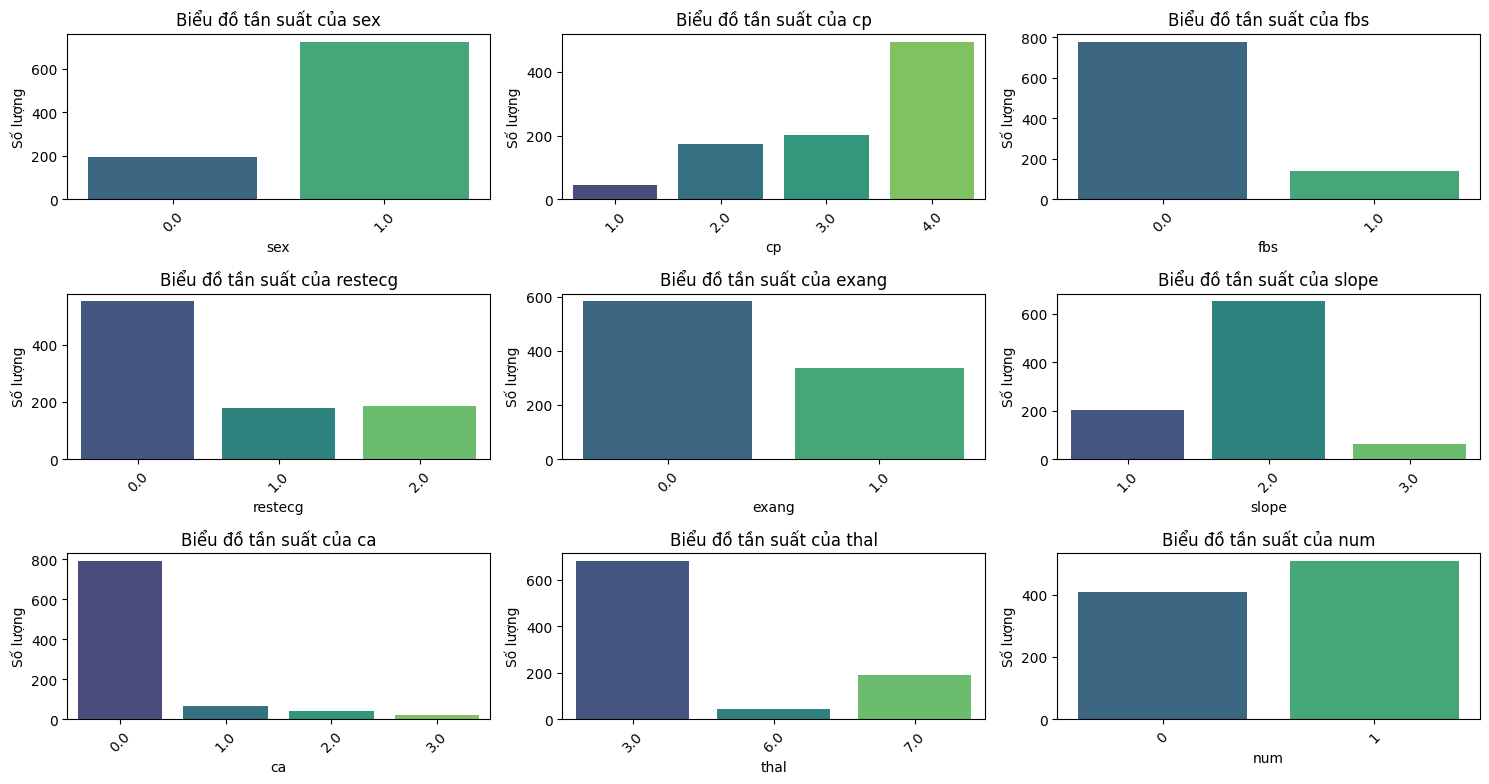

In [187]:
cat_cols: List[str] = data.select_dtypes(include='category').columns.tolist()

for col in cat_cols_count:
    print(f"\n--- Tần suất các giá trị trong cột '{col}' sau khi xử lý outlier")
    print(data[col].value_counts())

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette="viridis", legend=False)  # Sửa lỗi
    plt.title(f"Biểu đồ tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45)  # Xoay nhãn trục X nếu cần

plt.tight_layout()
plt.show()


--- Phân bố của cột 'num' ---
Giá trị        Số lượng       Tỷ lệ (%) 
----------------------------------------
0              410             44.66%
1              508             55.34%


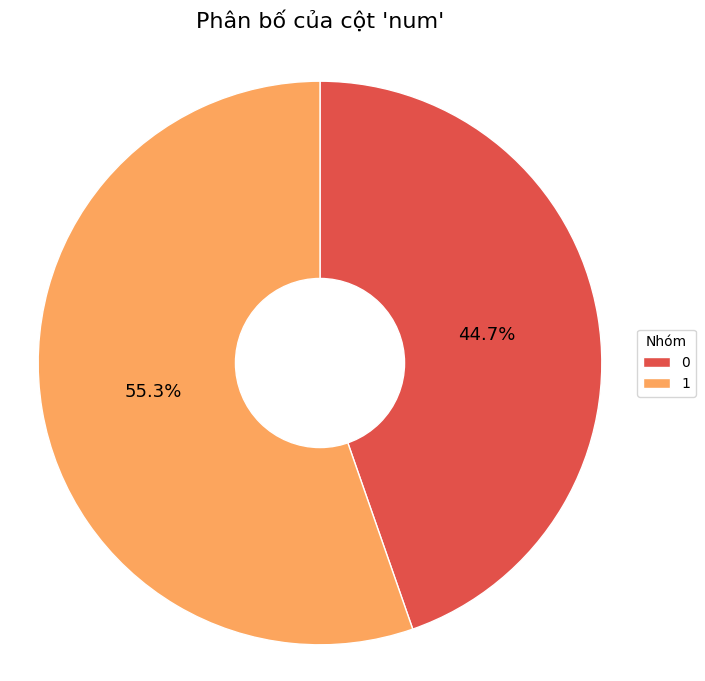

In [188]:
col = "num"  # Thay "num" bằng tên cột bạn muốn vẽ

# Kiểm tra nếu cột tồn tại trong dữ liệu
if col in data.columns:
    # Lấy giá trị counts và labels
    value_counts = data[col].value_counts().sort_values()

    total = value_counts.sum()

    print(f"\n--- Phân bố của cột '{col}' ---")
    print(f"{'Giá trị':<15}{'Số lượng':<15}{'Tỷ lệ (%)':<10}")
    print("-" * 40)

    for val, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{str(val):<15}{count:<15}{percentage:>6.2f}%")


    sizes = value_counts.values

    # Tạo màu sắc từ seaborn
    colors = sns.color_palette("Spectral")

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes,
        # labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 13, 'ha': 'center'}
    )

    # Donut
    plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))

   # Thêm chú thích
    plt.legend(value_counts.index, title="Nhóm", loc="center left", bbox_to_anchor=(1, 0.5))

    # Thêm tiêu đề
    plt.title(f"Phân bố của cột '{col}'", fontsize=16, pad=20)
    plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
    plt.show()
else:
    print(f"Không tìm thấy cột '{col}' trong dữ liệu!")

## e) Nhận xét tổng quan về tập dữ liệu

Dựa trên quá trình khám phá và tiền xử lý dữ liệu (EDA), chúng ta có thể rút ra các nhận xét tổng quan sau về bộ dữ liệu Heart Disease UCI đã được làm sạch:

1. **Kích thước và Tính đầy đủ:**

  - Sau khi gộp dữ liệu từ 4 nguồn và loại bỏ 2 bản ghi trùng lặp, bộ dữ liệu cuối cùng để phân tích gồm **918 bản ghi** và **14 thuộc tính** (biến số).

  - Dữ liệu gốc chứa một lượng lớn giá trị thiếu, đặc biệt nghiêm trọng ở các cột ca (66.41%), thal (52.83%), và slope (33.59%). Các cột khác như fbs, oldpeak, trestbps, thalach, exang, chol, restecg cũng có tỷ lệ thiếu nhất định.

  - Quá trình xử lý đã được thực hiện để điền các giá trị thiếu này, sử dụng phương pháp trung bình (Mean) hoặc trung vị (Median) cho biến số dựa trên độ lệch (skewness) và phương pháp Mode cho biến phân loại. Điều này đảm bảo bộ dữ liệu không còn giá trị thiếu để phục vụ các phân tích tiếp theo.

2. **Kiểu dữ liệu:**

  Bộ dữ liệu bao gồm cả biến số **định lượng (numerical)** như age, trestbps, chol, thalach, oldpeak và biến **định tính (categorical)** như sex, cp, fbs, restecg, exang, slope, ca, thal, num. Các biến phân loại đã được chuyển đổi sang kiểu 'category' của Pandas để phân tích phù hợp.
  
  Biến mục tiêu num đã được chuẩn hóa thành dạng nhị phân (0: <50% hẹp, 1: >50% hẹp).

3. **Phân bố biến số định lượng (sau xử lý outliers):**

  - **age**: Độ tuổi của bệnh nhân trong mẫu trải dài từ 28 đến 77 tuổi, tập trung chủ yếu quanh độ tuổi trung niên (trung bình ≈ 53.5, trung vị = 54). Histogram cho thấy phân bố gần đối xứng, giống hình chuông.

  - **trestbps (Huyết áp nghỉ)**: Phân bố tương đối tập trung quanh giá trị 130 mmHg (trung vị), với khoảng tứ phân vị từ 120 đến 140 mmHg. Quá trình xử lý outliers đã giới hạn các giá trị cực đoan.

  - **chol (Cholesterol)**: Sau khi xử lý outliers và loại bỏ các giá trị 0 không hợp lệ, phân bố cholesterol có vẻ vẫn hơi lệch phải (trung bình ≈ 237.7 cao hơn trung vị = 223), nhưng các giá trị cực lớn đã được giới hạn (max ≈ 334).

  - **thalach (Nhịp tim tối đa)**: Có khoảng giá trị khá rộng (khoảng 60 đến trên 200 bpm), phân bố tương đối đối xứng quanh mức 138 bpm (trung vị).

  - **oldpeak (Độ chênh ST)**: Phân bố rất lệch phải, với phần lớn giá trị tập trung ở 0 (trung vị = 0, Q1=0), cho thấy đa số bệnh nhân không có hoặc có ít độ chênh ST xuống đáng kể lúc nghỉ hoặc sau khi xử lý outliers/giá trị âm.

4. **Phân bố biến định tính:**

  - **sex**: Có sự mất cân bằng đáng kể về giới tính, với số lượng Nam (1) chiếm tỷ lệ cao hơn nhiều so với Nữ (0) (ước tính từ biểu đồ).

  - **cp (Loại đau ngực)**: Loại 4 (Không triệu chứng - Asymptomatic) là phổ biến nhất, chiếm đa số các trường hợp.

  - **fbs (Đường huyết lúc đói)**: Phần lớn bệnh nhân có đường huyết lúc đói <= 120 mg/dl (fbs=0).

  - **restecg (ECG nghỉ)**: Kết quả ECG bình thường (restecg=0) là phổ biến nhất.

  - **exang (Đau ngực khi gắng sức)**: Số người không bị đau ngực khi gắng sức (exang=0) nhiều hơn đáng kể so với số người có (exang=1).

  - **slope (Độ dốc ST)**: Loại 2 (Flat - đi ngang) là phổ biến nhất, tiếp theo là loại 1 (Upsloping - dốc lên).

  - **ca (Số mạch chính bị màu)**: Phần lớn bệnh nhân có ca=0. Số lượng bệnh nhân có ca=1, 2, 3 thấp hơn nhiều.

  - **thal (Thalassemia)**: Loại 3 (Normal) chiếm đa số, tiếp theo là loại 7 (Reversible defect).

  - **num (Tình trạng bệnh)**: Biến mục tiêu cho thấy tỷ lệ người được chẩn đoán có bệnh (num=1) là khoảng **55.3%** (508/918), và không có bệnh (num=0) là khoảng **44.7%** (410/918). Tỷ lệ này tương đối cân bằng, thuận lợi cho việc xây dựng mô hình dự đoán nếu cần.




**Kết luận tổng quan:**

  

Bộ dữ liệu sau khi làm sạch bao gồm 918 bản ghi với đầy đủ thông tin cho 14 thuộc tính. Dữ liệu đã được xử lý các vấn đề về giá trị thiếu, trùng lặp và ngoại lai. Dữ liệu chứa sự kết hợp của các biến số và biến phân loại, với một số biến phân loại có sự mất cân bằng về tần suất các nhóm. Biến mục tiêu "***num***" có tỷ lệ tương đối cân bằng giữa hai nhóm. Nhìn chung, bộ dữ liệu này đã sẵn sàng và phù hợp để thực hiện các phân tích thống kê suy luận (kiểm định giả thuyết) và phân tích tương quan nhằm tìm hiểu sâu hơn về các yếu tố liên quan đến bệnh tim.

# 3) Phân tích phân phối xác suất

#### Phân tích Phân phối Xác suất (Biến 'age' và 'chol')

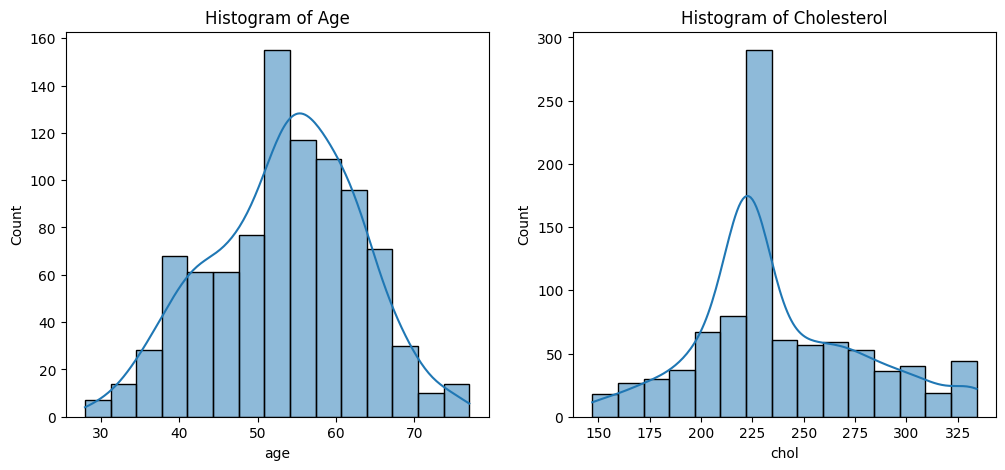

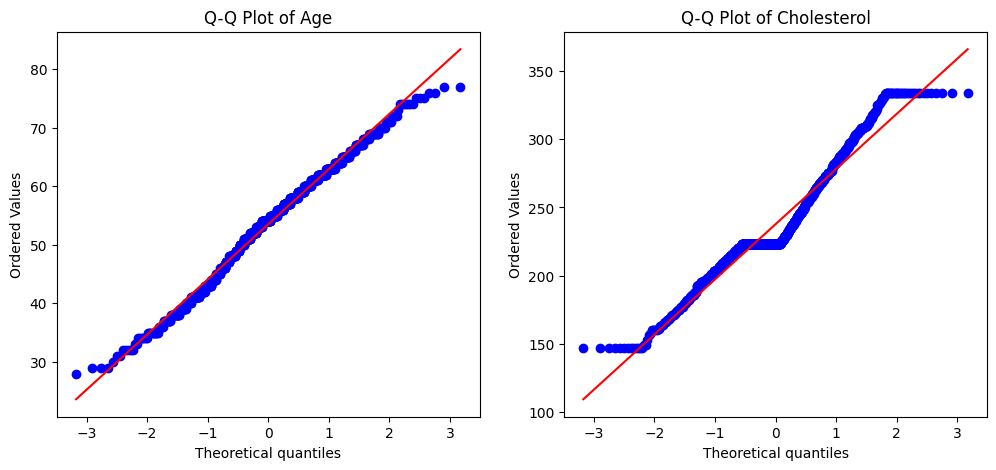

Shapiro-Wilk test for Age: p-value = 0.00002
Shapiro-Wilk test for Cholesterol: p-value = 0.00000


In [189]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ histogram để xem hình dạng phân phối
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['age'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

sns.histplot(data['chol'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Cholesterol')

plt.show()

# Q-Q Plot để kiểm tra tính chuẩn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(data['age'], dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Age")

stats.probplot(data['chol'], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Cholesterol")

plt.show()

# Kiểm định Shapiro-Wilk cho tính chuẩn
shapiro_age = stats.shapiro(data['age'])
shapiro_chol = stats.shapiro(data['chol'])

print(f"Shapiro-Wilk test for Age: p-value = {shapiro_age.pvalue:.5f}")
print(f"Shapiro-Wilk test for Cholesterol: p-value = {shapiro_chol.pvalue:.5f}")

# Nếu p-value < 0.05, có thể giả định rằng dữ liệu không tuân theo phân phối chuẩn.


In [190]:
# Chuẩn bị dữ liệu
age_data = data["age"]
chol_data = data["chol"]

# Kiểm tra phân phối Exponential (KS-Test)
ks_age_exp = stats.kstest(age_data, "expon", args=(age_data.min(), age_data.mean()))
ks_chol_exp = stats.kstest(chol_data, "expon", args=(chol_data.min(), chol_data.mean()))

print(f"Kolmogorov-Smirnov test for Exponential (Age): p-value = {ks_age_exp.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Exponential (Cholesterol): p-value = {ks_chol_exp.pvalue:.5f}")

# Kiểm tra phân phối Poisson (KS-Test)
lambda_age = np.mean(age_data)  # Poisson cần lambda là giá trị trung bình
lambda_chol = np.mean(chol_data)

ks_age_poisson = stats.kstest(age_data, "poisson", args=(lambda_age,))
ks_chol_poisson = stats.kstest(chol_data, "poisson", args=(lambda_chol,))

print(f"Kolmogorov-Smirnov test for Poisson (Age): p-value = {ks_age_poisson.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Poisson (Cholesterol): p-value = {ks_chol_poisson.pvalue:.5f}")

# Kiểm tra phân phối Exponential bằng Anderson-Darling test
ad_age_exp = stats.anderson(age_data, dist="expon")
ad_chol_exp = stats.anderson(chol_data, dist="expon")

print("\nAnderson-Darling test for Exponential distribution:")
print(f"Age: Statistic = {ad_age_exp.statistic:.5f}, Critical values = {ad_age_exp.critical_values}, Significance levels = {ad_age_exp.significance_level}")
print(f"Cholesterol: Statistic = {ad_chol_exp.statistic:.5f}, Critical values = {ad_chol_exp.critical_values}, Significance levels = {ad_chol_exp.significance_level}")

# Kiểm tra phân phối Poisson bằng Anderson-Darling test (Không có sẵn trong scipy, có thể kiểm tra bằng histogram)


Kolmogorov-Smirnov test for Exponential (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Exponential (Cholesterol): p-value = 0.00000
Kolmogorov-Smirnov test for Poisson (Age): p-value = 0.00000
Kolmogorov-Smirnov test for Poisson (Cholesterol): p-value = 0.00000

Anderson-Darling test for Exponential distribution:
Age: Statistic = 286.67082, Critical values = [0.921 1.077 1.34  1.605 1.956], Significance levels = [15.  10.   5.   2.5  1. ]
Cholesterol: Statistic = 294.94113, Critical values = [0.921 1.077 1.34  1.605 1.956], Significance levels = [15.  10.   5.   2.5  1. ]


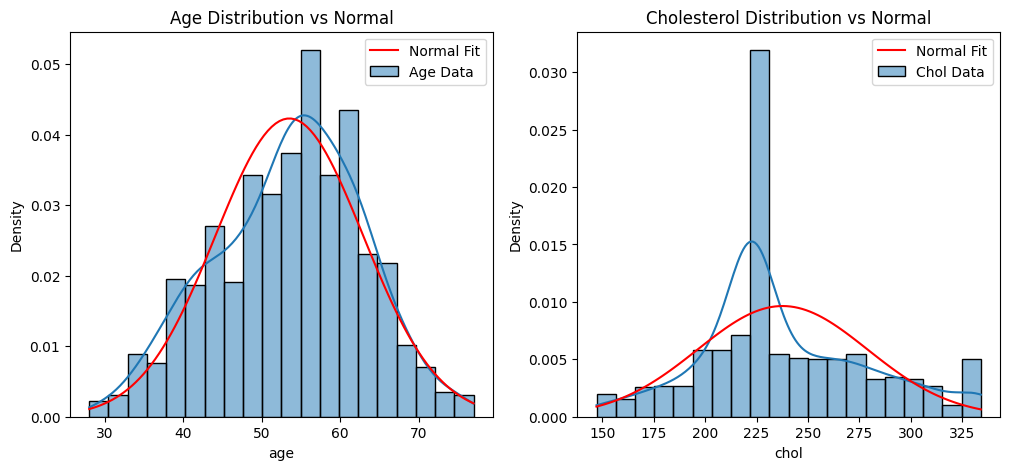

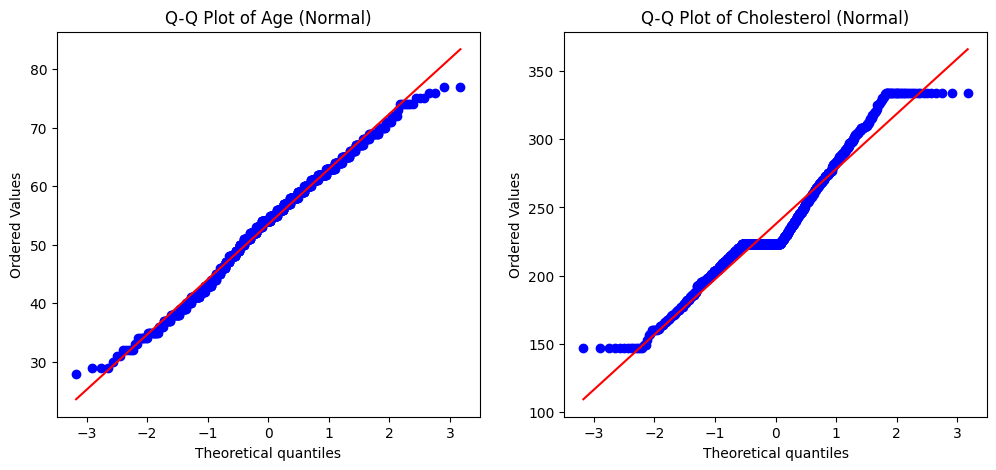

Shapiro-Wilk test for Age: p-value = 0.00002
Shapiro-Wilk test for Cholesterol: p-value = 0.00000
Kolmogorov-Smirnov test for Normal (Age): p-value = 0.00125
Kolmogorov-Smirnov test for Normal (Cholesterol): p-value = 0.00000

Anderson-Darling test for Normal distribution:
Age: Statistic = 2.78038, Critical values = [0.574 0.653 0.784 0.914 1.087], Significance levels = [15.  10.   5.   2.5  1. ]
Cholesterol: Statistic = 20.72982, Critical values = [0.574 0.653 0.784 0.914 1.087], Significance levels = [15.  10.   5.   2.5  1. ]


In [191]:
# Chuẩn bị dữ liệu
age_data = data["age"]
chol_data = data["chol"]

# Vẽ Histogram và đường Normal Fit
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram của Age với đường Normal Fit
sns.histplot(age_data, bins=20, kde=True, stat="density", ax=axes[0], label="Age Data")
x_age = np.linspace(min(age_data), max(age_data), 100)
axes[0].plot(x_age, stats.norm.pdf(x_age, np.mean(age_data), np.std(age_data)), 'r-', label="Normal Fit")
axes[0].set_title("Age Distribution vs Normal")
axes[0].legend()

# Histogram của Cholesterol với đường Normal Fit
sns.histplot(chol_data, bins=20, kde=True, stat="density", ax=axes[1], label="Chol Data")
x_chol = np.linspace(min(chol_data), max(chol_data), 100)
axes[1].plot(x_chol, stats.norm.pdf(x_chol, np.mean(chol_data), np.std(chol_data)), 'r-', label="Normal Fit")
axes[1].set_title("Cholesterol Distribution vs Normal")
axes[1].legend()

plt.show()

# Q-Q Plot để kiểm tra tính chuẩn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(age_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Age (Normal)")

stats.probplot(chol_data, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Cholesterol (Normal)")

plt.show()

# Kiểm định Shapiro-Wilk
shapiro_age = stats.shapiro(age_data)
shapiro_chol = stats.shapiro(chol_data)

print(f"Shapiro-Wilk test for Age: p-value = {shapiro_age.pvalue:.5f}")
print(f"Shapiro-Wilk test for Cholesterol: p-value = {shapiro_chol.pvalue:.5f}")

# Kiểm định Kolmogorov-Smirnov
ks_age_norm = stats.kstest(age_data, "norm", args=(np.mean(age_data), np.std(age_data)))
ks_chol_norm = stats.kstest(chol_data, "norm", args=(np.mean(chol_data), np.std(chol_data)))

print(f"Kolmogorov-Smirnov test for Normal (Age): p-value = {ks_age_norm.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Normal (Cholesterol): p-value = {ks_chol_norm.pvalue:.5f}")

# Kiểm định Anderson-Darling
ad_age_norm = stats.anderson(age_data, dist="norm")
ad_chol_norm = stats.anderson(chol_data, dist="norm")

print("\nAnderson-Darling test for Normal distribution:")
print(f"Age: Statistic = {ad_age_norm.statistic:.5f}, Critical values = {ad_age_norm.critical_values}, Significance levels = {ad_age_norm.significance_level}")
print(f"Cholesterol: Statistic = {ad_chol_norm.statistic:.5f}, Critical values = {ad_chol_norm.critical_values}, Significance levels = {ad_chol_norm.significance_level}")


In [192]:
# Chuẩn bị dữ liệu
age_data = data["age"]
chol_data = data["chol"]

# Kiểm tra phân phối Gamma (chỉ dùng KS-Test) ###
shape_age, loc_age, scale_age = stats.gamma.fit(age_data)
shape_chol, loc_chol, scale_chol = stats.gamma.fit(chol_data)

ks_age_gamma = stats.kstest(age_data, "gamma", args=(shape_age, loc_age, scale_age))
ks_chol_gamma = stats.kstest(chol_data, "gamma", args=(shape_chol, loc_chol, scale_chol))

print(f"Kolmogorov-Smirnov test for Gamma (Age): p-value = {ks_age_gamma.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Gamma (Cholesterol): p-value = {ks_chol_gamma.pvalue:.5f}")

# Kiểm tra phân phối Log-Normal ###
shape_age_ln, loc_age_ln, scale_age_ln = stats.lognorm.fit(age_data)
shape_chol_ln, loc_chol_ln, scale_chol_ln = stats.lognorm.fit(chol_data)

ks_age_lognorm = stats.kstest(age_data, "lognorm", args=(shape_age_ln, loc_age_ln, scale_age_ln))
ks_chol_lognorm = stats.kstest(chol_data, "lognorm", args=(shape_chol_ln, loc_chol_ln, scale_chol_ln))

ad_age_lognorm = stats.anderson(age_data, dist="logistic")
ad_chol_lognorm = stats.anderson(chol_data, dist="logistic")

print(f"\nKolmogorov-Smirnov test for Log-Normal (Age): p-value = {ks_age_lognorm.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Log-Normal (Cholesterol): p-value = {ks_chol_lognorm.pvalue:.5f}")
print(f"Anderson-Darling test for Logistic (Age): Statistic = {ad_age_lognorm.statistic:.5f}")
print(f"Anderson-Darling test for Logistic (Cholesterol): Statistic = {ad_chol_lognorm.statistic:.5f}")

# Kiểm tra phân phối Weibull ###
shape_age_wb, loc_age_wb, scale_age_wb = stats.weibull_min.fit(age_data)
shape_chol_wb, loc_chol_wb, scale_chol_wb = stats.weibull_min.fit(chol_data)

ks_age_weibull = stats.kstest(age_data, "weibull_min", args=(shape_age_wb, loc_age_wb, scale_age_wb))
ks_chol_weibull = stats.kstest(chol_data, "weibull_min", args=(shape_chol_wb, loc_chol_wb, scale_chol_wb))

ad_age_weibull = stats.anderson(age_data, dist="weibull_min")
ad_chol_weibull = stats.anderson(chol_data, dist="weibull_min")

print(f"\nKolmogorov-Smirnov test for Weibull (Age): p-value = {ks_age_weibull.pvalue:.5f}")
print(f"Kolmogorov-Smirnov test for Weibull (Cholesterol): p-value = {ks_chol_weibull.pvalue:.5f}")
print(f"Anderson-Darling test for Weibull (Age): Statistic = {ad_age_weibull.statistic:.5f}")
print(f"Anderson-Darling test for Weibull (Cholesterol): Statistic = {ad_chol_weibull.statistic:.5f}")


Kolmogorov-Smirnov test for Gamma (Age): p-value = 0.00022
Kolmogorov-Smirnov test for Gamma (Cholesterol): p-value = 0.00000

Kolmogorov-Smirnov test for Log-Normal (Age): p-value = 0.00125
Kolmogorov-Smirnov test for Log-Normal (Cholesterol): p-value = 0.00000
Anderson-Darling test for Logistic (Age): Statistic = 3.42920
Anderson-Darling test for Logistic (Cholesterol): Statistic = 18.83487

Kolmogorov-Smirnov test for Weibull (Age): p-value = 0.02511
Kolmogorov-Smirnov test for Weibull (Cholesterol): p-value = 0.00000
Anderson-Darling test for Weibull (Age): Statistic = 1.44044
Anderson-Darling test for Weibull (Cholesterol): Statistic = 17.52146


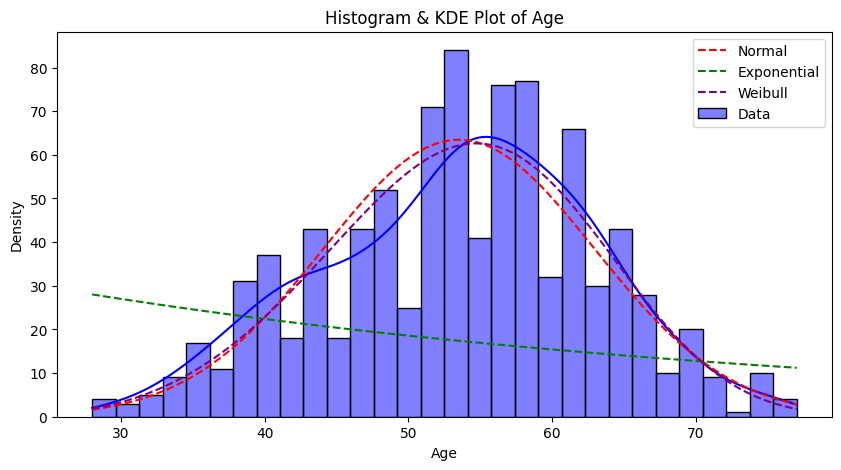

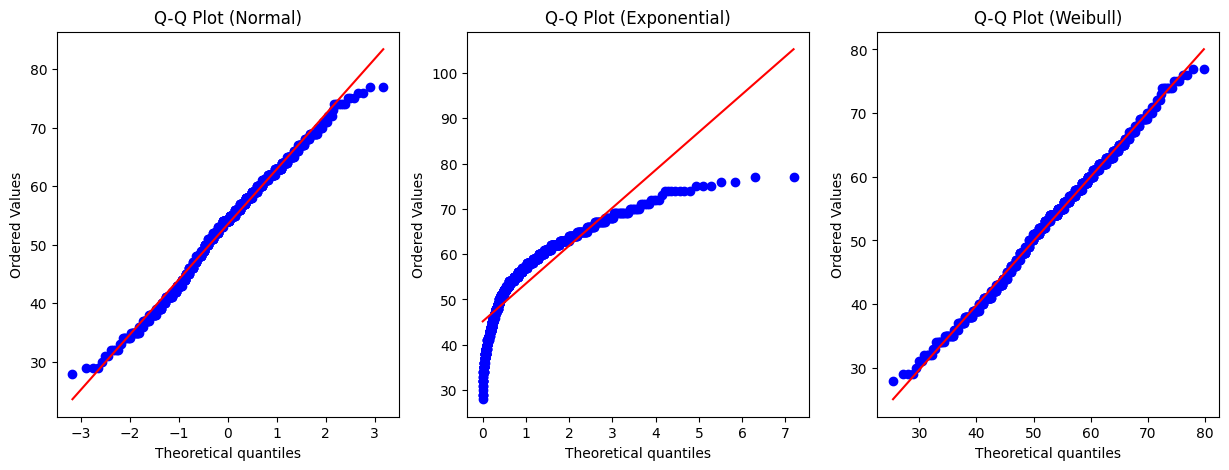

In [193]:
# Dữ liệu age
age_data = data["age"]

# Vẽ Histogram + KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=30, kde=True, color="blue", label="Data")
x = np.linspace(age_data.min(), age_data.max(), 100)

# Thêm đường phân phối chuẩn
mu, sigma = np.mean(age_data), np.std(age_data)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='red', linestyle="--", label="Normal")

# Thêm đường phân phối Exponential
lambda_exp = 1 / np.mean(age_data)
plt.plot(x, stats.expon.pdf(x, age_data.min(), 1/lambda_exp) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='green', linestyle="--", label="Exponential")

# Thêm đường phân phối Weibull
shape, loc, scale = stats.weibull_min.fit(age_data)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale) * len(age_data) * (age_data.max() - age_data.min()) / 30,
         color='purple', linestyle="--", label="Weibull")

plt.title("Histogram & KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

# Vẽ Q-Q Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Q-Q Plot với Normal Distribution
stats.probplot(age_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot (Normal)")

# Q-Q Plot với Exponential Distribution
stats.probplot(age_data, dist="expon", plot=axes[1])
axes[1].set_title("Q-Q Plot (Exponential)")

# Q-Q Plot với Weibull Distribution
stats.probplot(age_data, dist=stats.weibull_min(shape, loc, scale), plot=axes[2])
axes[2].set_title("Q-Q Plot (Weibull)")

plt.show()


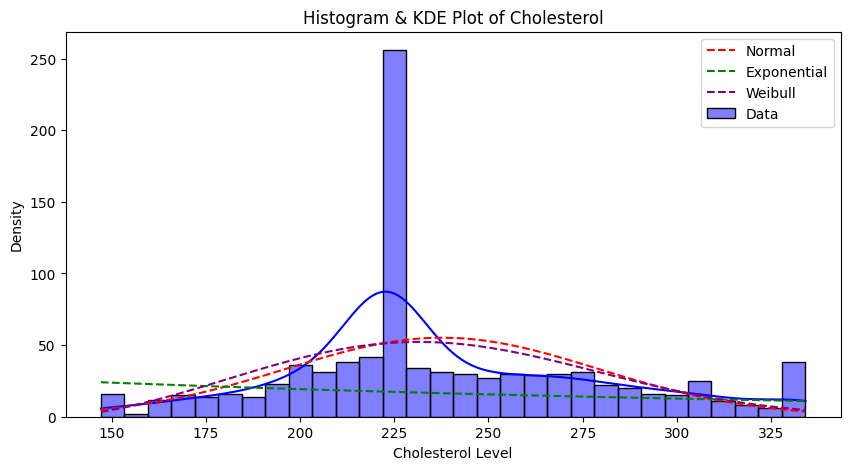

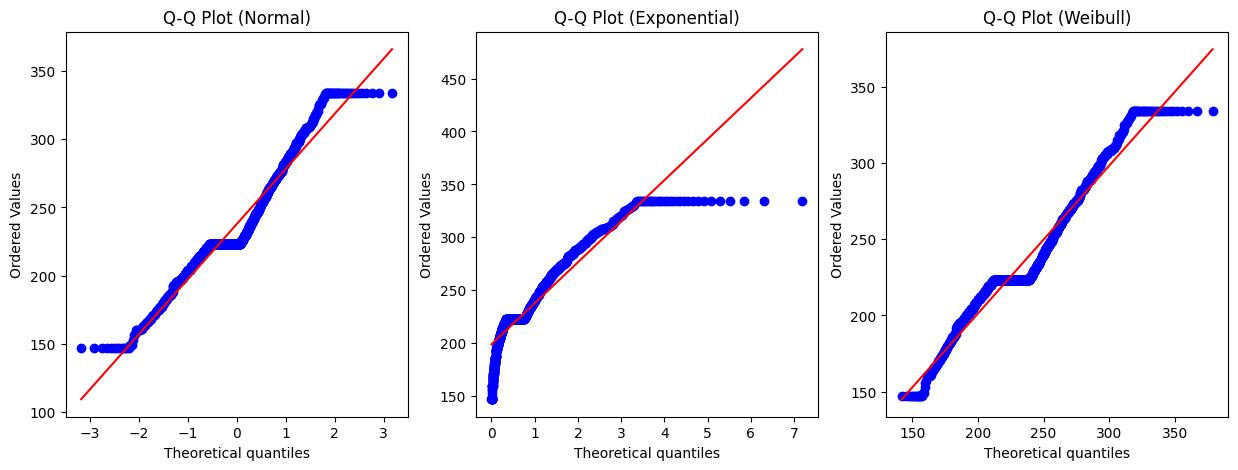

In [194]:
# Dữ liệu Cholesterol
chol_data = data["chol"]

# Vẽ Histogram + KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(chol_data, bins=30, kde=True, color="blue", label="Data")
x = np.linspace(chol_data.min(), chol_data.max(), 100)

# Thêm đường phân phối chuẩn
mu, sigma = np.mean(chol_data), np.std(chol_data)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * len(chol_data) * (chol_data.max() - chol_data.min()) / 30,
         color='red', linestyle="--", label="Normal")

# Thêm đường phân phối Exponential
lambda_exp = 1 / np.mean(chol_data)
plt.plot(x, stats.expon.pdf(x, chol_data.min(), 1/lambda_exp) * len(chol_data) * (chol_data.max() - chol_data.min()) / 30,
         color='green', linestyle="--", label="Exponential")

# Thêm đường phân phối Weibull
shape, loc, scale = stats.weibull_min.fit(chol_data)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale) * len(chol_data) * (chol_data.max() - chol_data.min()) / 30,
         color='purple', linestyle="--", label="Weibull")

plt.title("Histogram & KDE Plot of Cholesterol")
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.legend()
plt.show()

# Vẽ Q-Q Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Q-Q Plot với Normal Distribution
stats.probplot(chol_data, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot (Normal)")

# Q-Q Plot với Exponential Distribution
stats.probplot(chol_data, dist="expon", plot=axes[1])
axes[1].set_title("Q-Q Plot (Exponential)")

# Q-Q Plot với Weibull Distribution
stats.probplot(chol_data, dist=stats.weibull_min(shape, loc, scale), plot=axes[2])
axes[2].set_title("Q-Q Plot (Weibull)")

plt.show()


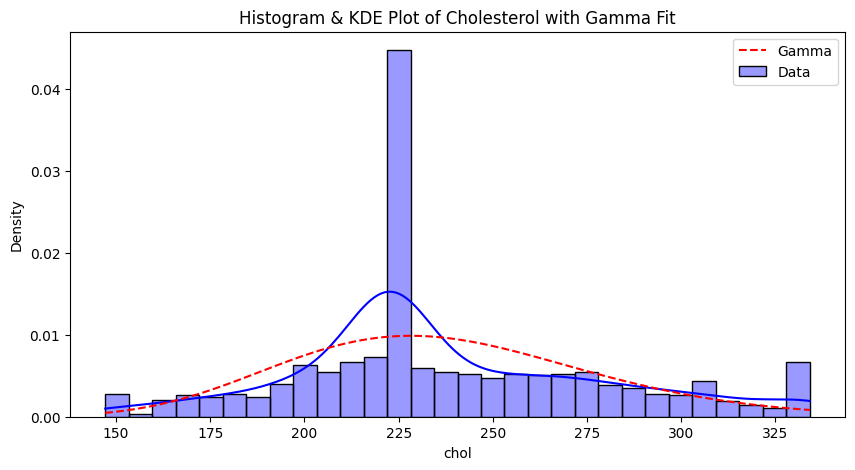

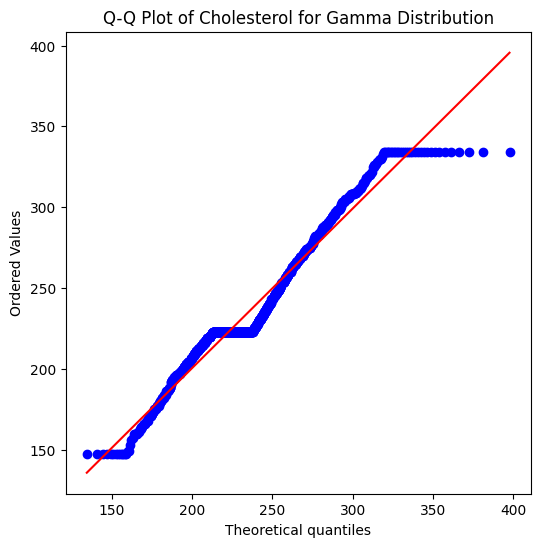

Kolmogorov-Smirnov test for Gamma: p-value = 0.00000


In [195]:
# Dữ liệu Cholesterol
chol_data = data["chol"]

# Fit phân phối Gamma
shape, loc, scale = stats.gamma.fit(chol_data)

# Vẽ Histogram & KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(chol_data, bins=30, kde=True, stat="density", color="blue", alpha=0.4, label="Data")

# Vẽ đường phân phối Gamma
x = np.linspace(min(chol_data), max(chol_data), 100)
plt.plot(x, stats.gamma.pdf(x, shape, loc, scale), "r--", label="Gamma")

plt.title("Histogram & KDE Plot of Cholesterol with Gamma Fit")
plt.legend()
plt.show()

# Vẽ Q-Q Plot cho Gamma
plt.figure(figsize=(6, 6))
stats.probplot(chol_data, dist=stats.gamma, sparams=(shape, loc, scale), plot=plt)
plt.title("Q-Q Plot of Cholesterol for Gamma Distribution")
plt.show()

# Kiểm tra Kolmogorov-Smirnov Test
ks_test = stats.kstest(chol_data, "gamma", args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test for Gamma: p-value = {ks_test.pvalue:.5f}")


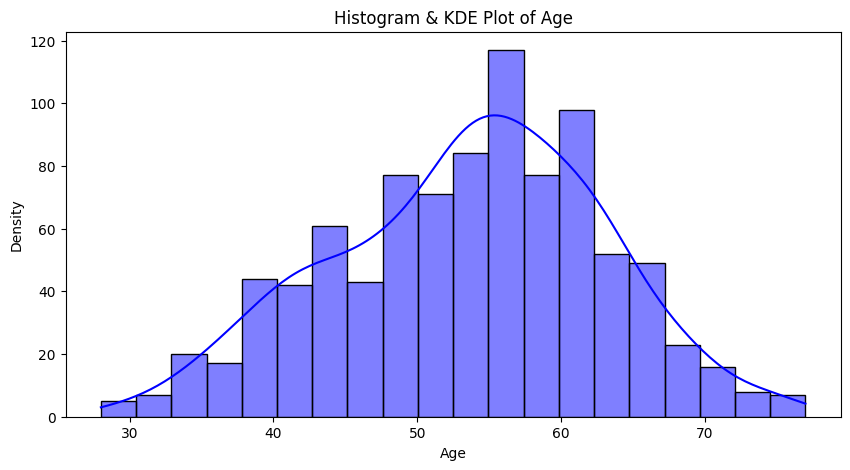

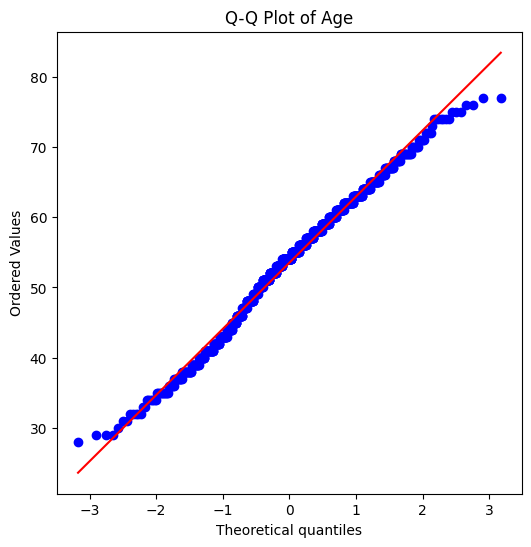

Shapiro-Wilk test for Normal: p-value = 0.00002
Kolmogorov-Smirnov test for Normal: p-value = 0.00125
Anderson-Darling test for Normal: Statistic = 2.78038
Critical values = [0.574 0.653 0.784 0.914 1.087]
Significance levels = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for Poisson: p-value = 0.00000
Kolmogorov-Smirnov test for Exponential: p-value = 0.00000


In [196]:
# df = pd.read_csv("heart.csv")  # Nếu bạn có file dữ liệu
age_data = data["age"]

# Vẽ Histogram & KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=20, kde=True, color="blue", alpha=0.5)
plt.title("Histogram & KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Vẽ Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(age_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Age")
plt.show()

# Kiểm tra phân phối
# Shapiro-Wilk Test (Kiểm tra phân phối chuẩn)
shapiro_test = stats.shapiro(age_data)
print(f"Shapiro-Wilk test for Normal: p-value = {shapiro_test.pvalue:.5f}")

# Kolmogorov-Smirnov Test (So sánh với phân phối chuẩn)
ks_test = stats.kstest(age_data, "norm", args=(np.mean(age_data), np.std(age_data)))
print(f"Kolmogorov-Smirnov test for Normal: p-value = {ks_test.pvalue:.5f}")

# Anderson-Darling Test (Phân phối chuẩn)
ad_test = stats.anderson(age_data, dist="norm")
print(f"Anderson-Darling test for Normal: Statistic = {ad_test.statistic:.5f}")
print(f"Critical values = {ad_test.critical_values}")
print(f"Significance levels = {ad_test.significance_level}")

# Thử phân phối khác (Poisson, Exponential)
lambda_age = np.mean(age_data)  # Lambda cho Poisson

ks_test_poisson = stats.kstest(age_data, "poisson", args=(lambda_age,))
print(f"Kolmogorov-Smirnov test for Poisson: p-value = {ks_test_poisson.pvalue:.5f}")

ks_test_exp = stats.kstest(age_data, "expon", args=(age_data.min(), np.mean(age_data)))
print(f"Kolmogorov-Smirnov test for Exponential: p-value = {ks_test_exp.pvalue:.5f}")



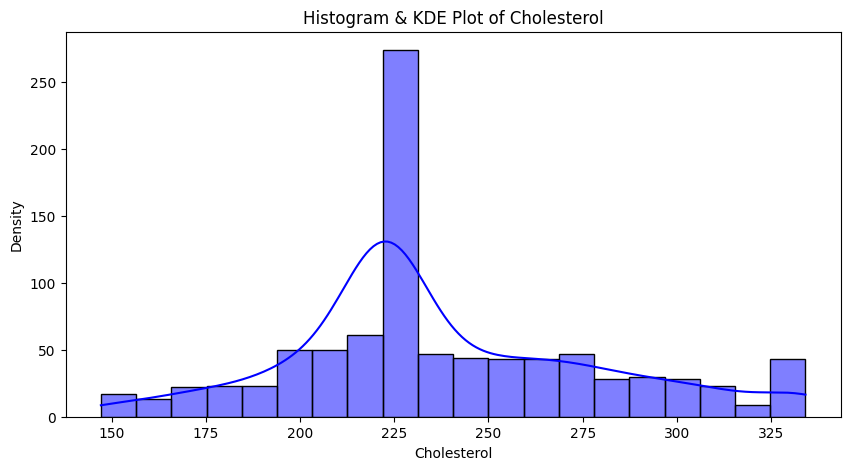

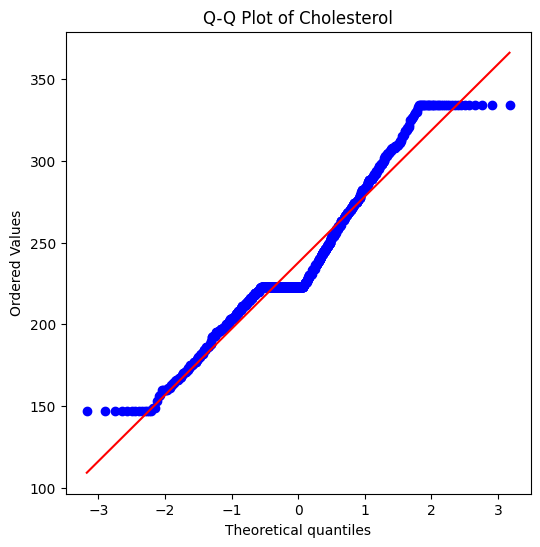

Shapiro-Wilk test for Normal: p-value = 0.00000
Kolmogorov-Smirnov test for Normal: p-value = 0.00000
Anderson-Darling test for Normal: Statistic = 20.72982
Critical values = [0.574 0.653 0.784 0.914 1.087]
Significance levels = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for Poisson: p-value = 0.00000
Kolmogorov-Smirnov test for Exponential: p-value = 0.00000


In [197]:
chol_data = data["chol"]

# Vẽ Histogram & KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(chol_data, bins=20, kde=True, color="blue", alpha=0.5)
plt.title("Histogram & KDE Plot of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.show()

# Vẽ Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(chol_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Cholesterol")
plt.show()

# Kiểm tra phân phối
# Shapiro-Wilk Test (Kiểm tra phân phối chuẩn)
shapiro_test = stats.shapiro(chol_data)
print(f"Shapiro-Wilk test for Normal: p-value = {shapiro_test.pvalue:.5f}")

# Kolmogorov-Smirnov Test (So sánh với phân phối chuẩn)
ks_test = stats.kstest(chol_data, "norm", args=(np.mean(chol_data), np.std(chol_data)))
print(f"Kolmogorov-Smirnov test for Normal: p-value = {ks_test.pvalue:.5f}")

# Anderson-Darling Test (Phân phối chuẩn)
ad_test = stats.anderson(chol_data, dist="norm")
print(f"Anderson-Darling test for Normal: Statistic = {ad_test.statistic:.5f}")
print(f"Critical values = {ad_test.critical_values}")
print(f"Significance levels = {ad_test.significance_level}")

# Thử phân phối khác (Poisson, Exponential)
lambda_age = np.mean(chol_data)  # Lambda cho Poisson

ks_test_poisson = stats.kstest(chol_data, "poisson", args=(lambda_age,))
print(f"Kolmogorov-Smirnov test for Poisson: p-value = {ks_test_poisson.pvalue:.5f}")

ks_test_exp = stats.kstest(chol_data, "expon", args=(chol_data.min(), np.mean(chol_data)))
print(f"Kolmogorov-Smirnov test for Exponential: p-value = {ks_test_exp.pvalue:.5f}")



In [200]:
count1 = 0
count2 = 0
for i in data["num"]:
  if i == 1:
    count1 += 1
  else:
    count2 += 1
print(count1)
print(count2)
print((count2/count1)*100)

508
410
80.70866141732283


### Đưa ra nhận xét về đặc điểm của dữ liệu dựa trên phân phối

#### **Nhận xét về phân phối của biến 'age':**

- **Kiểm định tính chuẩn:**

  - Kiểm định Shapiro-Wilk cho age có p-value ≈ 0.00002, nhỏ hơn rất nhiều so với mức ý nghĩa 0.05.

  - Kiểm định Kolmogorov-Smirnov (so với phân phối chuẩn) cũng có p-value ≈ 0.00125, nhỏ hơn 0.05.

  - Kiểm định Anderson-Darling cho age có giá trị thống kê (Statistic ≈ 2.78) lớn hơn nhiều so với các giá trị tới hạn (critical values) ở tất cả các mức ý nghĩa phổ biến (ví dụ: lớn hơn 0.784 ở mức 5%).

  - => **Kết luận từ kiểm định**: Cả ba kiểm định đều cung cấp bằng chứng rất mạnh mẽ để **bác bỏ giả thuyết rằng biến 'age' tuân theo phân phối chuẩn**.

- **Quan sát biểu đồ:**

  - **Histogram (+KDE)**: Biểu đồ cho thấy phân phối của age có dạng hình chuông, tương đối đối xứng, tập trung quanh độ tuổi 55-60. Tuy nhiên, đường KDE cho thấy đỉnh hơi nhọn và đuôi có vẻ không hoàn toàn khớp với đường cong chuẩn (đường màu đỏ trong biểu đồ "Age Distribution vs Normal").

  - **Q-Q Plot (so với Normal)**: Các điểm dữ liệu bám khá sát đường thẳng màu đỏ ở phần trung tâm, nhưng có xu hướng **lệch lên trên** ở đuôi bên trái (giá trị thấp) và **lệch xuống dưới** ở đuôi bên phải (giá trị cao). Điều này chỉ ra rằng đuôi của phân phối age mỏng hơn (ít giá trị cực đoan hơn) so với phân phối chuẩn lý thuyết.

- **So sánh với phân phối khác (KS-Test):**

  - KS-Test so với Exponential (p ≈ 0.00000), Poisson (p ≈ 0.00000), Gamma (p ≈ 0.00022), Log-Normal (p ≈ 0.00125) đều cho p-value rất nhỏ, cho thấy các phân phối này cũng không phù hợp.

  - KS-Test so với Weibull (p ≈ 0.02511) cũng nhỏ hơn 0.05, cho thấy Weibull cũng không phải là mô hình phù hợp tốt.

- **Nhận xét chung 'age':** Mặc dù có hình dạng gần giống chuông, dữ liệu age không tuân theo phân phối chuẩn chặt chẽ. Các kiểm định thống kê bác bỏ giả thuyết chuẩn và Q-Q plot cho thấy sự sai khác ở hai đuôi. Không có phân phối lý thuyết nào khác trong số các phân phối đã kiểm tra mô tả tốt hơn đáng kể.

#### **Nhận xét về phân phối của biến 'chol':**



- **Kiểm định tính chuẩn:**

  - Kiểm định Shapiro-Wilk cho chol có p-value ≈ 0.00000 (rất nhỏ).

  - Kiểm định Kolmogorov-Smirnov (so với phân phối chuẩn) có p-value ≈ 0.00000.

  - Kiểm định Anderson-Darling cho chol có giá trị thống kê (Statistic ≈ 20.73) cực kỳ lớn so với các giá trị tới hạn.

  - => **Kết luận từ kiểm định**: Cả ba kiểm định đều cung cấp bằng chứng áp đảo để **bác bỏ giả thuyết rằng biến 'chol' tuân theo phân phối chuẩn**.

- **Quan sát biểu đồ:**

  - **Histogram (+KDE)**: Biểu đồ cho thấy phân phối của chol **lệch phải rõ rệt (positively skewed)**. Có một đỉnh nhọn tập trung quanh khoảng 225 mg/dl, sau đó tần suất giảm dần nhưng có một cái đuôi kéo dài về phía các giá trị cholesterol cao (trên 300 mg/dl). Đường cong chuẩn (màu đỏ) hoàn toàn không khớp với hình dạng thực tế của dữ liệu.

  - **Q-Q Plot (so với Normal)**: Các điểm dữ liệu lệch rất xa so với đường thẳng chuẩn. Ở đuôi bên trái, các điểm nằm phía trên đường thẳng, và ở đuôi bên phải, các điểm nằm rất xa phía trên đường thẳng, xác nhận mạnh mẽ tính lệch phải và không chuẩn của dữ liệu.

- **So sánh với phân phối khác:**

  - Biểu đồ "Histogram & KDE Plot of Cholesterol" và các Q-Q plot so sánh với Exponential và Weibull cho thấy các phân phối này cũng không mô tả tốt hình dạng của dữ liệu chol. Đường Exponential đi quá thấp, đường Weibull cũng không khớp.

  - Biểu đồ "Histogram & KDE Plot of Cholesterol with Gamma Fit" và Q-Q plot tương ứng cho thấy phân phối Gamma có vẻ **khớp với phần thân chính của dữ liệu tốt hơn** so với Normal, Exponential hay Weibull, nhưng vẫn có sự sai khác ở đuôi bên phải. Kiểm định KS cho Gamma (p ≈ 0.00000) vẫn bác bỏ sự phù hợp hoàn hảo.

  - Kiểm định KS cho Log-Normal (p ≈ 0.00000) cũng cho thấy sự không phù hợp.

- **Nhận xét chung 'chol'**: Biến chol rõ ràng **không tuân theo phân phối chuẩn** và có dạng **lệch phải**. Trong số các phân phối đã thử nghiệm, **phân phối Gamma** có vẻ mô tả hình dạng dữ liệu tốt hơn một chút so với các phân phối còn lại, nhưng cũng không hoàn hảo. Sự lệch này là đặc điểm thường thấy của dữ liệu cholesterol trong y tế.

#### **Nhận xét**

- Việc cả age và đặc biệt là chol không tuân theo phân phối chuẩn là rất quan trọng. Khi thực hiện các phân tích suy luận liên quan đến các biến này (ví dụ: so sánh trung bình cholesterol giữa các nhóm), cần hết sức cẩn thận với các giả định của kiểm định.

- Ưu tiên sử dụng các kiểm định **phi tham số** (như Mann-Whitney U, Kruskal-Wallis thay cho t-test/ANOVA khi so sánh nhóm; hoặc dùng tương quan Spearman thay vì Pearson) hoặc các phương pháp mạnh mẽ (robust methods) hoặc bootstrap khi làm việc với các biến này để đảm bảo tính hợp lệ của kết quả.

- Đối với mô hình hóa, có thể cần xem xét các phép biến đổi dữ liệu (ví dụ: logarit cho chol) để làm cho phân phối gần với chuẩn hơn nếu mô hình yêu cầu giả định đó.

# 4) Kiểm định giả thuyết

## a. Tìm hiểu và trình bày các kiểm định thống kê: t-test, Chi-square và ANOVA

### t-test

#### Giới thiệu chung

- **T-test là gì?** T-test là một loại kiểm định giả thuyết thống kê suy luận (inferential statistics). Nó được sử dụng để xác định xem liệu có sự khác biệt có ý nghĩa thống kê giữa giá trị trung bình (mean) của hai nhóm hay không, hoặc giữa giá trị trung bình của một nhóm so với một giá trị đã biết (giá trị giả thuyết).

- **Nguồn gốc**: Được phát triển bởi William Sealy Gosset dưới bút danh "Student", nên đôi khi còn được gọi là "Student's t-test".

- **Mục đích chính**: là so sánh giá trị trung bình.

- **Khi nào dùng?** T-test đặc biệt hữu ích khi:

  - Kích thước mẫu nhỏ (thường dưới 30).

  - Độ lệch chuẩn của tổng thể (population standard deviation) không xác định (đây là trường hợp phổ biến trong thực tế). T-test sử dụng độ lệch chuẩn mẫu (sample standard deviation) để ước lượng.

- **Dựa trên phân phối nào?** T-test dựa trên phân phối t (t-distribution), một phân phối xác suất tương tự như phân phối chuẩn nhưng có "đuôi dày hơn", nghĩa là nó có nhiều xác suất hơn ở các giá trị cực trị, đặc biệt là với cỡ mẫu nhỏ. Hình dạng của phân phối t phụ thuộc vào "bậc tự do" (degrees of freedom - df), thường liên quan đến kích thước mẫu. Khi bậc tự do tăng lên (cỡ mẫu lớn hơn), phân phối t tiệm cận với phân phối chuẩn.

#### Các giả định của t-test

Để kết quả của t-test đáng tin cậy, dữ liệu của bạn cần đáp ứng một số giả định:

  1. **Dữ liệu đo lường**: Biến phụ thuộc (biến bạn đang đo lường/so sánh) phải là biến liên tục (định lượng), ví dụ: chiều cao, cân nặng, điểm số, nhiệt độ.

  2. **Mẫu ngẫu nhiên**: Dữ liệu được thu thập từ một mẫu đại diện, được chọn ngẫu nhiên từ tổng thể mà bạn muốn suy luận.

  3. **Tính chuẩn (Normality)**: Dữ liệu trong mỗi nhóm (hoặc sự khác biệt giữa các cặp trong paired t-test) nên tuân theo phân phối xấp xỉ chuẩn. Tuy nhiên, t-test khá "mạnh" (robust) đối với vi phạm giả định này khi cỡ mẫu đủ lớn (ví dụ: n > 30 cho mỗi nhóm) nhờ vào Định lý Giới hạn Trung tâm (Central Limit Theorem). Bạn có thể kiểm tra tính chuẩn bằng biểu đồ (Q-Q plot, histogram) hoặc các kiểm định thống kê (Shapiro-Wilk, Kolmogorov-Smirnov).

  4. **Phương sai đồng nhất (Homogeneity of variances)**: (Chỉ áp dụng cho t-test hai mẫu độc lập). Giả định rằng phương sai (variance) của biến phụ thuộc là bằng nhau giữa hai nhóm được so sánh. Có thể kiểm tra bằng kiểm định Levene. Nếu giả định này bị vi phạm, bạn nên sử dụng một phiên bản của t-test không yêu cầu giả định này (ví dụ: Welch's t-test).

#### Các loại t-test phổ biến

Có ba loại t-test chính:

- **a) T-test một mẫu (One-Sample T-test):**

  - **Mục đích**: So sánh giá trị trung bình của một mẫu duy nhất với một giá trị cụ thể, đã biết trước (thường là giá trị trung bình của tổng thể theo lý thuyết hoặc một tiêu chuẩn).

  - **Câu hỏi ví dụ**: Chiều cao trung bình của học sinh lớp 10 ở trường A có khác biệt đáng kể so với chiều cao trung bình chuẩn quốc gia là 165cm không?

  - **Giả thuyết**:

    - H0 (Null Hypothesis): Trung bình mẫu = Giá trị đã biết (μ = μ₀).

    - H1 (Alternative Hypothesis): Trung bình mẫu ≠ Giá trị đã biết (μ ≠ μ₀) (kiểm định 2 phía), hoặc μ > μ₀, hoặc μ < μ₀ (kiểm định 1 phía).
  
  - **Công thức:** $\Large t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

    - Dùng để so sánh trung bình mẫu $\bar{x}$ với một giá trị trung bình giả thuyết $\mu_0$.

    - Trong đó:

      - $\bar{x}$: là trung bình mẫu.

      - $\mu_0$: là giá trị cần so sánh.

      - s: là độ lệch chuẩn mẫu.

      - n: kích thước mẫu.

- **b) T-test hai mẫu độc lập (Independent Samples T-test / Unpaired T-test):**

  - **Mục đích**: So sánh giá trị trung bình của hai nhóm hoàn toàn độc lập, không liên quan đến nhau. Các đối tượng trong nhóm này không có mặt trong nhóm kia.

  - **Câu hỏi ví dụ**: Điểm thi môn thống kê trung bình của nhóm sinh viên nam có khác biệt so với nhóm sinh viên nữ không? Hoặc, hiệu quả giảm huyết áp trung bình của nhóm dùng thuốc A có khác biệt so với nhóm dùng giả dược (placebo) không?

  - **Giả thuyết:**

    - H0: Trung bình nhóm 1 = Trung bình nhóm 2 (μ₁ = μ₂).

    - H1: Trung bình nhóm 1 ≠ Trung bình nhóm 2 (μ₁ ≠ μ₂) (2 phía), hoặc μ₁ > μ₂, hoặc μ₁ < μ₂ (1 phía).

  - Công thức: $\Large t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

    - Dùng để so sánh trung bình của hai nhóm độc lập ($\bar{x}_1$ và $\bar{x}_2$).

    - Trong đó:

      - $\bar{x}_1$ và $\bar{x}_2$: là trung bình mẫu 1 và 2.

      - $n_1$ và $n_2$: là kích thước mẫu 1 và 2.

      - $s_p$: là độ lệch chuẩn gộp (pooled standard deviation), được tính dựa trên độ lệch chuẩn của từng mẫu ($s_1$ và $s_2$).

- **c) T-test hai mẫu cặp/phụ thuộc (Paired Samples T-test / Dependent T-test)**:

  - **Mục đích**: So sánh giá trị trung bình của cùng một nhóm đối tượng tại hai thời điểm khác nhau (ví dụ: trước và sau can thiệp), hoặc trong hai điều kiện khác nhau, hoặc hai nhóm đối tượng có sự tương ứng tự nhiên (ví dụ: cặp song sinh, vợ chồng). Thực chất, kiểm định này xem xét sự khác biệt trung bình trong từng cặp.

  - **Câu hỏi ví dụ**: Huyết áp trung bình của cùng một nhóm bệnh nhân trước khi dùng thuốc có khác biệt so với sau khi dùng thuốc không? Hoặc, điểm kiểm tra giữa kỳ có khác biệt so với điểm cuối kỳ của cùng một lớp học sinh không?

  - **Giả thuyết:**

    - H0: Trung bình của sự khác biệt giữa các cặp = 0 (μ_diff = 0).

    - H1: Trung bình của sự khác biệt giữa các cặp ≠ 0 (μ_diff ≠ 0) (2 phía), hoặc μ_diff > 0, hoặc μ_diff < 0 (1 phía).

- Công thức: $\Large t = \frac{\bar{d}}{s_d / \sqrt{n}}$

  - Dùng để so sánh trung bình của cùng một nhóm tại hai thời điểm/điều kiện khác nhau, dựa trên sự khác biệt $\bar{d}$ của từng cặp.

  - Trong đó:

    - $\bar{d}$: là trung bình của sự khác biệt giữa các cặp quan sát.

    - $s_d$: là độ lệch chuẩn của các khác biệt đó.

    - n: là số lượng cặp.

#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định giả thuyết không (H0 - không có sự khác biệt) và giả thuyết đối (H1 - có sự khác biệt).

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05 (5%), đây là ngưỡng xác suất sai lầm loại I (bác bỏ H0 khi H0 đúng) mà bạn chấp nhận.

3. **Tính toán giá trị t (t-statistic)**: Công thức tính t-statistic khác nhau tùy loại t-test, nhưng về cơ bản nó đo lường "tín hiệu" (sự khác biệt giữa các trung bình) so với "nhiễu" (độ biến thiên trong dữ liệu / sai số chuẩn của sự khác biệt).

  - Công thức chung có dạng:
  
  t = (Tín hiệu) / (Nhiễu) = (Sự khác biệt giữa các trung bình) / (Sai số chuẩn của sự khác biệt)

4. **Xác định bậc tự do (Degrees of Freedom - df)**: Liên quan đến cỡ mẫu (ví dụ: df = n-1 cho t-test một mẫu, df = n1 + n2 - 2 cho t-test độc lập với phương sai bằng nhau, df = n-1 cho t-test cặp với n là số cặp).

5. **Tìm giá trị p (p-value)**: Dựa trên giá trị t đã tính và bậc tự do, tìm giá trị p tương ứng từ phân phối t. Giá trị p là xác suất quan sát được kết quả như trong mẫu của bạn (hoặc kết quả còn cực đoan hơn) nếu giả thuyết không (H0) là đúng.

6. **Đưa ra quyết định:**

  - Nếu p-value < α: Bác bỏ giả thuyết H0. Có đủ bằng chứng thống kê để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa các giá trị trung bình.

  - Nếu p-value ≥ α: Không đủ bằng chứng để bác bỏ giả thuyết H0. Không thể kết luận có sự khác biệt có ý nghĩa thống kê (lưu ý: điều này không có nghĩa là H0 chắc chắn đúng, chỉ là không đủ bằng chứng để bác bỏ nó).

#### Diễn giải kết quả

- **Giá trị p (p-value)**: Cho biết mức độ ý nghĩa thống kê. p nhỏ (< α) nghĩa là sự khác biệt quan sát được khó có thể xảy ra do ngẫu nhiên nếu không có sự khác biệt thực sự.

- **Giá trị t (t-statistic):**

  - Dấu của t (+ hoặc -) cho biết hướng của sự khác biệt (ví dụ: nhóm nào có trung bình cao hơn).

  - Độ lớn của t (giá trị tuyệt đối |t|) cho biết mức độ khác biệt so với độ biến thiên. Giá trị |t| càng lớn, bằng chứng chống lại H0 càng mạnh.

- **Khoảng tin cậy (Confidence Interval - CI)**: Thường được báo cáo cùng t-test. Ví dụ, khoảng tin cậy 95% cho sự khác biệt trung bình. Nếu khoảng tin cậy này không chứa 0, nó tương đương với việc bác bỏ H0 ở mức α = 0.05 (đối với kiểm định 2 phía). Nó cũng cho biết phạm vi ước lượng về độ lớn thực sự của sự khác biệt.

#### Ví dụ minh họa (T-test hai mẫu độc lập)

Giả sử bạn muốn so sánh hiệu quả của hai phương pháp dạy học (A và B) dựa trên điểm thi cuối kỳ của sinh viên. Bạn chọn ngẫu nhiên 2 nhóm sinh viên, một nhóm học theo phương pháp A (n=25), nhóm kia theo phương pháp B (n=25). Sau kỳ thi, bạn thu được điểm trung bình và độ lệch chuẩn của hai nhóm.

- **H0**: Điểm trung bình của nhóm A bằng điểm trung bình của nhóm B (μ_A = μ_B).

- **H1**: Điểm trung bình của nhóm A khác điểm trung bình của nhóm B (μ_A ≠ μ_B).

- Bạn thực hiện t-test hai mẫu độc lập và thu được kết quả: t = 2.5, df = 48, p = 0.016.

- **Diễn giải**: Vì p = 0.016 < α = 0.05, bạn bác bỏ H0. Kết luận: Có sự khác biệt có ý nghĩa thống kê về điểm thi trung bình giữa sinh viên học theo phương pháp A và phương pháp B. Dấu dương của t (nếu có) có thể cho biết phương pháp nào có điểm trung bình cao hơn.


#### Tổng kết

- T-test là một công cụ mạnh mẽ và linh hoạt trong phân tích thống kê, giúp đưa ra các kết luận dựa trên dữ liệu mẫu về sự khác biệt giữa các nhóm

- Ý nghĩa thống kê (statistical significance) không đồng nghĩa với ý nghĩa thực tiễn (practical significance). Một khác biệt nhỏ có thể có ý nghĩa thống kê nếu cỡ mẫu rất lớn, nhưng lại không quan trọng trong thực tế. Cần xem xét thêm kích thước hiệu ứng (effect size).

### Chi-square

#### Giới thiệu chung

- **Chi-Square Test là gì?** Đây là một nhóm các kiểm định giả thuyết thống kê phi tham số (non-parametric tests). Mục đích chính của nó là kiểm tra xem có sự khác biệt có ý nghĩa thống kê giữa tần số quan sát được (observed frequencies) trong các danh mục của một hoặc nhiều biến phân loại và tần số kỳ vọng (expected frequencies) dựa trên một giả thuyết cụ thể (giả thuyết không H0).

- **Mục đích chính**: So sánh tần số quan sát với tần số kỳ vọng cho dữ liệu phân loại. Nó giúp xác định xem một mô hình phân phối tần số nào đó có phù hợp với dữ liệu mẫu không (Goodness-of-Fit) hoặc liệu có mối liên hệ (association/independence) giữa hai biến phân loại hay không.

- **Khi nào dùng?** Khi làm việc với dữ liệu dạng đếm (counts) hoặc tần số (frequencies) thuộc các danh mục khác nhau. Ví dụ: số lượng người chọn các phương án trả lời khác nhau, số lượng sản phẩm lỗi/không lỗi, phân loại khách hàng theo nhóm tuổi và sở thích sản phẩm.

- **Dựa trên phân phối nào?** Kiểm định này dựa trên phân phối Chi-bình phương (χ² distribution). Đây là một phân phối xác suất liên tục, lệch về bên phải (right-skewed) và chỉ nhận giá trị không âm. Hình dạng của nó phụ thuộc vào "bậc tự do" (degrees of freedom - df).

#### Các giả định của Chi-Square Test

Để kết quả kiểm định đáng tin cậy, cần đảm bảo các giả định sau:

1. **Dữ liệu phân loại (Categorical Data)**: Dữ liệu phải ở dạng tần số hoặc số đếm trong các danh mục rời rạc, loại trừ lẫn nhau.

2. **Độc lập của quan sát (Independence of Observations)**: Các quan sát (ví dụ: các cá nhân được khảo sát) phải độc lập với nhau. Sự lựa chọn hoặc đặc điểm của một cá nhân không ảnh hưởng đến người khác.

3. **Mẫu ngẫu nhiên (Random Sample)**: Dữ liệu nên được thu thập từ một mẫu ngẫu nhiên từ tổng thể quan tâm.

4. **Kích thước tần số kỳ vọng (Expected Cell Frequencies)**: Đây là giả định rất quan trọng. Tần số kỳ vọng (không phải tần số quan sát) trong mỗi ô (category/cell) không nên quá nhỏ. Quy tắc phổ biến là:

  - Tất cả các tần số kỳ vọng (Expected Count - E) phải lớn hơn 0.

  - Ít nhất 80% các ô phải có tần số kỳ vọng ≥ 5.

  - Không có ô nào có tần số kỳ vọng < 1.

  - Nếu giả định này bị vi phạm (đặc biệt trong bảng 2x2), nên sử dụng Kiểm định chính xác của Fisher (Fisher's Exact Test) thay thế. Đối với bảng lớn hơn, có thể cân nhắc gộp các nhóm có tần số kỳ vọng thấp lại (nếu hợp lý về mặt logic).



#### Các loại Chi-Square Test phổ biến

Có hai loại chính thường được sử dụng:

- **a) Kiểm định Chi-bình phương về mức độ phù hợp (Chi-Square Goodness-of-Fit Test):**

  - **Mục đích**: Xác định xem phân phối tần số quan sát của một biến phân loại duy nhất có phù hợp với một phân phối lý thuyết hoặc kỳ vọng cụ thể nào đó hay không.

  - **Câu hỏi ví dụ**: Tỷ lệ các nhóm máu (A, B, AB, O) trong một mẫu dân cư có phù hợp với tỷ lệ lý thuyết đã biết của quốc gia không? Hay một con xúc xắc có cân bằng không (tức là xác suất xuất hiện mỗi mặt có phải là 1/6 không)?

  - **Giả thuyết:**

    - H0: Phân phối tần số quan sát phù hợp với phân phối tần số kỳ vọng.

    - H1: Phân phối tần số quan sát không phù hợp với phân phối tần số kỳ vọng.

- **b) Kiểm định Chi-bình phương về tính độc lập (Chi-Square Test of Independence):**

  - **Mục đích**: Xác định xem có mối liên hệ (association) hay sự phụ thuộc (dependence) giữa hai biến phân loại trong cùng một mẫu hay không. Nó kiểm tra xem việc một đối tượng thuộc vào một danh mục của biến thứ nhất có liên quan đến việc nó thuộc vào một danh mục của biến thứ hai hay không. Dữ liệu thường được trình bày trong một bảng chéo (contingency table).

  - **Câu hỏi ví dụ**: Có mối liên hệ giữa giới tính (Nam/Nữ) và việc lựa chọn chuyên ngành học (Kinh tế/Kỹ thuật/Xã hội) không? Có mối liên hệ giữa tình trạng hút thuốc (Có/Không) và bệnh tim mạch (Có/Không) không?

  - **Giả thuyết:**

    - H0: Hai biến là độc lập (không có mối liên hệ).

    - H1: Hai biến là phụ thuộc (có mối liên hệ).

- **c) Kiểm định Chi-bình phương về tính đồng nhất (Chi-Square Test of Homogeneity):**

  - **Mục đích**: So sánh phân phối của một biến phân loại trên hai hoặc nhiều nhóm (tổng thể) độc lập khác nhau. Nó kiểm tra xem tỷ lệ các danh mục của biến đó có giống nhau (đồng nhất) giữa các nhóm hay không.

  - **Câu hỏi ví dụ**: Tỷ lệ cử tri ủng hộ các ứng viên A, B, C có giống nhau giữa các thành phố khác nhau không? Tỷ lệ bệnh nhân đáp ứng với các phương pháp điều trị khác nhau (A, B, Giả dược) có đồng nhất không?

  - **Giả thuyết:**

    - H0: Phân phối của biến phân loại là đồng nhất (giống nhau) giữa các nhóm.

    - H1: Phân phối của biến phân loại là không đồng nhất (khác nhau) giữa các nhóm.

#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định H0 và H1 phù hợp với loại kiểm định.

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05.

3. **Tính toán tần số kỳ vọng (Expected Frequencies - E):**

  - Goodness-of-Fit: $ \Large E = n * Pᵢ$ (Tổng số quan sát * Tỷ lệ kỳ vọng của danh mục i).

  - Independence/Homogeneity: $ \Large Eᵢⱼ$ = (Tổng hàng i * Tổng cột j) / Tổng chung (cho ô ở hàng i, cột j trong bảng chéo).

4. **Tính toán giá trị thống kê Chi-Square (χ² statistic):**

  - Công thức: $ \Large χ² = Σ [ (O - E)^2 / E ]$

  - Trong đó:

    - O: Tần số quan sát (Observed frequency) trong mỗi ô/danh mục.

    - E: Tần số kỳ vọng (Expected frequency) trong ô/danh mục tương ứng.

  - Giá trị χ² luôn không âm. Giá trị càng lớn, sự khác biệt giữa tần số quan sát và kỳ vọng càng lớn, bằng chứng chống lại H0 càng mạnh.

5. **Xác định bậc tự do (Degrees of Freedom - df):**

  - Goodness-of-Fit: df = k - 1 (với k là số lượng danh mục).

  - Independence/Homogeneity: df = (Số hàng - 1) * (Số cột - 1).

6. **Tìm giá trị p (p-value)**: Dựa trên giá trị χ² đã tính và bậc tự do (df), tìm giá trị p tương ứng từ phân phối Chi-bình phương. Giá trị p là xác suất quan sát được một sự khác biệt giữa O và E lớn như (hoặc lớn hơn) những gì đã thấy trong mẫu, nếu giả thuyết không (H0) là đúng.

7. **Đưa ra quyết định:**

  - Nếu $p-value < α$: Bác bỏ giả thuyết H0. Có đủ bằng chứng thống kê để kết luận rằng có sự khác biệt/mối liên hệ có ý nghĩa.

  - Nếu $p-value ≥ α$: Không đủ bằng chứng để bác bỏ giả thuyết H0.


#### Diễn giải kết quả

- **Giá trị χ²**: Đo lường mức độ khác biệt tổng thể giữa tần số quan sát và tần số kỳ vọng. Giá trị lớn cho thấy sự không phù hợp/liên hệ mạnh mẽ hơn.

- **Giá trị p (p-value)**: Mức ý nghĩa thống kê. p < α cho thấy kết quả khó có thể xảy ra do ngẫu nhiên nếu H0 đúng.

- **Bậc tự do (df)**: Xác định hình dạng cụ thể của phân phối χ² được sử dụng để tính p-value.

- **Phân tích sâu hơn (Post-hoc analysis)**: Nếu bác bỏ H0 trong kiểm định Goodness-of-Fit với nhiều hơn 2 danh mục, hoặc trong kiểm định Independence/Homogeneity với bảng lớn hơn 2x2, bạn chỉ biết rằng có sự khác biệt/liên hệ ở đâu đó. Để xác định danh mục hoặc ô cụ thể nào đóng góp nhiều nhất vào sự khác biệt có ý nghĩa, bạn cần thực hiện phân tích sâu hơn, thường bằng cách:

  - Kiểm tra phần dư chuẩn hóa (standardized residuals) cho từng ô: Giá trị tuyệt đối lớn (thường > 1.96 hoặc > 2) chỉ ra sự khác biệt đáng kể giữa O và E trong ô đó.

  - Phân vùng bảng (partitioning the table): Chia bảng lớn thành các bảng 2x2 nhỏ hơn và thực hiện các kiểm định Chi-bình phương riêng lẻ (cần điều chỉnh mức alpha để tránh lạm phát sai lầm loại I - ví dụ: sử dụng hiệu chỉnh Bonferroni).



Ví dụ minh họa (Kiểm định tính độc lập)

Giả sử bạn khảo sát 200 người về việc họ có thích xem phim hành động không và giới tính của họ.

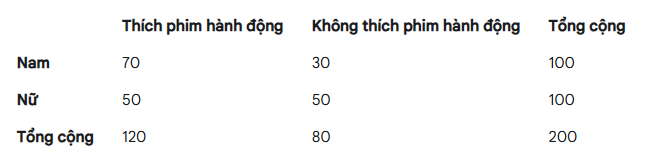

- **H0**: Giới tính và sở thích phim hành động là độc lập (không liên quan).

- **H1**: Giới tính và sở thích phim hành động là phụ thuộc (có liên quan).

- Bạn tính tần số kỳ vọng cho mỗi ô, ví dụ ô (Nam, Thích): $E = (100 * 120) / 200 = 60$.

- Tính giá trị χ² bằng cách cộng $(O-E)^2/E$ cho cả 4 ô. Giả sử bạn tính được χ² = 6.67.

- Tính df = (2-1) * (2-1) = 1.

- Tra bảng hoặc dùng phần mềm, với χ² = 6.67 và df = 1, bạn tìm được p ≈ 0.01.

- **Diễn giải**: Vì p = 0.01 < α = 0.05, bạn bác bỏ H0. Kết luận: Có bằng chứng thống kê cho thấy mối liên hệ có ý nghĩa giữa giới tính và sở thích xem phim hành động trong mẫu khảo sát này. (Nhìn vào dữ liệu, có vẻ nam giới có xu hướng thích phim hành động nhiều hơn nữ giới).

#### Tổng kết

- Kiểm định Chi-bình phương là một công cụ vô cùng hữu ích để phân tích mối quan hệ và sự phù hợp trong dữ liệu phân loại.

- Chi-Square Test chỉ cho biết có mối liên hệ hay không, chứ không cho biết mức độ mạnh yếu của mối liên hệ (cần các thước đo khác như Phi coefficient, Cramer's V) và không suy ra được quan hệ nhân quả.

- Kết quả có thể bị ảnh hưởng bởi cỡ mẫu lớn (dễ dàng tìm thấy p < 0.05 ngay cả với mối liên hệ yếu).

### Phân tích Phương sai - ANOVA (Analysis of Variance)

#### Giới thiệu chung

- **ANOVA là gì?** ANOVA là một tập hợp các mô hình thống kê và quy trình kiểm định giả thuyết được sử dụng để phân tích sự khác biệt giữa giá trị trung bình (means) của ba hoặc nhiều nhóm trở lên.

- **Mục đích chính**: Xác định xem liệu có ít nhất một sự khác biệt có ý nghĩa thống kê giữa giá trị trung bình của các nhóm khác nhau hay không.

- **Tại sao không dùng nhiều t-test?** Nếu bạn có 3 nhóm (A, B, C) và muốn so sánh tất cả các cặp trung bình, bạn sẽ phải thực hiện 3 t-test riêng biệt (A vs B, A vs C, B vs C). Vấn đề là mỗi lần thực hiện t-test, bạn có một xác suất (thường là 5%) mắc sai lầm loại I (bác bỏ H0 khi H0 đúng). Thực hiện nhiều t-test làm tăng đáng kể xác suất mắc ít nhất một sai lầm loại I trong toàn bộ quá trình so sánh (gọi là family-wise error rate). ANOVA giải quyết vấn đề này bằng cách thực hiện một kiểm định tổng thể duy nhất.

- **Logic cốt lõi**: Mặc dù tên là "Phân tích Phương sai", mục tiêu của ANOVA là so sánh trung bình. Nó thực hiện điều này bằng cách phân tích và so sánh các nguồn biến thiên (variance) trong dữ liệu:

  - **Biến thiên giữa các nhóm (Between-group variance)**: Sự khác biệt giữa trung bình của từng nhóm so với trung bình chung của tất cả các nhóm. Nó phản ánh ảnh hưởng của yếu tố phân loại (ví dụ: phương pháp điều trị, nhóm tuổi).

  - **Biến thiên trong mỗi nhóm (Within-group variance)**: Sự biến thiên ngẫu nhiên của các giá trị dữ liệu xung quanh trung bình của chính nhóm đó. Nó phản ánh sai số ngẫu nhiên hoặc sự khác biệt tự nhiên không giải thích được bởi yếu tố phân loại.

  - ANOVA kiểm tra xem liệu biến thiên giữa các nhóm có lớn hơn đáng kể so với biến thiên trong mỗi nhóm hay không. Nếu có, điều đó gợi ý rằng sự khác biệt giữa các trung bình nhóm không chỉ do ngẫu nhiên.

#### Khi nào dùng ANOVA?

Khi bạn muốn so sánh giá trị trung bình của một biến phụ thuộc **liên tục (định lượng)** (ví dụ: điểm số, huyết áp, năng suất) giữa **ba hoặc nhiều nhóm** được xác định bởi một hoặc nhiều biến độc lập **phân loại (định tính)** (còn gọi là yếu tố - factor).

Các giả định của ANOVA

Để kết quả ANOVA đáng tin cậy, dữ liệu cần đáp ứng các giả định sau:

1. **Độc lập của quan sát (Independence of Observations)**: Các quan sát trong mỗi nhóm và giữa các nhóm phải độc lập với nhau. Thiết kế nghiên cứu (ví dụ: phân bổ ngẫu nhiên) thường đảm bảo điều này.

2. **Tính chuẩn (Normality)**: Dữ liệu trong mỗi nhóm (hoặc chính xác hơn là phần dư - residuals của mô hình) nên tuân theo phân phối xấp xỉ chuẩn. ANOVA khá mạnh mẽ (robust) đối với vi phạm giả định này, đặc biệt khi kích thước mẫu trong mỗi nhóm tương đối lớn và bằng nhau. Có thể kiểm tra bằng biểu đồ (Q-Q plot, histogram) hoặc kiểm định (Shapiro-Wilk).

3. **Phương sai đồng nhất (Homogeneity of Variances - Homoscedasticity)**: Phương sai của biến phụ thuộc phải tương tự nhau (đồng nhất) giữa tất cả các nhóm được so sánh. Có thể kiểm tra bằng kiểm định Levene hoặc kiểm định Bartlett. Nếu giả định này bị vi phạm đáng kể, bạn có thể cần sử dụng các phiên bản ANOVA hiệu chỉnh (như Welch's ANOVA) hoặc biến đổi dữ liệu.




Các loại ANOVA phổ biến

Có nhiều loại ANOVA tùy thuộc vào thiết kế nghiên cứu:

- **a) ANOVA một yếu tố (One-Way ANOVA):**

  - **Mục đích**: So sánh giá trị trung bình của một biến phụ thuộc giữa ba hoặc nhiều nhóm được xác định bởi **một biến độc lập (yếu tố) phân loại duy nhất**.

  - **Câu hỏi ví dụ**: Có sự khác biệt về điểm thi trung bình giữa sinh viên sử dụng ba phương pháp học tập khác nhau (A, B, C) không? Năng suất lúa trung bình có khác nhau giữa các loại phân bón khác nhau không?

  - Giả thuyết:

    - H0: Trung bình của tất cả các nhóm là bằng nhau (μ_₁ = μ_₂ = μ_₃ = ... = μ_n).

    - H1: Có ít nhất một trung bình nhóm khác biệt so với các nhóm còn lại (Không phải tất cả các μ đều bằng nhau).

- **b) ANOVA hai yếu tố (Two-Way ANOVA):**

  - **Mục đích**: Kiểm tra ảnh hưởng của **hai biến độc lập (yếu tố) phân loại** lên một biến phụ thuộc liên tục. Nó cho phép xem xét:

    - **Ảnh hưởng chính (Main Effects)**: Ảnh hưởng riêng lẻ của từng yếu tố lên biến phụ thuộc.

    - **Ảnh hưởng tương tác (Interaction Effect)**: Liệu ảnh hưởng của một yếu tố có phụ thuộc vào mức độ của yếu tố kia hay không.
  
  - **Câu hỏi ví dụ**: Năng suất cây trồng bị ảnh hưởng như thế nào bởi cả loại phân bón (A, B) VÀ lượng nước tưới (Cao, Thấp)? Liệu hiệu quả của một loại thuốc (Thuốc, Giả dược) có khác nhau giữa nam và nữ không?

  - **Giả thuyết**: Có các giả thuyết riêng cho từng ảnh hưởng chính và ảnh hưởng tương tác. Ví dụ:

    - H0 (Tương tác): Không có ảnh hưởng tương tác giữa yếu tố 1 và yếu tố 2.

    - H0 (Ảnh hưởng chính Yếu tố 1): Không có sự khác biệt trung bình giữa các mức của yếu tố 1 (bỏ qua yếu tố 2).

    - H0 (Ảnh hưởng chính Yếu tố 2): Không có sự khác biệt trung bình giữa các mức của yếu tố 2 (bỏ qua yếu tố 1).

- **c) ANOVA đo lường lặp lại (Repeated Measures ANOVA):**

  - **Mục đích**: So sánh giá trị trung bình của **cùng một nhóm đối tượng** được đo lường tại **ba hoặc nhiều thời điểm hoặc điều kiện khác nhau**. Nó tương tự như t-test cặp nhưng mở rộng cho nhiều hơn hai phép đo.

  - **Câu hỏi ví dụ**: Mức độ lo âu của bệnh nhân có thay đổi qua các thời điểm (Trước điều trị, 1 tháng sau điều trị, 3 tháng sau điều trị) không? Phản ứng của người tham gia đối với ba loại kích thích khác nhau như thế nào?

  - **Giả thuyết**: Tương tự One-Way ANOVA, nhưng áp dụng cho các phép đo trên cùng đối tượng.

  - Lưu ý: Loại ANOVA này có thêm một giả định gọi là tính cầu (sphericity), liên quan đến phương sai của sự khác biệt giữa các cặp điều kiện. Nếu vi phạm, cần có sự hiệu chỉnh (ví dụ: Greenhouse-Geisser, Huynh-Feldt).

- **d) MANOVA (Multivariate Analysis of Variance):** Khi bạn có nhiều hơn một biến phụ thuộc liên tục.



#### Cách thức hoạt động (Sơ lược)

1. **Phát biểu giả thuyết**: Xác định H0 (tất cả trung bình bằng nhau) và H1 (có ít nhất một trung bình khác).

2. **Chọn mức ý nghĩa (Alpha - α)**: Thường là 0.05.

3. **Phân tách tổng biến thiên**: ANOVA chia tổng biến thiên trong dữ liệu (Total Sum of Squares - SST) thành hai thành phần:

  - Biến thiên giữa các nhóm (Sum of Squares Between - SSB, còn gọi là SSModel hoặc SSTreatment): Đo lường sự khác biệt giữa các trung bình nhóm.

  - Biến thiên trong mỗi nhóm (Sum of Squares Within - SSW, còn gọi là SSError): Đo lường sự biến thiên ngẫu nhiên bên trong từng nhóm.

  - Công thức cơ bản: $\Large SST = SSB + SSW$


4. **Tính toán Trung bình Bình phương (Mean Squares)**: Chia mỗi Sum of Squares cho bậc tự do (degrees of freedom - df) tương ứng để có được ước lượng phương sai:

  - Mean Square Between (MSB) = SSB / df_between (df_between = k - 1, với k là số nhóm)

  - Mean Square Within (MSW) = SSW / df_within (df_within = N - k, với N là tổng số quan sát)

5. Tính toán Thống kê F (F-statistic): Đây là tỷ lệ giữa hai ước lượng phương sai:

  - $ \Large F = MSB / MSW$

  - Nếu H0 đúng (các trung bình bằng nhau), MSB và MSW sẽ xấp xỉ nhau, và F sẽ gần bằng 1.

  - Nếu H1 đúng (có sự khác biệt giữa các trung bình), MSB sẽ lớn hơn MSW, và F sẽ lớn hơn 1 đáng kể.

6. **Tìm giá trị p (p-value)**: Dựa trên giá trị F đã tính và hai bậc tự do (df_between, df_within), tìm giá trị p tương ứng từ phân phối F. Giá trị p là xác suất quan sát được một tỷ lệ F lớn như (hoặc lớn hơn) những gì đã thấy trong mẫu, nếu giả thuyết không (H0) là đúng.

7. **Đưa ra quyết định:**

  - Nếu $p-value < α$: Bác bỏ giả thuyết H0. Kết luận rằng có đủ bằng chứng thống kê cho thấy ít nhất một trung bình nhóm khác biệt đáng kể so với các nhóm khác.

  - Nếu $p-value ≥ α$: Không đủ bằng chứng để bác bỏ giả thuyết H0. Không thể kết luận có sự khác biệt có ý nghĩa thống kê giữa các trung bình nhóm.


Diễn giải kết quả và Phân tích sâu hơn (Post-Hoc Tests)

- **Kết quả ANOVA:**

  - **F-statistic**: Giá trị tính được từ tỷ lệ MSB/MSW.

  - **p-value**: Mức ý nghĩa của kiểm định F.

- **Nếu kết quả ANOVA có ý nghĩa (p < α)**: Bạn biết rằng có sự khác biệt giữa các trung bình, nhưng ANOVA không cho bạn biết cụ thể những nhóm nào khác biệt với nhau. Để xác định điều này, bạn cần thực hiện **Kiểm định Hậu nghiệm (Post-Hoc Tests)**.

- **Kiểm định Hậu nghiệm (Post-Hoc Tests)**: Đây là các kiểm định so sánh cặp (pairwise comparisons) giữa tất cả các trung bình nhóm (hoặc các nhóm cụ thể bạn quan tâm) được thực hiện sau khi có kết quả ANOVA tổng thể có ý nghĩa. Các kiểm định này điều chỉnh mức alpha để kiểm soát tỷ lệ sai lầm loại I gia tăng do thực hiện nhiều phép so sánh.

  - **Một số Post-Hoc Tests phổ biến:**

    - **Tukey's HSD (Honestly Significant Difference)**: Thường dùng khi kích thước mẫu các nhóm bằng nhau và phương sai đồng nhất. Tốt cho việc so sánh tất cả các cặp trung bình.

    - **Bonferroni**: Rất thận trọng (conservative), dễ dẫn đến không phát hiện sự khác biệt thực (sai lầm loại II). Đơn giản: chia alpha ban đầu cho số lượng phép so sánh.

    - **Scheffé**: Rất thận trọng, linh hoạt cho các so sánh phức tạp hơn là chỉ so sánh cặp.

    - **Dunnett**: Dùng khi bạn muốn so sánh tất cả các nhóm điều trị với một nhóm đối chứng (control group) duy nhất.

    - **Games-Howell**: Thường được khuyên dùng khi giả định phương sai đồng nhất bị vi phạm.

#### Kích thước ảnh hưởng (Effect Size)

- Ngoài ý nghĩa thống kê (p-value), điều quan trọng là phải báo cáo **kích thước ảnh hưởng** để đánh giá ý nghĩa thực tiễn của sự khác biệt.

- Trong ANOVA, thước đo kích thước ảnh hưởng phổ biến là **Eta-squared (η²)** hoặc **Partial Eta-squared (η²p)**. Nó biểu thị tỷ lệ phần trăm phương sai trong biến phụ thuộc có thể được giải thích bởi biến độc lập (yếu tố).

#### Ví dụ minh họa (One-Way ANOVA)

Một nhà nghiên cứu muốn xem liệu ba loại chương trình luyện tập (A, B, C) có hiệu quả giảm cân khác nhau sau 1 tháng hay không. Họ chọn ngẫu nhiên 30 người và chia đều vào 3 chương trình (10 người/chương trình).

- **H0**: Mức giảm cân trung bình là như nhau cho cả ba chương trình (μ_A = μ_B = μ_C).

- **H1**: Có ít nhất một chương trình có mức giảm cân trung bình khác biệt.

- Thực hiện One-Way ANOVA, kết quả: F(2, 27) = 5.80, p = 0.008.

- **Diễn giải ANOVA**: Vì p = 0.008 < α = 0.05, bác bỏ H0. Kết luận: Có sự khác biệt có ý nghĩa thống kê về mức giảm cân trung bình giữa ít nhất hai trong ba chương trình luyện tập.

- **Thực hiện Post-Hoc Test (ví dụ: Tukey's HSD)**: Kết quả cho thấy chương trình A có mức giảm cân trung bình cao hơn đáng kể so với chương trình C (p < 0.05), và chương trình B cũng cao hơn đáng kể so với chương trình C (p < 0.05), nhưng không có sự khác biệt đáng kể giữa chương trình A và B (p > 0.05).

#### Tổng kết

- ANOVA là một công cụ cực kỳ linh hoạt và được sử dụng rộng rãi trong nhiều lĩnh vực để so sánh hiệu quả của các can thiệp, sự khác biệt giữa các nhóm, hoặc ảnh hưởng của các yếu tố khác nhau lên một kết quả đo lường.

- Một kết quả ANOVA có ý nghĩa không tự động chỉ ra mối quan hệ nhân quả, trừ khi nghiên cứu được thiết kế như một thí nghiệm ngẫu nhiên có kiểm soát.



## b. Đề xuất câu hỏi nghiên cứu và áp dụng kiểm định thống kê

#### Dataset ngoài

1. **Xác định các biến liên quan:**

  - **Biến 1**: sex - Giới tính của bệnh nhân. Đây là biến phân loại nhị phân (0 = Nữ, 1 = Nam).

  - **Biến 2**: num - Tình trạng bệnh động mạch vành được chẩn đoán qua chụp mạch. Theo mô tả của UCI, đây cũng là biến phân loại nhị phân (0 = Hẹp dưới 50% đường kính động mạch, được coi là không có bệnh đáng kể; 1 = Hẹp trên 50% đường kính động mạch, được coi là có bệnh).

2. **Đề xuất câu hỏi nghiên cứu:**

    **"Liệu có mối liên hệ có ý nghĩa thống kê giữa giới tính (sex) và sự hiện diện của bệnh động mạch vành đáng kể (num = 1) trong mẫu bệnh nhân này không?"**

3. **Lựa chọn kiểm định thống kê phù hợp:**

  Vì chúng ta muốn kiểm tra mối liên hệ (tính độc lập) giữa hai biến phân loại (sex và num), kiểm định phù hợp nhất là **Kiểm định Chi-Square về tính độc lập (Chi-Square Test of Independence)**.

4. **Phát biểu giả thuyết**:

  - **Giả thuyết không (H0)**: Giới tính và sự hiện diện của bệnh động mạch vành đáng kể (num) là **độc lập** với nhau. Tỷ lệ bệnh nhân có num = 1 là như nhau ở cả nam và nữ.

  - **Giả thuyết đối (H1)**: Giới tính và sự hiện diện của bệnh động mạch vành đáng kể (num) là **không độc lập** (tức là có mối liên hệ hoặc phụ thuộc). Tỷ lệ bệnh nhân có num = 1 khác nhau giữa nam và nữ.

5. **Thực hiện kiểm định thống kê:**

  - **Bước 1: Lập bảng chéo (Contingency Table)**: Chúng ta cần tạo một bảng tần số 2x2 thể hiện số lượng bệnh nhân cho mỗi sự kết hợp giữa sex và num từ bộ dữ liệu của bạn. Ví dụ (sử dụng số liệu giả định dựa trên phiên bản Cleveland phổ biến với 303 mẫu):

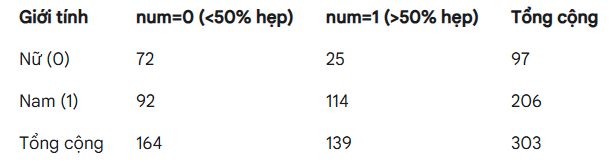

  - **Bước 2: Kiểm tra giả định của Kiểm định Chi-Square:** Tính tần số kỳ vọng (Expected Frequencies) cho mỗi ô:

    - E (Nữ, num=0) = (97 * 164) / 303 ≈ 52.4

    - E (Nữ, num=1) = (97 * 139) / 303 ≈ 44.6

    - E (Nam, num=0) = (206 * 164) / 303 ≈ 111.6

    - E (Nam, num=1) = (206 * 139) / 303 ≈ 94.4

    Tất cả các tần số kỳ vọng đều lớn hơn 5, do đó giả định của kiểm định Chi-Square được đáp ứng.
  
  - **Bước 3: Tính toán giá trị thống kê Chi-Square (χ²):**

  Giá trị χ² đo lường mức độ khác biệt tổng thể giữa tần số quan sát (O) và tần số kỳ vọng (E). Nó được tính bằng cách lấy tổng của bình phương sự khác biệt giữa O và E, chia cho E, cho tất cả các ô trong bảng: $χ² = Σ [ (O - E)^2 / E ]$

  Tính toán cho từng ô:

    - Ô (Nữ, num=0): (72 - 52.41)² / 52.41 ≈ (19.59)² / 52.41 ≈ 383.77 / 52.41 ≈ 7.32

    - Ô (Nữ, num=1): (25 - 44.59)² / 44.59 ≈ (-19.59)² / 44.59 ≈ 383.77 / 44.59 ≈ 8.61

    - Ô (Nam, num=0): (92 - 111.59)² / 111.59 ≈ (-19.59)² / 111.59 ≈ 383.77 / 111.59 ≈ 3.44

    - Ô (Nam, num=1): (114 - 94.41)² / 94.41 ≈ (19.59)² / 94.41 ≈ 383.77 / 94.41 ≈ 4.06

  Cộng các giá trị này lại:  χ² = 7.32 + 8.61 + 3.44 + 4.06 = 23.43

  Giá trị χ² tính được (từ phần mềm) ≈ 22.69

    *Chúng ta sẽ tiếp tục sử dụng giá trị 22.69 từ phần mềm để nhất quán*

  - **Bước 4: Xác định Bậc tự do (Degrees of Freedom - df):**

    Bậc tự do cho kiểm định Chi-bình phương về tính độc lập được tính dựa trên kích thước của bảng chéo: df = (Số hàng - 1) * (Số cột - 1)

    Trong trường hợp này (bảng 2x2): df = (2 - 1) * (2 - 1) = 1 * 1 = 1

  - **Bước 5: Xác định Giá trị p (p-value):**

  Giá trị p là xác suất nhận được một giá trị thống kê χ² lớn bằng hoặc lớn hơn giá trị chúng ta đã tính được (χ² ≈ 22.69), giả sử rằng giả thuyết không (H0) là đúng (tức là không có mối liên hệ thực sự giữa sex và num trong tổng thể).

  Giá trị này được tìm bằng cách sử dụng phân phối Chi-bình phương với bậc tự do tương ứng (df=1). Cụ thể, nó là diện tích vùng nằm dưới đường cong phân phối χ²(df=1) từ giá trị 22.69 trở đi về phía đuôi bên phải.
  Sử dụng hàm trong phần mềm thống kê (hoặc tra bảng), với χ² ≈ 22.69 và df = 1, ta thu được:
  p-value ≈ 1.90 x 10⁻⁶ (một số rất nhỏ, gần bằng 0).



#### Dataset hiện tại

In [201]:
# --- 4b. Áp dụng Kiểm định Chi-Square thực tế (sex vs num) trên dataset đang làm ---
print("\n" + "="*60)
print("4b. Áp dụng Kiểm định Chi-Square (sex vs num)")
print("="*60)

from scipy.stats import chi2_contingency # Import hàm cần thiết
import pandas as pd                     # Import pandas
import numpy as np                      # Import numpy
from typing import Tuple, Optional       # Import kiểu dữ liệu

# Giả sử 'data' là DataFrame cuối cùng đã xử lý
variable1: str = 'sex'    # Biến phân loại thứ nhất
variable2: str = 'num'    # Biến phân loại thứ hai

print(f"Kiểm định mối liên hệ giữa '{variable1}' và '{variable2}'.")
print("Câu hỏi: Liệu giới tính có liên quan đến tình trạng bệnh tim không?")
print("H0: Giới tính và tình trạng bệnh là độc lập.")
print("H1: Giới tính và tình trạng bệnh là không độc lập (có liên hệ).")

# Khởi tạo biến kết quả để xử lý lỗi tiềm ẩn
chi2_stat_real: Optional[float] = None
p_value_real: Optional[float] = None
dof_real: Optional[int] = None
expected_freq_real: Optional[np.ndarray] = None

try:
    # Tạo bảng chéo (Contingency Table) từ dữ liệu thực tế
    # Đảm bảo các cột có kiểu dữ liệu phù hợp (category hoặc object)
    contingency_table_real: pd.DataFrame = pd.crosstab(data[variable1], data[variable2])
    print("\nBảng chéo thực tế (Tần số quan sát O):")
    print(contingency_table_real)

    # Thực hiện kiểm định Chi-bình phương
    # Hàm trả về: chi2_stat, p_value, degrees_of_freedom, expected_frequencies
    chi2_result_tuple: Tuple[float, float, int, np.ndarray] = chi2_contingency(contingency_table_real)
    chi2_stat_real = chi2_result_tuple[0]
    p_value_real = chi2_result_tuple[1]
    dof_real = chi2_result_tuple[2]
    expected_freq_real = chi2_result_tuple[3]

    # In kết quả chính
    print(f"\nKết quả Kiểm định Chi-Square thực tế:")
    print(f"- Giá trị thống kê Chi-bình phương (χ²): {chi2_stat_real:.4f}")
    print(f"- Bậc tự do (df): {dof_real}")
    print(f"- Giá trị p (p-value): {p_value_real:.4e}") # Dùng scientific notation cho số rất nhỏ

    # In bảng tần số kỳ vọng (E)
    print("\nBảng tần số kỳ vọng (E):")
    # Tạo DataFrame từ mảng numpy để dễ đọc, dùng index/columns từ bảng gốc
    expected_df = pd.DataFrame(expected_freq_real,
                               index=contingency_table_real.index,
                               columns=contingency_table_real.columns)
    print(expected_df.round(2)) # Làm tròn 2 chữ số

    # Kiểm tra giả định về tần số kỳ vọng
    min_expected_freq: float = expected_freq_real.min()
    print(f"\nTần số kỳ vọng nhỏ nhất: {min_expected_freq:.2f}")
    if min_expected_freq < 5:
        # Tính tỷ lệ ô có tần số kỳ vọng thấp (nếu cần)
        num_cells: int = expected_freq_real.size
        percent_low_expected: float = (expected_freq_real < 5).sum() / num_cells * 100
        print(f"CẢNH BÁO: {percent_low_expected:.1f}% số ô có tần số kỳ vọng < 5.")
        print("  -> Kết quả Chi-Square có thể không đáng tin cậy.")
        # Kiểm tra nếu là bảng 2x2 thì đề xuất Fisher's Exact Test
        if contingency_table_real.shape == (2, 2):
            from scipy.stats import fisher_exact # Import tại chỗ nếu cần
            # fisher_exact trả về odds_ratio và p_value
            oddsr, p_fisher = fisher_exact(contingency_table_real)
            print(f"  -> Do là bảng 2x2, có thể xem xét Fisher's Exact Test: p-value = {p_fisher:.4e}")
    else:
        # Thông báo giả định được đáp ứng
        print("- Giả định về tần số kỳ vọng (tất cả >= 5) được đáp ứng.")

except KeyError as e:
    print(f"** Lỗi: Không tìm thấy cột '{e}' trong DataFrame. Kiểm tra lại tên cột. **")
except ValueError as e:
     print(f"** Lỗi ValueError khi thực hiện Chi-Square: {e}. Kiểm tra dữ liệu đầu vào. **")
except Exception as e: # Bắt các lỗi chung khác
    print(f"** Lỗi không xác định khi thực hiện Chi-Square: {e} **")


4b. Áp dụng Kiểm định Chi-Square (sex vs num)
Kiểm định mối liên hệ giữa 'sex' và 'num'.
Câu hỏi: Liệu giới tính có liên quan đến tình trạng bệnh tim không?
H0: Giới tính và tình trạng bệnh là độc lập.
H1: Giới tính và tình trạng bệnh là không độc lập (có liên hệ).

Bảng chéo thực tế (Tần số quan sát O):
num    0    1
sex          
0.0  143   50
1.0  267  458

Kết quả Kiểm định Chi-Square thực tế:
- Giá trị thống kê Chi-bình phương (χ²): 84.1451
- Bậc tự do (df): 1
- Giá trị p (p-value): 4.5976e-20

Bảng tần số kỳ vọng (E):
num      0      1
sex              
0.0   86.2  106.8
1.0  323.8  401.2

Tần số kỳ vọng nhỏ nhất: 86.20
- Giả định về tần số kỳ vọng (tất cả >= 5) được đáp ứng.


## c. Giải thích kết quả kiểm định

#### Dataset ngoài

1. **Ngưỡng quyết định - Mức ý nghĩa (Alpha - α):**

Chúng ta đã chọn trước mức ý nghĩa α = 0.05. Đây là mức xác suất tối đa mà chúng ta chấp nhận mắc phải sai lầm loại I (bác bỏ H0 khi H0 thực sự đúng).

2. **Đánh giá bằng chứng - Giá trị p (p-value)**:

  - Giá trị p thu được là khoảng 1.90 x 10⁻⁶ (hay 0.0000019).

  - **Ý nghĩa**: Con số này cực kỳ nhỏ. Nó có nghĩa là: Nếu thực sự không có mối liên hệ nào giữa giới tính và bệnh tim trong tổng thể (H0 đúng), thì xác suất để chúng ta tình cờ quan sát thấy một sự khác biệt về tỷ lệ bệnh giữa nam và nữ lớn như (hoặc lớn hơn) những gì chúng ta thấy trong mẫu 303 người này chỉ là khoảng 0.00019%.

  - Vì xác suất này thấp một cách đáng kinh ngạc (thấp hơn nhiều so với ngưỡng 5% mà chúng ta đặt ra), chúng ta có lý do mạnh mẽ để nghi ngờ tính đúng đắn của giả thuyết H0.

3. **So sánh và Quyết định thống kê:**

  - Chúng ta so sánh p-value với α: p ≈ 1.90 x 10⁻⁶ < 0.05.

  - Vì p-value nhỏ hơn mức ý nghĩa alpha, chúng ta **bác bỏ giả thuyết không (H0)**.

4. **Diễn giải giá trị Chi-bình phương (χ²) và Bậc tự do (df):**

  - Giá trị **χ² ≈ 22.69** là thước đo định lượng về sự khác biệt giữa dữ liệu quan sát thực tế trong bảng chéo và dữ liệu kỳ vọng nếu không có mối liên hệ. Giá trị càng lớn, sự khác biệt càng rõ rệt. Đối với **df = 1** (xác định hình dạng cụ thể của phân phối Chi-bình phương chuẩn để so sánh), giá trị 22.69 được coi là rất lớn, cho thấy sự khác biệt mạnh mẽ.

5. **Kết luận dựa trên câu hỏi nghiên cứu:**

  Việc bác bỏ H0 cho phép chúng ta đưa ra kết luận dựa trên giả thuyết đối (H1):

  **Có bằng chứng thống kê rất mạnh mẽ để kết luận rằng tồn tại một mối liên hệ có ý nghĩa (không độc lập) giữa giới tính (sex) và sự hiện diện của bệnh động mạch vành đáng kể (num = 1) trong quần thể mà mẫu này đại diện.**

6. Phân tích bản chất và ý nghĩa của mối liên hệ:

  - Kết luận trên chỉ nói rằng có mối liên hệ. Để hiểu rõ hơn, ta quay lại phân tích tỷ lệ phần trăm từ bảng chéo:

    - **Tỷ lệ Nữ giới** có bệnh (num=1): ≈ 25.8%

    - **Tỷ lệ Nam giới** có bệnh (num=1): ≈ 55.3%

  - **Diễn giải**: Tỷ lệ nam giới mắc bệnh động mạch vành đáng kể cao hơn rõ rệt (hơn gấp đôi) so với nữ giới trong mẫu này. Sự chênh lệch lớn về tỷ lệ này (55.3% so với 25.8%) chính là điều dẫn đến giá trị χ² lớn và p-value rất nhỏ

  - **Ý nghĩa thực tiễn**: Sự khác biệt này không chỉ có ý nghĩa về mặt thống kê mà còn rất có thể có ý nghĩa trên phương diện lâm sàng. Nó nhấn mạnh rằng giới tính dường như là một yếu tố liên quan quan trọng đến nguy cơ mắc bệnh động mạch vành, với nam giới có nguy cơ cao hơn trong nhóm bệnh nhân này. Điều này phù hợp với nhiều nghiên cứu dịch tễ học khác. Tuy nhiên, cần lưu ý rằng đây là mối liên hệ quan sát được, không nhất thiết là quan hệ nhân quả trực tiếp, và nhiều yếu tố nguy cơ khác (tuổi tác, hút thuốc, cholesterol, v.v.) cũng đóng vai trò quan trọng.



#### Dataset hiện tại

1. **Ngưỡng quyết định - Mức ý nghĩa (Alpha - α):**

  - Chúng ta đã chọn trước mức ý nghĩa α = 0.05. Đây là mức xác suất tối đa mà chúng ta chấp nhận mắc phải sai lầm loại I (bác bỏ H0 khi H0 thực sự đúng).

2. **Đánh giá bằng chứng - Giá trị p (p-value):**

  - Giá trị p thu được từ kiểm định Chi-square trên dữ liệu thực tế (918 mẫu) là khoảng **4.60 x 10⁻²⁰** (hay 0.000...046 với 19 số 0 sau dấu phẩy).

  - **Ý nghĩa**: Con số này là **cực kỳ nhỏ, gần như bằng không**. Nó có nghĩa là: Nếu thực sự không có mối liên hệ nào giữa giới tính và bệnh tim trong tổng thể (H0 đúng), thì xác suất để chúng ta tình cờ quan sát thấy một sự khác biệt về tỷ lệ bệnh giữa nam và nữ lớn như (hoặc lớn hơn) những gì chúng ta thấy trong mẫu 918 người này là **gần như không thể (infinitesimally small)**.

  - Vì xác suất này cực kỳ thấp (thấp hơn rất nhiều so với ngưỡng 5%), chúng ta có bằng chứng **rất mạnh mẽ** để bác bỏ giả thuyết H0.

3. **So sánh và Quyết định thống kê:**

  - Chúng ta so sánh p-value thực tế với α: p ≈ 4.60 x 10⁻²⁰ << 0.05.

  - Vì p-value nhỏ hơn rất nhiều so với mức ý nghĩa alpha, chúng ta **bác bỏ giả thuyết không (H0)**.

4. **Diễn giải giá trị Chi-bình phương (χ²) và Bậc tự do (df):**

  - Giá trị **χ² ≈ 84.15** là thước đo định lượng về sự khác biệt giữa tần số quan sát thực tế trong bảng chéo (Nam/Nữ vs Có/Không bệnh) và tần số kỳ vọng nếu không có mối liên hệ.

  - Giá trị này **rất lớn** đối với bậc tự do **df = 1**. Giá trị χ² càng lớn, bằng chứng chống lại H0 (tính độc lập) càng mạnh. Giá trị 84.15 cho thấy một sự khác biệt rất rõ rệt và có ý nghĩa cao giữa tần số quan sát và kỳ vọng.

5. **Kết luận dựa trên câu hỏi nghiên cứu:**

  - Việc bác bỏ H0 một cách mạnh mẽ cho phép chúng ta đưa ra kết luận dựa trên giả thuyết đối (H1):

  - **Có bằng chứng thống kê cực kỳ mạnh mẽ (p < 0.001) để kết luận rằng tồn tại một mối liên hệ có ý nghĩa (không độc lập) giữa giới tính (sex) và sự hiện diện của bệnh động mạch vành đáng kể (num = 1) trong mẫu 918 bệnh nhân này.**

6. **Phân tích bản chất và ý nghĩa của mối liên hệ:**

  - Kết luận trên xác nhận có mối liên hệ. Để hiểu rõ hơn về bản chất và ý nghĩa thực tiễn, chúng ta xem xét tỷ lệ phần trăm từ bảng chéo thực tế (O):

    - Số Nữ (sex=0): 143 không bệnh + 50 có bệnh = 193 người

    - Số Nam (sex=1): 267 không bệnh + 458 có bệnh = 725 người

    - **Tỷ lệ Nữ giới** có bệnh (num=1): (50 / 193) * 100% ≈ **25.9%**.

    - **Tỷ lệ Nam giới** có bệnh (num=1): (458 / 725) * 100% ≈ **63.2%**.

  - **Diễn giải**: Tỷ lệ nam giới mắc bệnh động mạch vành đáng kể trong mẫu này (khoảng 63.2%) cao hơn rất nhiều (gần gấp 2.5 lần) so với tỷ lệ ở nữ giới (khoảng 25.9%). Sự chênh lệch lớn về tỷ lệ này chính là nguyên nhân dẫn đến giá trị χ² rất lớn và p-value cực kỳ nhỏ.

  - **Ý nghĩa thực tiễn**: Sự khác biệt rất rõ ràng này có ý nghĩa lâm sàng quan trọng. Nó tái khẳng định giới tính là một yếu tố nguy cơ đáng kể cần được xem xét trong đánh giá bệnh tim mạch. Kết quả này (tỷ lệ nam mắc bệnh cao hơn nhiều) rất phù hợp với các nghiên cứu dịch tễ học lớn. Tuy nhiên, vẫn cần nhớ đây là mối liên hệ và các yếu tố khác cũng đóng vai trò quan trọng trong nguy cơ mắc bệnh tổng thể.

# 5) Phân tích tương quan giữa các biến

## a. Tìm hiểu và Trình bày Hệ số tương quan Spearman (ρ hoặc rs)

**1. Mục đích:**

Hệ số tương quan Spearman (Spearman rank correlation), thường được ký hiệu **ρ** hay $r_s$, đo lường mức độ mạnh yếu và chiều hướng của mối quan hệ **đơn điệu** giữa hai biến số. Nó cho biết liệu khi giá trị của một biến tăng lên, giá trị của biến kia có xu hướng chung là tăng lên (tương quan dương) hay giảm xuống (tương quan âm) hay không, bất kể mối quan hệ đó có phải là đường thẳng hay không.

**2. Nguyên tắc hoạt động:**

Spearman không sử dụng giá trị gốc của dữ liệu. Thay vào đó, nó thực hiện các bước sau:

  - Với mỗi biến, nó xếp hạng tất cả các quan sát từ nhỏ nhất đến lớn nhất. Các giá trị trùng nhau sẽ được gán thứ hạng trung bình.

  - Sau khi có được hai bộ thứ hạng (một cho mỗi biến), nó tính hệ số tương quan Pearson trên các cặp thứ hạng này.

**3. Công thức tính hệ số tương quan Spearman**:

  $\Large r_s = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)} \in [-1,1]$

  Trong đó:

    - $d_i = rank(x_i) - rank(y_i)$ là độ lệch giữa 2 thứ hạng tương ứng với mỗi quan sát của 2 biến X,Y

    - $n$ là tổng số quan sát của 2 biến X,Y

**4. Giả định**

  - Các biến ít nhất phải ở thang đo thứ bậc (ordinal).

  - Mối quan hệ giữa hai biến là đơn điệu (monotonic).

**5. Phạm vi và Diễn giải:**

  - **Phạm vi**: -1 đến +1.

  - **Diễn giải:**

    - ρ = +1: Mối quan hệ đơn điệu dương hoàn hảo (Khi X tăng hạng, Y cũng luôn tăng hạng).

    - ρ = -1: Mối quan hệ đơn điệu âm hoàn hảo (Khi X tăng hạng, Y cũng luôn giảm hạng).

    - ρ = 0: Không có mối quan hệ đơn điệu nào.

    - **Độ lớn của |ρ| (giá trị tuyệt đối)**: Cho biết sức mạnh của mối quan hệ đơn điệu. Các ngưỡng phổ biến (chỉ mang tính tham khảo, có thể thay đổi tùy lĩnh vực):

      - 0.00 - 0.19: Rất yếu

      - 0.20 - 0.39: Yếu

      - 0.40 - 0.59: Trung bình

      - 0.60 - 0.79: Mạnh

      - 0.80 - 1.00: Rất mạnh

    - **Dấu (+ hoặc -)**: Cho biết chiều hướng (đồng biến hay nghịch biến).

## b. Áp dụng tính hệ số tương quan Pearson hoặc Spearman giữa các biến số

In [202]:
# Trước khi tính tương quan, đảm bảo các cột 'category' đã được xử lý
# hoặc chuyển đổi về dạng số nếu cần thiết cho hàm .corr().
# Đoạn code trước đó đã chuyển các cột về dạng số hoặc category.
# Để dùng .corr(), các cột category cần có mã số (numeric codes).
# Chúng ta sẽ chuyển đổi chúng để đảm bảo tính toán được.
data_for_corr = data.copy() # Tạo bản sao để tránh thay đổi data gốc nếu không muốn
categorical_cols_for_corr = data_for_corr.select_dtypes(include=['category']).columns
for col in categorical_cols_for_corr:
    # Lấy mã số tương ứng với các category
    # Lưu ý: Điều này giả định thứ tự category có ý nghĩa hoặc chỉ đơn giản là mã hóa
    data_for_corr[col] = data_for_corr[col].cat.codes

# Tính ma trận tương quan Spearman
# Hàm corr() sẽ tự động bỏ qua các giá trị không phải số nếu có,
# nhưng chúng ta đã đảm bảo các cột đều là số hoặc mã số.
spearman_corr_matrix = data_for_corr.corr(method='spearman')

print("\nMa trận tương quan Spearman:")
# Hiển thị ma trận (có thể làm tròn để dễ đọc hơn)
print(spearman_corr_matrix.round(2))


Ma trận tương quan Spearman:
           age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00  0.06  0.17      0.26  0.07  0.22     0.23    -0.33   0.16   
sex       0.06  1.00  0.18      0.02 -0.08  0.07    -0.01    -0.18   0.15   
cp        0.17  0.18  1.00      0.04  0.03  0.03     0.05    -0.36   0.43   
trestbps  0.26  0.02  0.04      1.00  0.07  0.15     0.08    -0.08   0.13   
chol      0.07 -0.08  0.03      0.07  1.00  0.05     0.09     0.03   0.09   
fbs       0.22  0.07  0.03      0.15  0.05  1.00     0.16    -0.03  -0.00   
restecg   0.23 -0.01  0.05      0.08  0.09  0.16     1.00     0.02   0.03   
thalach  -0.33 -0.18 -0.36     -0.08  0.03 -0.03     0.02     1.00  -0.37   
exang     0.16  0.15  0.43      0.13  0.09 -0.00     0.03    -0.37   1.00   
oldpeak   0.21  0.07  0.27      0.13  0.08  0.02     0.08    -0.19   0.44   
slope     0.08  0.11  0.12      0.05 -0.02  0.07    -0.03    -0.31   0.19   
ca        0.23 -0.04  0.08      0.00  0.12  0.

**Giải thích kết quả tương quan**

1. **Tổng quan**: Ma trận này hiển thị hệ số tương quan hạng Spearman (ρ) giữa tất cả các cặp biến trong bộ dữ liệu đã được xử lý và mã hóa số. Giá trị ρ nằm từ -1 đến +1, đo lường sức mạnh và chiều hướng của mối quan hệ đơn điệu (không nhất thiết tuyến tính).

  - Giá trị gần +1: Tương quan đơn điệu dương mạnh (khi hạng biến này tăng, hạng biến kia có xu hướng tăng).

  - Giá trị gần -1: Tương quan đơn điệu âm mạnh (khi hạng biến này tăng, hạng biến kia có xu hướng giảm).

  - Giá trị gần 0: Mối quan hệ đơn điệu rất yếu hoặc không có.

2. **Phân tích các mối tương quan với biến mục tiêu num (Tình trạng bệnh tim)**:

  - **cp (Loại đau ngực) và num (ρ ≈ 0.51)**: Đây là tương quan **dương, mức độ trung bình**. Cho thấy những người có mã loại đau ngực (cp) cao hơn (đặc biệt là loại 4 - asymptomatic/không triệu chứng) có xu hướng rõ ràng hơn trong việc được chẩn đoán mắc bệnh tim (num=1). Đây là một phát hiện quan trọng về mặt lâm sàng.

  - **exang (Đau ngực khi gắng sức) và num (ρ ≈ 0.43)**: Tương quan **dương, mức độ trung bình**. Những người trải qua đau ngực khi gắng sức (exang=1) có xu hướng cao hơn trong việc mắc bệnh tim (num=1).

  - **thalach (Nhịp tim tối đa) và num (ρ ≈ -0.38)**: Tương quan **âm, mức độ yếu đến trung bình**. Những người có khả năng đạt được nhịp tim tối đa cao hơn (thalach cao hơn) có xu hướng ít mắc bệnh tim hơn (num=0). Hay nói cách khác, người mắc bệnh tim có xu hướng đạt nhịp tim tối đa thấp hơn.

  - **oldpeak (Độ chênh ST) và num (ρ ≈ 0.36)**: Tương quan **dương, mức độ yếu đến trung bình**. Giá trị oldpeak cao hơn (độ chênh ST xuống nhiều hơn khi gắng sức) có xu hướng liên quan đến việc mắc bệnh tim (num=1).

  - **sex (Giới tính) và num (ρ ≈ 0.31)**: Tương quan dương, mức độ yếu. Nam giới (mã hóa là 1) có xu hướng mắc bệnh tim (num=1) cao hơn một chút so với nữ giới (mã hóa là 0). Điều này nhất quán với kết quả kiểm định Chi-bình phương trước đó.

  - **age (Tuổi) và num (ρ ≈ 0.29)**: Tương quan **dương, mức độ yếu**. Tuổi cao hơn có xu hướng liên quan đến khả năng mắc bệnh tim cao hơn.

  - **thal (Thalassemia) và num (ρ ≈ 0.29)**: Tương quan dương, mức độ yếu. Các loại thal được mã hóa cao hơn (6=fixed defect, 7=reversible defect) có xu hướng liên quan nhiều hơn đến bệnh tim.

  - **slope (Độ dốc ST) và num (ρ ≈ 0.21)**: Tương quan **dương, mức độ yếu**. Các loại slope được mã hóa cao hơn (2=flat, 3=downsloping) có xu hướng liên quan nhiều hơn đến bệnh tim.

  - **ca (Số mạch chính bị màu) vs num (ρ ≈ 0.16)**: Tương quan **dương, rất yếu**. Số lượng mạch máu chính bị hẹp có màu tăng lên chỉ cho thấy một mối liên hệ rất yếu với việc được chẩn đoán có bệnh trong phân tích hạng này.

  - **trestbps, chol, fbs, restecg vs num (ρ < 0.12)**: Các biến này (huyết áp nghỉ, cholesterol, đường huyết lúc đói, điện tâm đồ nghỉ) cho thấy mối tương quan đơn điệu **rất yếu** với tình trạng bệnh tim num khi xét riêng lẻ bằng Spearman. Lưu ý: Điều này không có nghĩa chúng không phải yếu tố nguy cơ, mà chỉ là mối quan hệ đơn điệu về thứ hạng không mạnh. Mối quan hệ thực tế có thể phức tạp hơn hoặc không đơn điệu.

3. **Phân tích các mối tương quan đáng chú ý khác (không bao gồm *num*):**

  - **exang vs cp (ρ ≈ 0.43)**: Tương quan dương trung bình. Loại đau ngực (đặc biệt là loại không triệu chứng) liên quan đến việc bị đau ngực khi gắng sức.

  - **oldpeak vs exang (ρ ≈ 0.44)**: Tương quan dương trung bình. Độ chênh ST xuống nhiều hơn liên quan đến việc bị đau ngực khi gắng sức.

  - **age vs thalach (ρ ≈ -0.33)**: Tương quan âm yếu đến trung bình. Tuổi càng cao, nhịp tim tối đa đạt được càng có xu hướng thấp hơn. Đây là một quy luật sinh lý thông thường.

  - **thalach vs cp (ρ ≈ -0.36)**: Tương quan âm yếu đến trung bình. Loại đau ngực mã hóa cao hơn (đặc biệt là không triệu chứng) liên quan đến nhịp tim tối đa thấp hơn.

  - **thalach vs exang (ρ ≈ -0.37)**: Tương quan âm yếu đến trung bình. Bị đau ngực khi gắng sức liên quan đến nhịp tim tối đa thấp hơn.

  - **thalach vs slope (ρ ≈ -0.31)**: Tương quan âm yếu. Độ dốc ST mã hóa cao hơn (flat/downsloping) liên quan đến nhịp tim tối đa thấp hơn.

  - Các tương quan khác hầu hết là yếu hoặc rất yếu.

## c. Sử dụng biểu đồ scatter plot, heatmap để trực quan hóa mối quan hệ


Trực quan hóa ma trận tương quan bằng Heatmap:


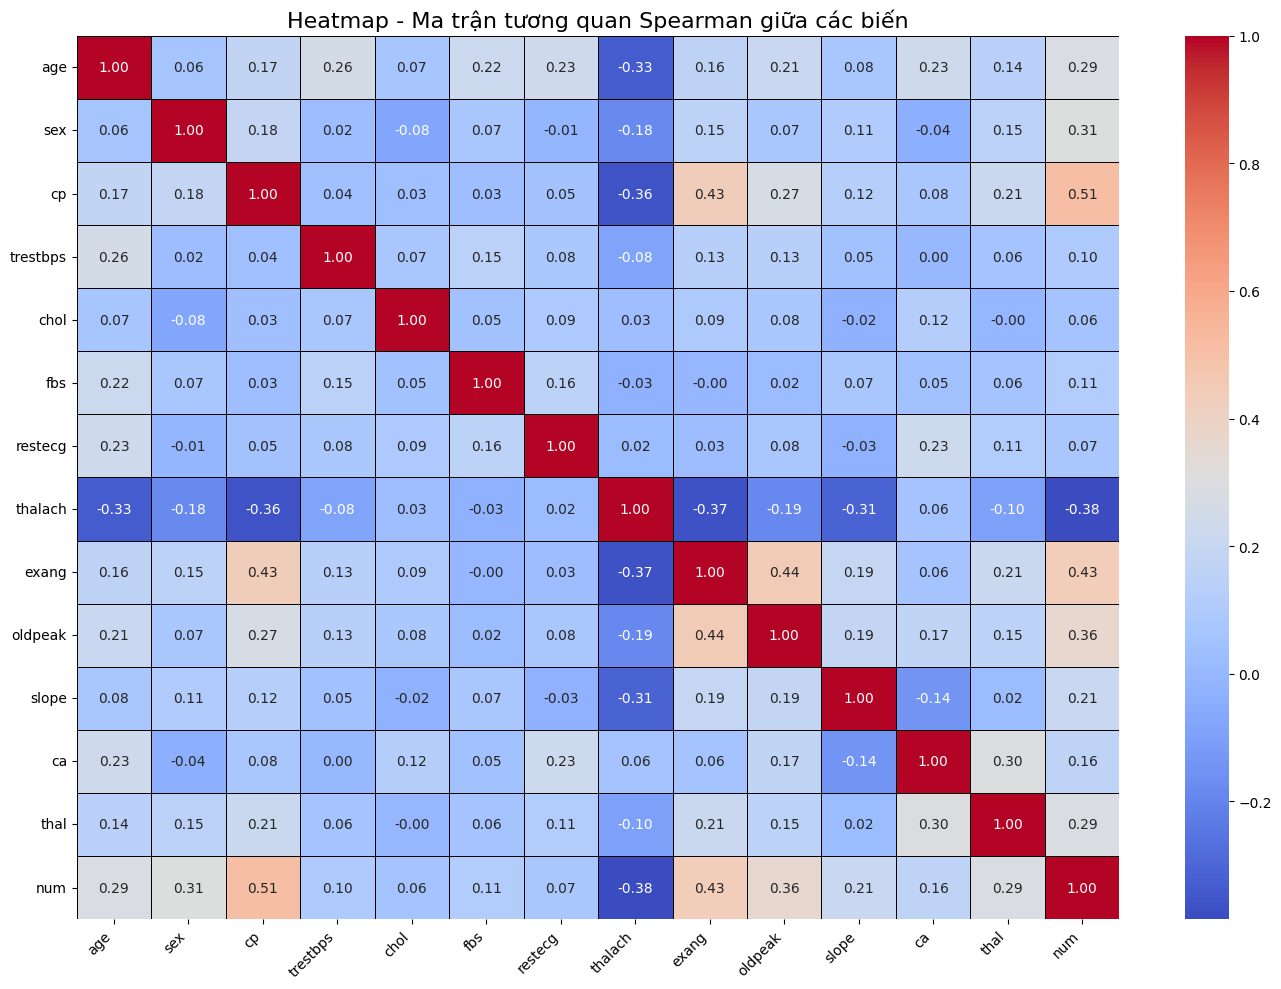

In [203]:
# --- Trực quan hóa bằng Heatmap ---
print("\nTrực quan hóa ma trận tương quan bằng Heatmap:")
plt.figure(figsize=(14, 10)) # Tăng kích thước để dễ nhìn hơn
sns.heatmap(spearman_corr_matrix,
            annot=True,        # Hiển thị giá trị tương quan trên ô
            cmap='coolwarm',   # Chọn bảng màu phù hợp (ví dụ: coolwarm, RdBu_r)
                               # 'coolwarm': đỏ là dương, xanh là âm
            fmt=".2f",         # Định dạng số hiển thị (2 chữ số thập phân)
            linewidths=.5,     # Thêm đường kẻ giữa các ô
            linecolor='black') # Màu của đường kẻ
plt.title('Heatmap - Ma trận tương quan Spearman giữa các biến', fontsize=16)
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc
plt.yticks(rotation=0)
plt.tight_layout() # Tự động điều chỉnh layout
plt.show()

**Diễn giải từ Heatmap**

- Heatmap sẽ trực quan hóa ma trận trên. Các ô **màu đỏ/cam đậm** sẽ tương ứng với các giá trị dương mạnh nhất (ví dụ: cp vs num, exang vs num, oldpeak vs exang).

- Các ô màu **xanh dương đậm** sẽ tương ứng với các giá trị âm mạnh nhất (ví dụ: thalach vs num, thalach vs age, thalach vs exang).

- Các ô có màu **nhạt hoặc gần trắng/vàng** (màu trung tâm của bảng màu) sẽ tương ứng với các giá trị gần 0, chỉ ra tương quan rất yếu (ví dụ: trestbps vs sex, chol vs fbs).


Trực quan hóa mối quan hệ bằng Scatter Plot cho một số cặp biến:


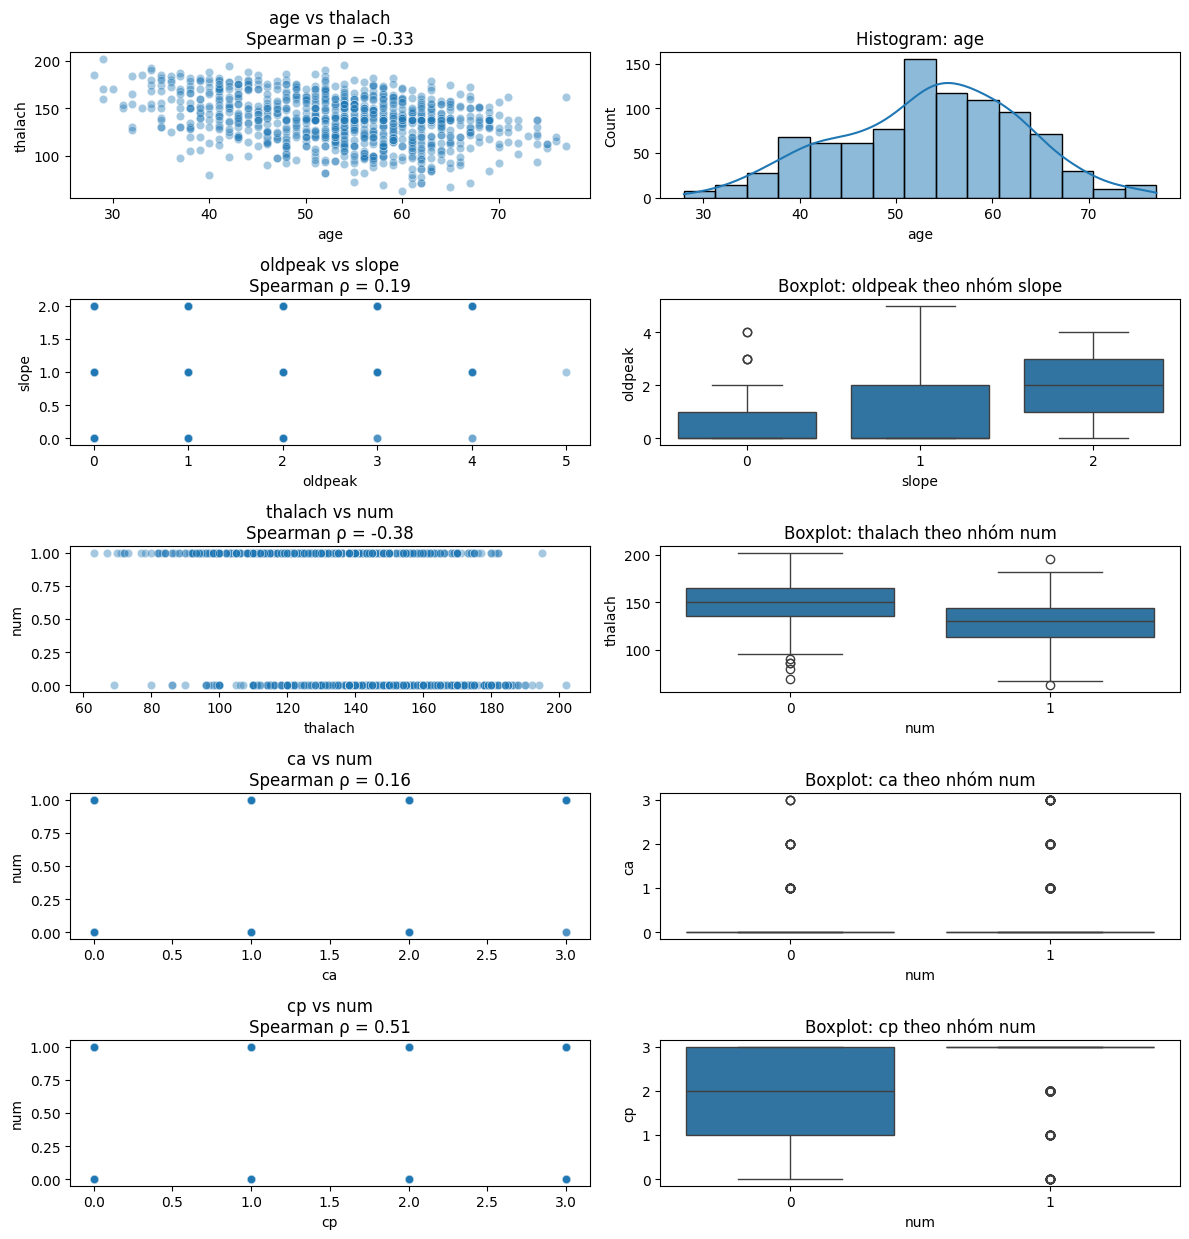

In [204]:
# --- Trực quan hóa bằng Scatter Plot cho một số cặp biến quan trọng ---
print("\nTrực quan hóa mối quan hệ bằng Scatter Plot cho một số cặp biến:")

# Lựa chọn các cặp biến để vẽ scatter plot
# Ví dụ: các cặp có tương quan tương đối mạnh hoặc các cặp quan trọng về mặt y học
pairs_to_plot = [
    ('age', 'thalach'),      # Tuổi vs Nhịp tim tối đa
    ('oldpeak', 'slope'),    # Độ chênh ST vs Độ dốc đoạn ST
    ('thalach', 'num'),      # Nhịp tim tối đa vs Tình trạng bệnh (num là mã số 0 hoặc 1)
    ('ca', 'num'),           # Số mạch chính bị màu vs Tình trạng bệnh (ca là mã số)
    ('cp', 'num')            # Loại đau ngực vs Tình trạng bệnh (cp là mã số)
]

num_plots = len(pairs_to_plot)
plt.figure(figsize=(12, num_plots * 2.5)) # Điều chỉnh kích thước tổng thể

for i, pair in enumerate(pairs_to_plot):
    var1, var2 = pair
    plt.subplot(num_plots, 2, 2*i + 1) # Chia thành 2 cột, vẽ scatter plot

    # ----- BỎ CÁC DÒNG TÍNH VÀ THAM SỐ x_jitter, y_jitter -----
    # x_unique_count = data_for_corr[var1].nunique()
    # y_unique_count = data_for_corr[var2].nunique()
    # x_jitter = 0.15 if x_unique_count < 15 else 0 # Bỏ dòng này
    # y_jitter = 0.15 if y_unique_count < 15 else 0 # Bỏ dòng này

    sns.scatterplot(data=data_for_corr, x=var1, y=var2,
                    alpha=0.4) # Bỏ x_jitter và y_jitter khỏi đây
                    # x_jitter=x_jitter, # Bỏ dòng này
                    # y_jitter=y_jitter) # Bỏ dòng này

    # Lấy giá trị tương quan Spearman cho cặp này
    corr_value = spearman_corr_matrix.loc[var1, var2]
    plt.title(f'{var1} vs {var2}\nSpearman ρ = {corr_value:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Vẽ thêm boxplot bên cạnh để xem phân bố theo nhóm (hữu ích khi 1 biến phân loại)
    plt.subplot(num_plots, 2, 2*i + 2)
    x_unique_count = data_for_corr[var1].nunique() # Tính lại ở đây nếu cần cho boxplot
    y_unique_count = data_for_corr[var2].nunique() # Tính lại ở đây nếu cần cho boxplot
    # Xác định biến nào có ít giá trị duy nhất hơn để làm trục x cho boxplot
    if x_unique_count < y_unique_count and x_unique_count < 10:
        sns.boxplot(data=data_for_corr, x=var1, y=var2)
        plt.title(f'Boxplot: {var2} theo nhóm {var1}')
    elif y_unique_count < x_unique_count and y_unique_count < 10:
        sns.boxplot(data=data_for_corr, x=var2, y=var1)
        plt.title(f'Boxplot: {var1} theo nhóm {var2}')
    else:
        # Nếu cả hai đều có nhiều giá trị, có thể vẽ histogram thay thế
         sns.histplot(data_for_corr[var1], kde=True, bins=15)
         plt.title(f'Histogram: {var1}')


plt.tight_layout()
plt.show()

**Diễn giải từ Scatter Plots**

  - **age vs thalach (ρ ≈ -0.33)**: Bạn sẽ thấy một đám mây điểm có xu hướng chung đi xuống từ trái sang phải, nhưng các điểm khá phân tán, thể hiện mối tương quan âm nhưng không quá mạnh.

  - **oldpeak vs slope (ρ ≈ 0.19)**: Vì slope là biến thứ bậc, các điểm sẽ tập trung thành các dải dọc hoặc ngang. Xu hướng chung có thể hơi tăng (tương quan dương yếu), nhưng hình dạng cụ thể quan trọng hơn. Boxplot sẽ hữu ích ở đây.

  - **thalach vs num (ρ ≈ -0.38)**: Scatter plot sẽ cho thấy hai dải điểm chính tương ứng với num=0 và num=1. Dải điểm của num=1 có xu hướng nằm ở các giá trị thalach thấp hơn so với dải của num=0. Boxplot sẽ thể hiện rõ sự khác biệt về phân vị giữa hai nhóm.

  - **ca vs num (ρ ≈ 0.16)**: Tương tự, sẽ thấy các cụm điểm. Xu hướng chung là khi mã ca tăng, tỷ lệ điểm thuộc nhóm num=1 cũng tăng nhẹ, nhưng mối liên hệ rất yếu.

  - **cp vs num (ρ ≈ 0.51)**: Sẽ thấy các nhóm điểm theo mã cp. Tỷ lệ điểm thuộc nhóm num=1 sẽ tăng lên rõ rệt ở các mã cp cao hơn (đặc biệt là 4), thể hiện tương quan dương trung bình.

## d. Đưa ra nhận xét về ý nghĩa thực tiễn của các mối tương quan

Phân tích ý nghĩa thực tiễn là xem xét liệu các mối tương quan tìm thấy (dù có ý nghĩa thống kê hay không) có đủ mạnh hoặc có bản chất phù hợp để mang lại thông tin hữu ích trong việc hiểu biết, chẩn đoán, tiên lượng hoặc phòng ngừa bệnh tim hay không.

1. **Mối tương quan với num (Tình trạng bệnh tim):**

  - **cp (Loại đau ngực) vs num (ρ ≈ 0.51 - Dương, Trung bình):**

    - Ý nghĩa thực tiễn: **Cao**. Đây là mối tương quan mạnh nhất với tình trạng bệnh. Nó nhấn mạnh tầm quan trọng của việc đánh giá các loại đau ngực trong chẩn đoán. Đặc biệt, việc mã hóa cp cao hơn (đến loại 4 - không triệu chứng) lại liên quan nhiều hơn đến num=1 cho thấy ngay cả những bệnh nhân không có triệu chứng đau ngực điển hình cũng có thể mắc bệnh động mạch vành đáng kể. Điều này rất quan trọng về mặt lâm sàng.

  - **exang (Đau ngực khi gắng sức) vs num (ρ ≈ 0.43 - Dương, Trung bình):**

    - Ý nghĩa thực tiễn: **Cao**. Việc xuất hiện đau ngực khi gắng sức là một dấu hiệu lâm sàng rất đáng chú ý, gợi ý mạnh mẽ đến khả năng thiếu máu cục bộ cơ tim do hẹp động mạch vành. Mối tương quan này khẳng định giá trị của việc hỏi về triệu chứng khi gắng sức hoặc thực hiện nghiệm pháp gắng sức.

  - **thalach (Nhịp tim tối đa) vs num (ρ ≈ -0.38 - Âm, Yếu đến Trung bình):**

    - Ý nghĩa thực tiễn: **Trung bình**. Mặc dù không phải là mối tương quan mạnh nhất, nó cho thấy những người có khả năng gắng sức kém hơn (đạt nhịp tim tối đa thấp hơn) có xu hướng dễ mắc bệnh hơn. Điều này có thể phản ánh tình trạng thể chất chung hoặc giới hạn do chính bệnh tim gây ra. Nó cung cấp thông tin bổ sung khi đánh giá kết quả nghiệm pháp gắng sức.

  - **oldpeak (Độ chênh ST) vs num (ρ ≈ 0.36 - Dương, Yếu đến Trung bình):**

    - Ý nghĩa thực tiễn: **Cao**. Độ chênh ST xuống (oldpeak cao) trong quá trình gắng sức là một trong những dấu hiệu điện tâm đồ quan trọng nhất của thiếu máu cục bộ cơ tim. Mối tương quan này, dù ở mức trung bình, phản ánh giá trị chẩn đoán cao của chỉ số này trong thực tế lâm sàng và nghiệm pháp gắng sức.

  - **sex (Giới tính) vs num (ρ ≈ 0.31 - Dương, Yếu):**

    - Ý nghĩa thực tiễn: **Trung bình**. Tuy mối tương quan Spearman chỉ ở mức yếu, nó phản ánh một yếu tố nguy cơ dịch tễ học quan trọng đã được biết đến: nam giới có xu hướng mắc bệnh tim mạch sớm hơn và nhiều hơn nữ giới (ít nhất là trong độ tuổi nghiên cứu). Giới tính luôn là một yếu tố được xem xét trong đánh giá nguy cơ tim mạch tổng thể.

  - **age (Tuổi) vs num (ρ ≈ 0.29 - Dương, Yếu):**

    - Ý nghĩa thực tiễn: **Cao**. Tương tự như giới tính, mặc dù tương quan Spearman ở mức yếu (có thể do mối quan hệ không hoàn toàn đơn điệu hoặc ảnh hưởng của hạng), tuổi tác là một yếu tố nguy cơ không thể thay đổi và rất quan trọng đối với bệnh tim mạch. Nguy cơ mắc bệnh tăng lên rõ rệt theo tuổi. Vì vậy, ý nghĩa thực tiễn của tuổi là rất cao.

  - **thal (Thalassemia) vs num (ρ ≈ 0.29 - Dương, Yếu):**

  - Ý nghĩa thực tiễn: **Cao**. Biến thal đại diện cho kết quả xạ hình tưới máu cơ tim. Các giá trị mã hóa cao hơn (6, 7 - khuyết tật cố định/có thể hồi phục) chỉ ra các vấn đề về tưới máu. Mối tương quan yếu này vẫn có ý nghĩa thực tiễn cao vì kết quả xạ hình bất thường là bằng chứng trực tiếp cho thấy ảnh hưởng của bệnh lý mạch vành lên cơ tim.

  - **slope (Độ dốc ST) vs num (ρ ≈ 0.21 - Dương, Yếu):**

    - Ý nghĩa thực tiễn: **Trung bình**. Độ dốc ST đi xuống hoặc đi ngang trong nghiệm pháp gắng sức được coi là dấu hiệu gợi ý thiếu máu cục bộ nhiều hơn là dốc lên. Mối tương quan yếu này vẫn cung cấp thêm một thông tin hữu ích trong việc đọc kết quả điện tâm đồ gắng sức.

  - **ca (Số mạch chính bị màu) vs num (ρ ≈ 0.16 - Dương, Rất yếu):**

    - Ý nghĩa thực tiễn: **Cao (về bản chất của biến) nhưng Thấp (dựa trên tương quan này)**. Về mặt lâm sàng, việc phát hiện có mạch máu bị hẹp (>50%) trên hình ảnh học (ca>0) là rất quan trọng. Tuy nhiên, hệ số tương quan Spearman rất yếu giữa số lượng mạch bị màu (ca) và biến nhị phân num (chỉ cần 1 mạch >50%) trong phân tích này cho thấy việc chỉ dựa vào số lượng mạch có thể không phản ánh hoàn hảo tình trạng bệnh nhị phân. Có thể do vấn đề dữ liệu thiếu của ca hoặc bản chất của việc so sánh số lượng với kết quả có/không.

  - **Các biến còn lại (trestbps, chol, fbs, restecg) vs num (ρ rất yếu, < 0.12):**

    - Ý nghĩa thực tiễn: **Thấp (dựa trên tương quan này) nhưng Cao (về mặt lâm sàng chung)**. Việc các yếu tố nguy cơ cơ bản như huyết áp, cholesterol, đường huyết, hay điện tâm đồ lúc nghỉ có tương quan Spearman rất yếu với num trong phân tích này là một điểm đáng lưu ý. *Nó không có nghĩa các yếu tố này không quan trọng*. Có thể là:

      - Mối quan hệ của chúng với bệnh tim không phải là đơn điệu.

      - Ảnh hưởng của chúng trở nên rõ ràng hơn khi kết hợp với các yếu tố khác (trong mô hình đa biến).

      - Việc điều trị (ví dụ: dùng thuốc hạ áp, hạ mỡ máu) đã làm thay đổi giá trị đo được.

      - Spearman dựa trên hạng không nắm bắt được đầy đủ sự phức tạp.



2. **Các mối tương quan khác:**

  - Các tương quan dương trung bình giữa cp, exang, oldpeak cho thấy sự liên kết giữa các triệu chứng và dấu hiệu của thiếu máu cục bộ khi gắng sức, điều này hoàn toàn hợp lý về mặt sinh lý bệnh và có ý nghĩa thực tiễn trong việc củng cố chẩn đoán khi các dấu hiệu này cùng xuất hiện.

  - Các tương quan âm giữa thalach và age, cp, exang, slope đều có ý nghĩa thực tiễn, phản ánh khả năng gắng sức giảm ở người lớn tuổi, người có triệu chứng hoặc có dấu hiệu ECG bất thường khi gắng sức.

3. **Kết luận chung về ý nghĩa thực tiễn:**

  - Phân tích tương quan Spearman cho thấy các yếu tố liên quan đến **triệu chứng lâm sàng** (cp, exang) và **dấu hiệu khi gắng sức** (oldpeak, thalach, slope, thal) có mối liên hệ đơn điệu rõ ràng và ý nghĩa thực tiễn cao nhất với tình trạng bệnh tim (num) trong bộ dữ liệu này.

  - Các yếu tố **nhân khẩu học** (age, sex) có ý nghĩa thực tiễn cao trong đánh giá nguy cơ chung, mặc dù hệ số tương quan Spearman ở mức yếu đến trung bình.

  - Các yếu tố nguy cơ **sinh hóa/huyết động lúc nghỉ** (trestbps, chol, fbs) và **ECG lúc nghỉ** (restecg) thể hiện mối tương quan Spearman rất yếu với kết quả bệnh trong phân tích đơn lẻ này, nhưng không làm giảm tầm quan trọng lâm sàng tổng thể của chúng trong bức tranh lớn về sức khỏe tim mạch.

  - Cần luôn nhớ rằng tương quan không phải là nhân quả và các mối quan hệ này cần được xem xét trong bối cảnh lâm sàng tổng thể và có thể cần các mô hình phân tích phức tạp hơn để hiểu rõ vai trò của từng yếu tố.